# Model Results Analysis

In [575]:
import pandas as pd
import requests
import pvlib
import matplotlib.pyplot as plt  # for visualization
import math
from datetime import datetime
#from ast import literal_eval
import numpy as np
from statistics import median
from statistics import mean
from pprint import pprint

In [576]:
#variables - MAKE SURE THESE ARE IDENTICAL TO WHAT WAS USED IN THE MODEL
#myNetworks = ['bowling green','long island city','sunnyside','crown heights','grasslands','fresh kills','williamsburg','northeast bronx','ridgewood']
myNetworks = ['bowling green','long island city','sunnyside','grasslands','fresh kills','northeast bronx']


# Read Data

In [577]:
network_df = pd.read_csv('results/network_df_1751853699.csv')
network_df = network_df.drop(columns='Unnamed: 0')
network_df.head()

,network,load1W,load2W,load1RW,l1_annValResProgram_csrp,l1_annValResProgram_dlrp,l1_annValResTot,l1_annValPer_csrp,l1_annValPer_dlrp,l1_annValPer,l1_annTotVal,l2_annValResProgram_csrp,l2_annValResProgram_dlrp,l2_annValResTot,l2_annValPer_csrp,l2_annValPer_dlrp,l2_annValPer,l2_annTotVal
0,bowling green,500,100,75,45.0,45.0,90.0,2.0,0.5,2.5,92.5,9.0,9.0,18.0,0.4,0.1,0.5,18.5
1,long island city,500,100,75,45.0,45.0,90.0,2.0,0.5,2.5,92.5,9.0,9.0,18.0,0.4,0.1,0.5,18.5
2,sunnyside,500,100,75,45.0,45.0,90.0,2.0,0.5,2.5,92.5,9.0,9.0,18.0,0.4,0.1,0.5,18.5
3,grasslands,500,100,75,15.0,45.0,60.0,2.0,0.5,2.5,62.5,3.0,9.0,12.0,0.4,0.1,0.5,12.5
4,fresh kills,500,100,75,15.0,45.0,60.0,2.0,0.5,2.5,62.5,3.0,9.0,12.0,0.4,0.1,0.5,12.5


## Read Model Results

In [578]:
#submitted paper results
results_df = pd.read_csv('results/results_df_1751853700.csv')

#V-5B analysis results
# results_df = pd.read_csv('results/results_df_1735343451.csv')
#drop the index if it was saved in the  file
results_df = results_df.drop(columns='Unnamed: 0')
results_df.head()

,network,eventStart,dlrp_rate,csrp_rate,az,pvW,batModel,batWh,batWhAC,effEff,...,gridValue_load1R,load1_NPV,load2_NPV,load1R_NPV,load1_PBP,load2_PBP,load1R_PBP,load1_LCOSS,load2_LCOSS,load1R_LCOSS
0,bowling green,11,18,18,180,0,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...",{'without_surplus': np.float64(-672.1134602042...,{'without_surplus': np.float64(-672.2018038064...,{'without_surplus': np.float64(-568.1064811945...,{'without_surplus': np.float64(-17.01932867022...,{'without_surplus': np.float64(-17.01248658134...,{'without_surplus': np.float64(-32.32462816550...,{'without_surplus': np.float64(0.9545561665384...,{'without_surplus': np.float64(0.9516143087562...,{'without_surplus': np.float64(0.9517768471669...
1,bowling green,11,18,18,180,20,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...",{'without_surplus': np.float64(-656.6745628375...,{'without_surplus': np.float64(-657.3360664131...,{'without_surplus': np.float64(-534.2172049968...,{'without_surplus': np.float64(-26.54372127872...,{'without_surplus': np.float64(-26.43261070047...,{'without_surplus': np.float64(-123.6025290512...,{'without_surplus': np.float64(1.2376564578997...,{'without_surplus': np.float64(1.1987051287828...,{'without_surplus': np.float64(1.1989830528715...
2,bowling green,11,18,18,180,40,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...",{'without_surplus': np.float64(-615.9555289249...,{'without_surplus': np.float64(-623.8234614704...,{'without_surplus': np.float64(-476.9957958233...,{'without_surplus': np.float64(-47.47838287540...,{'without_surplus': np.float64(-43.72401173863...,{'without_surplus': np.float64(91.133519069751...,{'without_surplus': np.float64(1.7445945985417...,{'without_surplus': np.float64(1.1057942752800...,{'without_surplus': np.float64(1.1060299977816...
3,bowling green,11,18,18,180,60,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...",{'without_surplus': np.float64(-581.8916116485...,{'without_surplus': np.float64(-592.4782323504...,{'without_surplus': np.float64(-421.9266130900...,{'without_surplus': np.float64(-136.1527763761...,{'without_surplus': np.float64(-103.1567010687...,{'without_surplus': np.float64(35.846196741734...,{'without_surplus': np.float64(3.0190654208770...,{'without_surplus': np.float64(0.9437732557828...,{'without_surplus': np.float64(0.9439382604454...
4,bowling green,11,18,18,180,80,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...",{'without_surplus': np.float64(-579.1388559479...,{'without_surplus': np.float64(-561.7433283508...,{'without_surplus': np.float64(-368.4208365572...,{'without_surplus': np.float64(-724.3621455021...,{'without_surplus': np.float64(444.13937173690...,{'without_surplus': np.float64(23.209781198773...,{'without_surplus': np.float64(4.6151994279672...,{'without_surplus': np.float64(0.8099005818792...,{'without_surplus': np.float64(0.8100161296147...


In [579]:
results_df.iloc[0]

network                                                                bowling green
eventStart                                                                        11
dlrp_rate                                                                         18
csrp_rate                                                                         18
az                                                                               180
pvW                                                                                0
batModel                                                           Explorer 300 Plus
batWh                                                                          288.0
batWhAC                                                                   198.404892
effEff                                                                      0.861132
dischargeRateW                                                                  57.6
capex                                                            

In [580]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   network                          12036 non-null  object 
 1   eventStart                       12036 non-null  int64  
 2   dlrp_rate                        12036 non-null  int64  
 3   csrp_rate                        12036 non-null  int64  
 4   az                               12036 non-null  int64  
 5   pvW                              12036 non-null  int64  
 6   batModel                         12036 non-null  object 
 7   batWh                            12036 non-null  float64
 8   batWhAC                          11790 non-null  float64
 9   effEff                           11790 non-null  float64
 10  dischargeRateW                   12036 non-null  float64
 11  capex                            12036 non-null  float64
 12  cycles            

In [581]:
results_df.columns

Index(['network', 'eventStart', 'dlrp_rate', 'csrp_rate', 'az', 'pvW',
       'batModel', 'batWh', 'batWhAC', 'effEff', 'dischargeRateW', 'capex',
       'cycles', 'lifespan', 'workingLife', 'dailyPVWhAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'immediateEventAmt',
       'csrpMaxFlex', 'csrpLoad1_percentage', 'csrpLoad2_percentage',
       'csrpLoad1replacement_percentage', 'csrpLoad1Income', 'csrpLoad2Income',
       'csrpLoad1RIncome', 'dlrpMaxFlex', 'dlrpLoad1_percentage',
       'dlrpLoad2_percentage', 'dlrpLoad1replacement_percentage',
       'dlrpLoad1Income', 'dlrpLoad2Income', 'dlrpLoad1RIncome',
       'annDRIncomeLoad1', 'annDRIncomeLoad2', 'annDRIncomeLoad1R',
       'gridValue_load1', 'gridValue_load2', 'gridValue_load1R', 'load1_NPV',
       'load2_NPV', 'load1R_NPV', 'load1_PBP', 'load2_PBP', 'load1R_PBP',
       'load1_LCOSS', 'load2_LCOSS', 'load1R_LCOSS'],
      dtype='object')

In [582]:
#these are the columns with lists in them
strToList = ['dailyPVWhAC_4M','annualPVkWhDC_degraded','annualPVkWhAC_degraded','csrpMaxFlex',
             'csrpLoad1_percentage','csrpLoad2_percentage', 'csrpLoad1replacement_percentage',
             'csrpLoad1Income', 'csrpLoad2Income', 'csrpLoad1RIncome','dlrpMaxFlex', 
             'dlrpLoad1_percentage', 'dlrpLoad2_percentage', 'dlrpLoad1replacement_percentage',
             'dlrpLoad1Income','dlrpLoad2Income', 'dlrpLoad1RIncome', 'annDRIncomeLoad1',
             'annDRIncomeLoad2', 'annDRIncomeLoad1R']

#these are the columns with dictionaries in them
strToDict =[ 'gridValue_load1','gridValue_load2','gridValue_load1R',
             'load1_NPV', 'load2_NPV','load1R_NPV',
             'load1_PBP', 'load2_PBP', 'load1R_PBP',
             'load1_LCOSS','load2_LCOSS','load1R_LCOSS']

# for c in strToList:
#     print(c)
#     print(results_df[c].iloc[0]) 
#     print('')

In [583]:
safe_env = {"np": np, "nan": np.nan}
for c in strToList:
    results_df[c] = results_df[c].apply(lambda x: eval(str(x),safe_env))


In [584]:
for c in strToDict:
    results_df[c] = results_df[c].apply(lambda x: eval(str(x),safe_env))

In [585]:
results_df.head()

,network,eventStart,dlrp_rate,csrp_rate,az,pvW,batModel,batWh,batWhAC,effEff,...,gridValue_load1R,load1_NPV,load2_NPV,load1R_NPV,load1_PBP,load2_PBP,load1R_PBP,load1_LCOSS,load2_LCOSS,load1R_LCOSS
0,bowling green,11,18,18,180,0,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -672.1134602042703, 'with_...","{'without_surplus': -672.2018038064446, 'with_...","{'without_surplus': -568.1064811945034, 'with_...","{'without_surplus': -17.019328670223345, 'with...","{'without_surplus': -17.012486581341214, 'with...","{'without_surplus': -32.324628165503086, 'with...","{'without_surplus': 0.9545561665384017, 'with_...","{'without_surplus': 0.9516143087562083, 'with_...","{'without_surplus': 0.951776847166935, 'with_s..."
1,bowling green,11,18,18,180,20,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -656.674562837534, 'with_s...","{'without_surplus': -657.3360664131457, 'with_...","{'without_surplus': -534.2172049968996, 'with_...","{'without_surplus': -26.54372127872825, 'with_...","{'without_surplus': -26.432610700470732, 'with...","{'without_surplus': -123.60252905121335, 'with...","{'without_surplus': 1.2376564578997502, 'with_...","{'without_surplus': 1.198705128782874, 'with_s...","{'without_surplus': 1.1989830528715122, 'with_..."
2,bowling green,11,18,18,180,40,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -615.9555289249403, 'with_...","{'without_surplus': -623.8234614704517, 'with_...","{'without_surplus': -476.9957958233701, 'with_...","{'without_surplus': -47.47838287540403, 'with_...","{'without_surplus': -43.724011738638595, 'with...","{'without_surplus': 91.13351906975126, 'with_s...","{'without_surplus': 1.7445945985417228, 'with_...","{'without_surplus': 1.1057942752800451, 'with_...","{'without_surplus': 1.1060299977816421, 'with_..."
3,bowling green,11,18,18,180,60,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -581.8916116485026, 'with_...","{'without_surplus': -592.4782323504578, 'with_...","{'without_surplus': -421.92661309003836, 'with...","{'without_surplus': -136.15277637617595, 'with...","{'without_surplus': -103.1567010687951, 'with_...","{'without_surplus': 35.84619674173441, 'with_s...","{'without_surplus': 3.01906542087704, 'with_su...","{'without_surplus': 0.9437732557828221, 'with_...","{'without_surplus': 0.9439382604454796, 'with_..."
4,bowling green,11,18,18,180,80,Explorer 300 Plus,288.0,198.404892,0.861132,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -579.1388559479856, 'with_...","{'without_surplus': -561.743328350872, 'with_s...","{'without_surplus': -368.42083655720427, 'with...","{'without_surplus': -724.3621455021542, 'with_...","{'without_surplus': 444.1393717369067, 'with_s...","{'without_surplus': 23.209781198773232, 'with_...","{'without_surplus': 4.615199427967209, 'with_s...","{'without_surplus': 0.8099005818792696, 'with_...","{'without_surplus': 0.8100161296147886, 'with_..."


In [586]:
# #check data types if needed
# for k in list(results_df.keys()):
#     #print(k)
#     #print(type(results_df.iloc[0][k]))
#     if type(results_df.iloc[0][k]).__name__ == 'str':
#         print('str: ' + k)
#         print(type(results_df.iloc[0][k][0]))
#     if type(results_df.iloc[0][k]).__name__ in  ['int','float','numpy.int64','numpy.float64'] :
#         print('number: ' + k)
#         print(type(results_df.iloc[0][k]))
#     elif type(results_df.iloc[0][k]).__name__ == 'list':
#         print('list')
#         print(type(results_df.iloc[0][k][0]))
#     elif type(results_df.iloc[0][k]).__name__ == 'dict':
#         print('dict')
#         print(type(results_df.iloc[0][k]))
#     #print(results_df.iloc[0][k])

In [587]:
results_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,12036.000000,12036.000000,12036.000000,12036.0,12036.000000,12036.000000,11790.000000,11790.000000,12036.000000,12036.000000,12036.000000,12036.000000,12036.000000,12036.0
mean,14.500000,19.166667,14.000000,180.0,311.405783,1578.480309,1074.106812,0.853413,315.696062,1536.810783,3550.299103,9.726847,9.203963,0.0
std,1.802851,2.608854,5.657089,0.0,228.478578,752.405134,524.084723,0.009997,150.481027,676.030707,608.627142,1.667472,0.809493,0.0
min,11.000000,18.000000,6.000000,180.0,0.000000,99.900000,67.757275,0.822648,19.980000,266.286475,2000.000000,5.479452,5.479452,0.0
25%,14.000000,18.000000,6.000000,180.0,120.000000,1024.000000,683.528851,0.846014,204.800000,998.427300,3000.000000,8.219178,8.219178,0.0
50%,15.000000,18.000000,18.000000,180.0,260.000000,1536.000000,1044.294980,0.857421,307.200000,1514.494800,3500.000000,9.589041,9.589041,0.0
75%,16.000000,18.000000,18.000000,180.0,480.000000,2048.000000,1409.369442,0.861132,409.600000,2004.432300,4000.000000,10.958904,10.000000,0.0
max,16.000000,25.000000,18.000000,180.0,800.000000,3686.000000,2544.688801,0.872238,737.200000,3895.591050,6000.000000,16.438356,10.000000,0.0


## Read in network data

In [588]:
# read in network data to dataframe
networks_df = pd.read_csv('data/conEdNetworks2025.csv')

display(networks_df.head())

,borough,network,start time,end time,tier
0,bronx,central bronx,16:00,20:00,2
1,bronx,fordham,16:00,20:00,2
2,bronx,northeast bronx,16:00,20:00,2
3,bronx,riverdale,16:00,20:00,1
4,bronx,southeast bronx,16:00,20:00,1


In [589]:
#returns the network info for a given network
#args: network name
def getNetworkInfo(networkName):
    return networks_df.loc[networks_df['network']== networkName]

#returns the tier for a given item in the network info list
#args: network name
def getDLRPrate(networkName):
    n = getNetworkInfo(networkName)
    t = n['tier'].iloc[0]
    #tier 2 networks pay at a higher rate
    if t == 1:
        return 18
    else:
        return 25
    
#returns the borough for a given item in the network info list
#args: network name
def getCSRPrate(networkName):
    n = getNetworkInfo(networkName)
    t = n['borough'].iloc[0]
    #westchester and staten island pay at a lower rate
    if t not in ['westchester','staten island']:
        return 18
    else:
        return 6

#args: network name
def getTotalRate(networkName):
    return getDLRPrate(networkName) + getCSRPrate(networkName)
    
#returns borough name
#args: network name
def getBorough(networkName):
    n = getNetworkInfo(networkName)
    return n['borough'].iloc[0]

#returns event start time
#args: network name
def getStartTime(networkName):
    n = getNetworkInfo(networkName)
    return int(n['start time'].iloc[0].split(":")[0])

# Analyze Results

In [590]:
analyze_df = results_df[['network','pvW','batModel', 'batWh', 'batWhAC','capex',
                         'workingLife','csrpMaxFlex','dlrpMaxFlex',
                         'csrpLoad1_percentage', 'csrpLoad2_percentage','csrpLoad1replacement_percentage',
                         'gridValue_load1','gridValue_load2','gridValue_load1R',
                         'load1_NPV', 'load2_NPV','load1R_NPV',
                         'load1_PBP', 'load2_PBP', 'load1R_PBP',
                         'load1_LCOSS','load2_LCOSS','load1R_LCOSS']]

In [591]:
analyze_df['csrpMaxFlex'].iloc[7]

[np.float64(0.10284466825574226),
 np.float64(0.1027570312610346),
 np.float64(0.10267062528920316),
 np.float64(0.10258523539366574),
 np.float64(0.10250095471632535),
 np.float64(0.10241781372648168),
 np.float64(0.10233570512980915),
 np.float64(0.10225458602702356),
 np.float64(0.10217456233079558),
 np.float64(0.10209539480997319)]

In [592]:
# summerize lists,
avgCols = ['csrpMaxFlex','dlrpMaxFlex','csrpLoad1_percentage','csrpLoad2_percentage','csrpLoad1replacement_percentage']
for c in avgCols:
    analyze_df[c] = analyze_df[c].apply(np.mean)

C:\Users\alexn\AppData\Local\Temp\ipykernel_19120\3110354932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analyze_df[c] = analyze_df[c].apply(np.mean)


In [593]:
analyze_df.head()

,network,pvW,batModel,batWh,batWhAC,capex,workingLife,csrpMaxFlex,dlrpMaxFlex,csrpLoad1_percentage,...,gridValue_load1R,load1_NPV,load2_NPV,load1R_NPV,load1_PBP,load2_PBP,load1R_PBP,load1_LCOSS,load2_LCOSS,load1R_LCOSS
0,bowling green,0,Explorer 300 Plus,288.0,198.404892,452.451838,8.219178,0.039698,0.039698,0.079396,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -672.1134602042703, 'with_...","{'without_surplus': -672.2018038064446, 'with_...","{'without_surplus': -568.1064811945034, 'with_...","{'without_surplus': -17.019328670223345, 'with...","{'without_surplus': -17.012486581341214, 'with...","{'without_surplus': -32.324628165503086, 'with...","{'without_surplus': 0.9545561665384017, 'with_...","{'without_surplus': 0.9516143087562083, 'with_...","{'without_surplus': 0.951776847166935, 'with_s..."
1,bowling green,20,Explorer 300 Plus,288.0,198.404892,500.857663,8.219178,0.046704,0.047305,0.093409,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -656.674562837534, 'with_s...","{'without_surplus': -657.3360664131457, 'with_...","{'without_surplus': -534.2172049968996, 'with_...","{'without_surplus': -26.54372127872825, 'with_...","{'without_surplus': -26.432610700470732, 'with...","{'without_surplus': -123.60252905121335, 'with...","{'without_surplus': 1.2376564578997502, 'with_...","{'without_surplus': 1.198705128782874, 'with_s...","{'without_surplus': 1.1989830528715122, 'with_..."
2,bowling green,40,Explorer 300 Plus,288.0,198.404892,524.810163,8.219178,0.055486,0.056716,0.110972,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -615.9555289249403, 'with_...","{'without_surplus': -623.8234614704517, 'with_...","{'without_surplus': -476.9957958233701, 'with_...","{'without_surplus': -47.47838287540403, 'with_...","{'without_surplus': -43.724011738638595, 'with...","{'without_surplus': 91.13351906975126, 'with_s...","{'without_surplus': 1.7445945985417228, 'with_...","{'without_surplus': 1.1057942752800451, 'with_...","{'without_surplus': 1.1060299977816421, 'with_..."
3,bowling green,60,Explorer 300 Plus,288.0,198.404892,548.762663,8.219178,0.064277,0.066127,0.128554,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -581.8916116485026, 'with_...","{'without_surplus': -592.4782323504578, 'with_...","{'without_surplus': -421.92661309003836, 'with...","{'without_surplus': -136.15277637617595, 'with...","{'without_surplus': -103.1567010687951, 'with_...","{'without_surplus': 35.84619674173441, 'with_s...","{'without_surplus': 3.01906542087704, 'with_su...","{'without_surplus': 0.9437732557828221, 'with_...","{'without_surplus': 0.9439382604454796, 'with_..."
4,bowling green,80,Explorer 300 Plus,288.0,198.404892,572.715163,8.219178,0.073061,0.075528,0.146122,...,"{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0...","{'without_surplus': -579.1388559479856, 'with_...","{'without_surplus': -561.743328350872, 'with_s...","{'without_surplus': -368.42083655720427, 'with...","{'without_surplus': -724.3621455021542, 'with_...","{'without_surplus': 444.1393717369067, 'with_s...","{'without_surplus': 23.209781198773232, 'with_...","{'without_surplus': 4.615199427967209, 'with_s...","{'without_surplus': 0.8099005818792696, 'with_...","{'without_surplus': 0.8100161296147886, 'with_..."


In [596]:
analyze_df.iloc[0]

network                                                                bowling green
pvW                                                                                0
batModel                                                           Explorer 300 Plus
batWh                                                                          288.0
batWhAC                                                                   198.404892
capex                                                                     452.451838
workingLife                                                                 8.219178
csrpMaxFlex                                                                 0.039698
dlrpMaxFlex                                                                 0.039698
csrpLoad1_percentage                                                        0.079396
csrpLoad2_percentage                                                        0.396982
csrpLoad1replacement_percentage                                  

In [597]:
analyze_df.iloc[0]['gridValue_load2']

{'daysWithSurplus': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'avgHourlySurpluskWAC': 0.0,
 'medHourlySurpluskWAC': 0.0,
 'maxHourlySurpluskWAC': 0.0,
 'ann_surpluskWhAC': [np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0)],
 'ann_surpluskWhAC_value': [np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.0)],
 'requiredGridkWhAC': [np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211),
  np.float64(106.01789473684211)],
 'requiredGridkWhAC_cost': [np.float64(28.540017263157896),
  np.float64(28.540017263157896),
  np.float64(28.540017263157896),
  np.float64(28

In [598]:
gridValueKeys = ['daysWithSurplus','avgHourlySurpluskWAC','medHourlySurpluskWAC','maxHourlySurpluskWAC',
                 'ann_surpluskWhAC','ann_surpluskWhAC_value','requiredGridkWhAC',
                 'requiredGridkWhAC_cost','eventGridChargekWhAC','eventGridChargekWhAC_costs',
                 'avoidedGridkWhAC','avoidedGridkWhAC_value']

scenarios = ['with_surplus', 'without_surplus']
baselines = ['1','2','1R']
colsN = [f'load{b}_NPV' for b in baselines]
colsP = [f'load{b}_PBP' for b in baselines]
colsL = [f'load{b}_LCOSS' for b in baselines]
colsGridValue = [f'gridValue_load{b}' for b in baselines]

In [599]:
# break out and summerize dictionaries

expAnalyze_df = analyze_df
for c in colsN:
    expanded = analyze_df[c].apply(pd.Series) # break out dictionaries into their own columns
    for s in scenarios:
        expanded = expanded.rename(columns={s: f'{c}-{s}'})
    expAnalyze_df = pd.concat([expAnalyze_df, expanded],axis=1)
    
for c in colsP:
    expanded = analyze_df[c].apply(pd.Series) # break out dictionaries into their own columns
    for s in scenarios:
        expanded = expanded.rename(columns={s: f'{c}-{s}'})
    expAnalyze_df = pd.concat([expAnalyze_df, expanded],axis=1)

for c in colsL:
    expanded = analyze_df[c].apply(pd.Series) # break out dictionaries into their own columns
    for s in scenarios:
        expanded = expanded.rename(columns={s: f'{c}-{s}'})
    expAnalyze_df = pd.concat([expAnalyze_df, expanded],axis=1)

for c in colsGridValue:
    expanded = analyze_df[c].apply(pd.Series) # break out dictionaries into their own columns
    for s in gridValueKeys:
        expanded = expanded.rename(columns={s: f'{c}-{s}'})
    expAnalyze_df = pd.concat([expAnalyze_df, expanded],axis=1)
    
expAnalyze_df = expAnalyze_df.drop(columns=(colsN+colsP+colsL+colsGridValue))
expAnalyze_df.head()


,network,pvW,batModel,batWh,batWhAC,capex,workingLife,csrpMaxFlex,dlrpMaxFlex,csrpLoad1_percentage,...,gridValue_load1R-medHourlySurpluskWAC,gridValue_load1R-maxHourlySurpluskWAC,gridValue_load1R-ann_surpluskWhAC,gridValue_load1R-ann_surpluskWhAC_value,gridValue_load1R-requiredGridkWhAC,gridValue_load1R-requiredGridkWhAC_cost,gridValue_load1R-eventGridChargekWhAC,gridValue_load1R-eventGridChargekWhAC_costs,gridValue_load1R-avoidedGridkWhAC,gridValue_load1R-avoidedGridkWhAC_value
0,bowling green,0,Explorer 300 Plus,288.0,198.404892,452.451838,8.219178,0.039698,0.039698,0.079396,...,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[106.00578947368422, 106.00578947368422, 106.0...","[28.53675852631579, 28.53675852631579, 28.5367...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.1686958265281143, 0.1686958265281143, 0.168...","[0.04541291650136837, 0.04541291650136837, 0.0..."
1,bowling green,20,Explorer 300 Plus,288.0,198.404892,500.857663,8.219178,0.046704,0.047305,0.093409,...,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[79.58578766433459, 79.74927099893215, 79.9141...","[21.42449403923887, 21.468503752912532, 21.512...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[1.6726566498423807, 1.5752231673921235, 1.481...","[0.4502791701375689, 0.42405007666195965, 0.39..."
2,bowling green,40,Explorer 300 Plus,288.0,198.404892,524.810163,8.219178,0.055486,0.056716,0.110972,...,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[70.42160972213078, 70.5294951428477, 70.63813...","[18.957497337197605, 18.9865400924546, 19.0157...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[17.293188153131815, 16.919096136294304, 16.55...","[4.655326250823085, 4.5546206798904265, 4.4553..."
3,bowling green,60,Explorer 300 Plus,288.0,198.404892,548.762663,8.219178,0.064277,0.066127,0.128554,...,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[66.46396013585725, 66.55662451439734, 66.6493...","[17.89209806857277, 17.917043319275763, 17.942...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[37.173054133850584, 36.5553349213575, 35.9446...","[10.006986172832578, 9.840696160829438, 9.6762..."
4,bowling green,80,Explorer 300 Plus,288.0,198.404892,572.715163,8.219178,0.073061,0.075528,0.146122,...,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[63.992161334719235, 64.06927464311916, 64.147...","[17.226689831306416, 17.247448733927676, 17.26...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[58.2684585779746, 57.40684218195949, 56.55519...","[15.685869049190762, 15.453921915383495, 15.22..."


In [600]:
expAnalyze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   network                                      12036 non-null  object 
 1   pvW                                          12036 non-null  int64  
 2   batModel                                     12036 non-null  object 
 3   batWh                                        12036 non-null  float64
 4   batWhAC                                      11790 non-null  float64
 5   capex                                        12036 non-null  float64
 6   workingLife                                  12036 non-null  float64
 7   csrpMaxFlex                                  11790 non-null  float64
 8   dlrpMaxFlex                                  11790 non-null  float64
 9   csrpLoad1_percentage                         11790 non-null  float64
 10

In [601]:
expAnalyze_df[['batWh','pvW','capex','load1_NPV-with_surplus','load1_NPV-without_surplus','load2_NPV-with_surplus','load2_NPV-without_surplus','load1R_NPV-with_surplus','load1R_NPV-without_surplus']].describe()

,batWh,pvW,capex,load1_NPV-with_surplus,load1_NPV-without_surplus,load2_NPV-with_surplus,load2_NPV-without_surplus,load1R_NPV-with_surplus,load1R_NPV-without_surplus
count,12036.000000,12036.000000,12036.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000
mean,1578.480309,311.405783,1536.810783,-799.581538,-1427.573641,-923.469522,-971.691698,-737.634348,-823.295639
std,752.405134,228.478578,676.030707,555.408138,615.141313,570.691528,535.268042,569.288018,523.083573
min,99.900000,0.000000,266.286475,-3389.664728,-3728.235714,-3513.617931,-3513.617931,-3353.703374,-3353.703374
25%,1024.000000,120.000000,998.427300,-1101.465559,-1835.999714,-1255.427828,-1274.138093,-1068.053610,-1106.355121
50%,1536.000000,260.000000,1514.494800,-708.971448,-1379.414200,-818.359875,-860.892636,-630.589313,-711.095555
75%,2048.000000,480.000000,2004.432300,-445.133371,-929.399638,-530.725654,-572.833715,-357.242091,-438.280392
max,3686.000000,800.000000,3895.591050,549.688402,-401.144427,337.800431,-143.923940,570.950929,35.581672


In [603]:
expAnalyze_df[expAnalyze_df['load1R_NPV-with_surplus']<0][['batWh','pvW','capex','load1R_NPV-with_surplus','load1R_NPV-without_surplus']].describe()
#expAnalyze_df[expAnalyze_df['load1_NPV-with_surplus']<-160][['batWhAC','capex','workingLife','csrpMaxFlex','dlrpMaxFlex','csrpLoad1_percentage','batWh','pvW','capex','load1_NPV-with_surplus','load1_NPV-without_surplus']]

,batWh,pvW,capex,load1R_NPV-with_surplus,load1R_NPV-without_surplus
count,11104.000000,11104.000000,11104.000000,11104.000000,11104.000000
mean,1588.882640,289.483069,1539.172722,-793.380656,-857.056348
std,769.310056,217.426390,698.839193,538.292800,519.119915
min,99.900000,0.000000,266.286475,-3353.703374,-3353.703374
25%,1024.000000,100.000000,960.865425,-1101.409104,-1138.453612
50%,1536.000000,240.000000,1512.317300,-671.004797,-749.661792
75%,2048.000000,440.000000,2041.449800,-406.297169,-474.585265
max,3686.000000,800.000000,3895.591050,-0.283363,-21.870617


In [604]:
expAnalyze_df[expAnalyze_df['capex']>3895][['batWh','pvW','capex','load1_NPV-with_surplus','load1_NPV-without_surplus']].describe()

,batWh,pvW,capex,load1_NPV-with_surplus,load1_NPV-without_surplus
count,6.0,6.0,6.000000e+00,6.000000,6.000000
mean,2560.0,500.0,3.895591e+03,-2533.196329,-3684.639748
std,0.0,0.0,4.981508e-13,33.139434,33.139434
min,2560.0,500.0,3.895591e+03,-2576.792295,-3728.235714
25%,2560.0,500.0,3.895591e+03,-2559.390861,-3710.834280
50%,2560.0,500.0,3.895591e+03,-2520.885217,-3672.328636
75%,2560.0,500.0,3.895591e+03,-2516.132622,-3667.576041
max,2560.0,500.0,3.895591e+03,-2493.840746,-3645.284166


In [605]:
load1_expAnalyze_df= expAnalyze_df[['network', 'pvW', 'batModel', 'batWh', 'batWhAC', 'capex',
       'workingLife', 'csrpMaxFlex', 'dlrpMaxFlex', 'csrpLoad1_percentage',
       'load1_NPV-without_surplus', 'load1_NPV-with_surplus',
       'load1_PBP-without_surplus', 'load1_PBP-with_surplus',
       'load1_LCOSS-without_surplus', 'load1_LCOSS-with_surplus',
       'gridValue_load1-daysWithSurplus',
       'gridValue_load1-avgHourlySurpluskWAC',
       'gridValue_load1-maxHourlySurpluskWAC',
       'gridValue_load1-ann_surpluskWhAC',
       'gridValue_load1-ann_surpluskWhAC_value',
       'gridValue_load1-requiredGridkWhAC',
       'gridValue_load1-requiredGridkWhAC_cost',
       'gridValue_load1-eventGridChargekWhAC',
       'gridValue_load1-eventGridChargekWhAC_costs',
       'gridValue_load1-avoidedGridkWhAC',
       'gridValue_load1-avoidedGridkWhAC_value']]

load2_expAnalyze_df= expAnalyze_df[['network', 'pvW', 'batModel', 'batWh', 'batWhAC', 'capex',
       'workingLife', 'csrpMaxFlex', 'dlrpMaxFlex','csrpLoad2_percentage',
       'load2_NPV-without_surplus', 'load2_NPV-with_surplus',
       'load2_PBP-without_surplus', 'load2_PBP-with_surplus',
       'load2_LCOSS-without_surplus', 'load2_LCOSS-with_surplus',
       'gridValue_load2-daysWithSurplus',
       'gridValue_load2-avgHourlySurpluskWAC',
       'gridValue_load2-maxHourlySurpluskWAC',
       'gridValue_load2-ann_surpluskWhAC',
       'gridValue_load2-ann_surpluskWhAC_value',
       'gridValue_load2-requiredGridkWhAC',
       'gridValue_load2-requiredGridkWhAC_cost',
       'gridValue_load2-eventGridChargekWhAC',
       'gridValue_load2-eventGridChargekWhAC_costs',
       'gridValue_load2-avoidedGridkWhAC',
       'gridValue_load2-avoidedGridkWhAC_value',
       'gridValue_load1R-daysWithSurplus']]

load1R_expAnalyze_df= expAnalyze_df[['network', 'pvW', 'batModel', 'batWh', 'batWhAC', 'capex',
       'workingLife', 'csrpMaxFlex', 'dlrpMaxFlex', 'csrpLoad1replacement_percentage',
       'load1R_NPV-without_surplus', 'load1R_NPV-with_surplus',
       'load1R_PBP-without_surplus', 'load1R_PBP-with_surplus',
       'load1R_LCOSS-without_surplus', 'load1R_LCOSS-with_surplus',
       'gridValue_load1R-daysWithSurplus',
       'gridValue_load1R-avgHourlySurpluskWAC',
       'gridValue_load1R-maxHourlySurpluskWAC',
       'gridValue_load1R-ann_surpluskWhAC',
       'gridValue_load1R-ann_surpluskWhAC_value',
       'gridValue_load1R-requiredGridkWhAC',
       'gridValue_load1R-requiredGridkWhAC_cost',
       'gridValue_load1R-eventGridChargekWhAC',
       'gridValue_load1R-eventGridChargekWhAC_costs',
       'gridValue_load1R-avoidedGridkWhAC',
       'gridValue_load1R-avoidedGridkWhAC_value']]

## Important Metrics by Scenario

In [606]:
# r = 3 # deciminals to round to

# scenarioResults = {}
# for c in cols:
#     b = c.split('_')[0].replace('load','')
#     #print('')
#     #print(f'{c} - 4M')        
#     df = expAnalyze_df[expAnalyze_df[c]>=0].drop(columns=['batWhAC'])
#     cD = {}
#     cD['pbp'] = {}
#     cD['pbp']['min']=round(df[c.replace('NPV','PBP')].min(),r)
#     cD['pbp']['mean']=round(df[c.replace('NPV','PBP')].mean(),r)
#     cD['pbp']['median']=round(df[c.replace('NPV','PBP')].median(),r)
#     cD['pbp']['max']=round(df[c.replace('NPV','PBP')].max(),r)

#     cD['npv'] = {}
#     cD['npv']['min']= round(df[c].min(),r)
#     cD['npv']['mean'] = round(df[c].mean(),r)
#     cD['npv']['median'] = round(df[c].median(),r)
#     cD['npv']['max'] = round(df[c].max(),r)

#     cD['csrpMaxFlex']={}
#     cD['csrpMaxFlex']['min']= round(df['csrpMaxFlex'].min(),r)
#     cD['csrpMaxFlex']['mean']= round(df['csrpMaxFlex'].mean(),r)
#     cD['csrpMaxFlex']['median']=round(df['csrpMaxFlex'].median(),r)
#     cD['csrpMaxFlex']['max']=round(df['csrpMaxFlex'].max(),r)

#     cD['dlrpMaxFlex']={}
#     cD['dlrpMaxFlex']['min']=round(df['dlrpMaxFlex'].min(),r)
#     cD['dlrpMaxFlex']['mean']=round(df['dlrpMaxFlex'].mean(),r)
#     cD['dlrpMaxFlex']['median']=round(df['dlrpMaxFlex'].median(),r)
#     cD['dlrpMaxFlex']['max']=round(df['dlrpMaxFlex'].max(),r)
    
#     cD['CAPEX']={}
#     cD['CAPEX']['min']=round(df['capex'].min(),r)
#     cD['CAPEX']['mean']=round(df['capex'].mean(),r)
#     cD['CAPEX']['median']=round(df['capex'].median(),r)
#     cD['CAPEX']['max']=round(df['capex'].max(),r)

#     scenarioResults[f'{c}']=cD

# #pprint(scenarioResults)
    


In [607]:
load1_expAnalyze_df.head()

,network,pvW,batModel,batWh,batWhAC,capex,workingLife,csrpMaxFlex,dlrpMaxFlex,csrpLoad1_percentage,...,gridValue_load1-avgHourlySurpluskWAC,gridValue_load1-maxHourlySurpluskWAC,gridValue_load1-ann_surpluskWhAC,gridValue_load1-ann_surpluskWhAC_value,gridValue_load1-requiredGridkWhAC,gridValue_load1-requiredGridkWhAC_cost,gridValue_load1-eventGridChargekWhAC,gridValue_load1-eventGridChargekWhAC_costs,gridValue_load1-avoidedGridkWhAC,gridValue_load1-avoidedGridkWhAC_value
0,bowling green,0,Explorer 300 Plus,288.0,198.404892,452.451838,8.219178,0.039698,0.039698,0.079396,...,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[105.79957894736843, 105.79957894736843, 105.7...","[28.48124665263158, 28.48124665263158, 28.4812...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,bowling green,20,Explorer 300 Plus,288.0,198.404892,500.857663,8.219178,0.046704,0.047305,0.093409,...,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[77.54116442018972, 77.82374856546164, 78.1035...","[20.874081461915072, 20.950153113822275, 21.02...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,bowling green,40,Explorer 300 Plus,288.0,198.404892,524.810163,8.219178,0.055486,0.056716,0.110972,...,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[49.282749893011356, 49.84791818355497, 50.407...","[13.266916271198657, 13.419059575012996, 13.56...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,bowling green,60,Explorer 300 Plus,288.0,198.404892,548.762663,8.219178,0.064277,0.066127,0.128554,...,0.011601,0.023726,"[3.5752705130436273, 3.219309703034925, 2.8884...","[0.9624628221113445, 0.8666381720570018, 0.777...","[25.43526599125707, 25.84555606411839, 26.2780...","[6.847173604846403, 6.957623692460671, 7.07404...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,bowling green,80,Explorer 300 Plus,288.0,198.404892,572.715163,8.219178,0.073061,0.075528,0.146122,...,0.022022,0.041350,"[18.98162022297776, 18.26607591958229, 17.5607...","[5.109852164025613, 4.917227637551552, 4.72735...","[16.087367381426315, 16.339912758833925, 16.59...","[4.330719299079964, 4.3987045146780925, 4.4670...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [608]:
load1_expAnalyze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   network                                     12036 non-null  object 
 1   pvW                                         12036 non-null  int64  
 2   batModel                                    12036 non-null  object 
 3   batWh                                       12036 non-null  float64
 4   batWhAC                                     11790 non-null  float64
 5   capex                                       12036 non-null  float64
 6   workingLife                                 12036 non-null  float64
 7   csrpMaxFlex                                 11790 non-null  float64
 8   dlrpMaxFlex                                 11790 non-null  float64
 9   csrpLoad1_percentage                        11790 non-null  float64
 10  load1_NPV-

In [609]:
colsN+colsP+colsL+colsGridValue

['load1_NPV',
 'load2_NPV',
 'load1R_NPV',
 'load1_PBP',
 'load2_PBP',
 'load1R_PBP',
 'load1_LCOSS',
 'load2_LCOSS',
 'load1R_LCOSS',
 'gridValue_load1',
 'gridValue_load2',
 'gridValue_load1R']

In [610]:
load1_expAnalyze_df[load1_expAnalyze_df['load1_PBP-without_surplus']>load1_expAnalyze_df['workingLife']][['workingLife','load1_PBP-without_surplus','load1_NPV-without_surplus','pvW','batWh']]

,workingLife,load1_PBP-without_surplus,load1_NPV-without_surplus,pvW,batWh
5,8.219178,566.229064,-587.873721,100,288.0
10,10.000000,244.397473,-759.864343,80,632.0
11,10.000000,150.489909,-764.094022,100,632.0
12,10.000000,124.109631,-775.904732,120,632.0
13,10.000000,113.465410,-792.200567,140,632.0
...,...,...,...,...,...
12031,8.219178,123.837952,-2447.737097,520,1440.0
12032,8.219178,123.051315,-2468.958512,540,1440.0
12033,8.219178,122.288635,-2490.180187,560,1440.0
12034,8.219178,121.780837,-2511.777602,580,1440.0


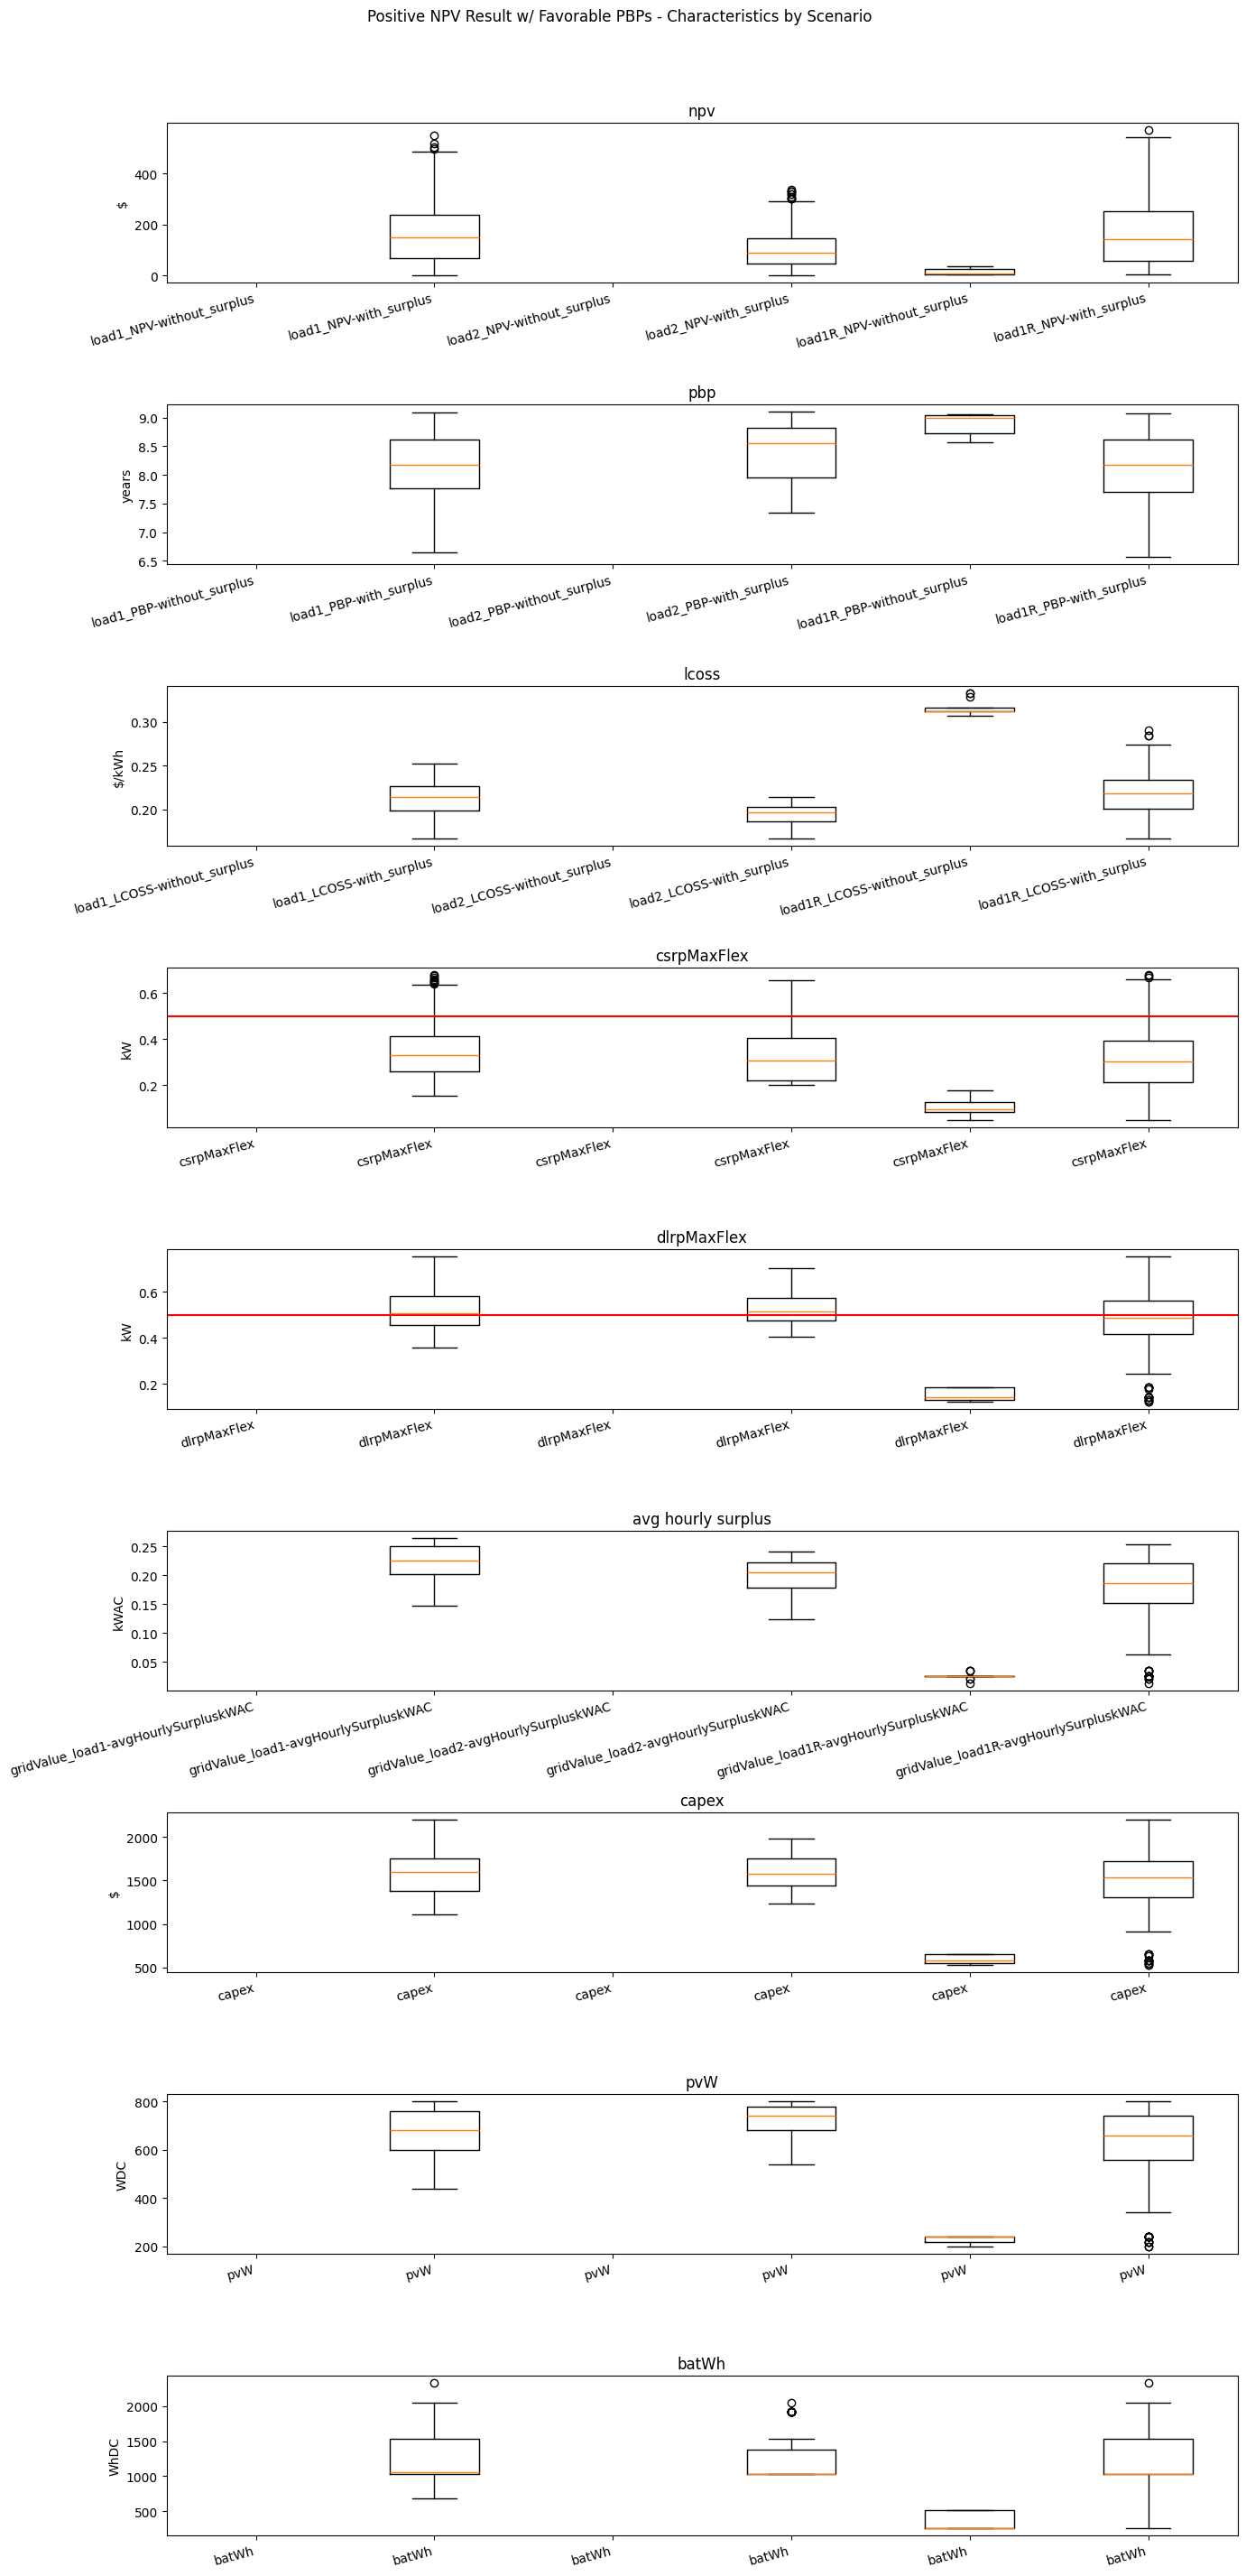

In [611]:
scenarios = ['without_surplus', 'with_surplus']
loads = ['1','2','1R']
#baseline_scenarios = [f'load{b}_NPV-{s}' for b in baselines for s in scenarios]
#print(baseline_scenarios)
plot_results = ['npv','pbp','lcoss','csrpMaxFlex','dlrpMaxFlex','avg hourly surplus','capex','pvW','batWh']
units = ['$','years','$/kWh','kW','kW','kWAC','$','WDC','WhDC']

fig, axs = plt.subplots(len(plot_results),1, figsize=(14, 30))#, sharey=True to have identical heights

for ir, r in enumerate(plot_results): # category to plot
    boxPlotData = []
    myLabels=[]
    for il, l in enumerate(loads):
        for isc, sc in enumerate(scenarios):# with or without surplus
            if l == '1':
                data = load1_expAnalyze_df[(load1_expAnalyze_df[f'load{l}_NPV-{sc}']>=0)]# & (load1_expAnalyze_df[f'load{l}_PBP-{sc}']<=load1_expAnalyze_df['workingLife'])]
            elif l == '2':
                data = load2_expAnalyze_df[(load2_expAnalyze_df[f'load{l}_NPV-{sc}']>=0)]# & (load2_expAnalyze_df[f'load{l}_PBP-{sc}']<=load2_expAnalyze_df['workingLife'])]
            elif l == '1R':
                data = load1R_expAnalyze_df[(load1R_expAnalyze_df[f'load{l}_NPV-{sc}']>=0)]# & (load1R_expAnalyze_df[f'load{l}_PBP-{sc}']<=load1R_expAnalyze_df['workingLife'])]
            
            #print(f'{r}-{b}')
            if r == 'npv':
                bb = f'load{l}_NPV-{sc}'
            elif r == 'pbp':
                bb = f'load{l}_PBP-{sc}'
            elif r == 'lcoss':
                bb = f'load{l}_LCOSS-{sc}'
            elif r == 'avg hourly surplus':
                bb = f'gridValue_load{l}-avgHourlySurpluskWAC'
            else:
                bb = r
            #load1_expAnalyze_df[load1_expAnalyze_df['load1R_NPV-without_surplus']>=0]
            boxPlotData.append(list(data[bb]))
            myLabels.append(bb)

    axs[ir].boxplot(boxPlotData, tick_labels=myLabels)
    for label in axs[ir].get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')
        
    axs[ir].set_title(f'{r}')
    axs[ir].set_ylabel(f'{units[ir]}') 

    # draw line to indicate comparison
    if 'Flex' in r:
        axs[ir].axhline(0.5, c='r')

#fig.subplots_adjust(bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
fig.suptitle('Positive NPV Result w/ Favorable PBPs - Characteristics by Scenario')

plt.savefig(f"outputs/positiveNPVs_{datetime.now().timestamp()}.png")
plt.show()


In [566]:
newResults = []
loads_df = [load1_expAnalyze_df,load2_expAnalyze_df,load1R_expAnalyze_df]
for i, c in enumerate(loads_df):
    if i ==0:
        ic = '1'
    elif i == 1:
        ic = 2
    elif i == 2:
        ic = '1R'
    for nc in [f'load{ic}_NPV-with_surplus',f'load{ic}_NPV-without_surplus']:
        #make a new column with the negative NPV, when treated as a discount percentage
        newResults.append(f'{c}-percent')
        c[f'{nc}-percent'] = ((c['capex']+c[nc]) / c['capex'])* 100.00
load1_expAnalyze_df.head()

C:\Users\alexn\AppData\Local\Temp\ipykernel_19120\1795856207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c[f'{nc}-percent'] = ((c['capex']+c[nc]) / c['capex'])* 100.00
C:\Users\alexn\AppData\Local\Temp\ipykernel_19120\1795856207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c[f'{nc}-percent'] = ((c['capex']+c[nc]) / c['capex'])* 100.00
C:\Users\alexn\AppData\Local\Temp\ipykernel_19120\1795856207.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,network,pvW,batModel,batWh,batWhAC,capex,workingLife,csrpMaxFlex,dlrpMaxFlex,csrpLoad1_percentage,...,gridValue_load1-ann_surpluskWhAC,gridValue_load1-ann_surpluskWhAC_value,gridValue_load1-requiredGridkWhAC,gridValue_load1-requiredGridkWhAC_cost,gridValue_load1-eventGridChargekWhAC,gridValue_load1-eventGridChargekWhAC_costs,gridValue_load1-avoidedGridkWhAC,gridValue_load1-avoidedGridkWhAC_value,load1_NPV-with_surplus-percent,load1_NPV-without_surplus-percent
0,bowling green,0,Explorer 300 Plus,288.0,198.404892,452.451838,8.219178,0.039698,0.039698,0.079396,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[105.79957894736843, 105.79957894736843, 105.7...","[28.48124665263158, 28.48124665263158, 28.4812...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-48.549172,-48.549172
1,bowling green,20,Explorer 300 Plus,288.0,198.404892,500.857663,8.219178,0.046704,0.047305,0.093409,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[77.54116442018972, 77.82374856546164, 78.1035...","[20.874081461915072, 20.950153113822275, 21.02...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-31.110016,-31.110016
2,bowling green,40,Explorer 300 Plus,288.0,198.404892,524.810163,8.219178,0.055486,0.056716,0.110972,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[49.282749893011356, 49.84791818355497, 50.407...","[13.266916271198657, 13.419059575012996, 13.56...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-17.367302,-17.367302
3,bowling green,60,Explorer 300 Plus,288.0,198.404892,548.762663,8.219178,0.064277,0.066127,0.128554,...,"[3.5752705130436273, 3.219309703034925, 2.8884...","[0.9624628221113445, 0.8666381720570018, 0.777...","[25.43526599125707, 25.84555606411839, 26.2780...","[6.847173604846403, 6.957623692460671, 7.07404...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",-5.055039,-6.037027
4,bowling green,80,Explorer 300 Plus,288.0,198.404892,572.715163,8.219178,0.073061,0.075528,0.146122,...,"[18.98162022297776, 18.26607591958229, 17.5607...","[5.109852164025613, 4.917227637551552, 4.72735...","[16.087367381426315, 16.339912758833925, 16.59...","[4.330719299079964, 4.3987045146780925, 4.4670...","[1.2126315789473687, 1.2126315789473687, 1.212...","[0.32644042105263166, 0.32644042105263166, 0.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5.218403,-1.121621


In [567]:
load1R_expAnalyze_df.describe()

,pvW,batWh,batWhAC,capex,workingLife,csrpMaxFlex,dlrpMaxFlex,csrpLoad1replacement_percentage,load1R_NPV-without_surplus,load1R_NPV-with_surplus,load1R_PBP-without_surplus,load1R_PBP-with_surplus,load1R_LCOSS-without_surplus,load1R_LCOSS-with_surplus,gridValue_load1R-avgHourlySurpluskWAC,gridValue_load1R-maxHourlySurpluskWAC,load1R_NPV-with_surplus-percent,load1R_NPV-without_surplus-percent
count,12036.000000,12036.000000,11790.000000,12036.000000,12036.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000,11790.000000,12036.000000,12036.000000,11790.000000,11790.000000
mean,311.405783,1578.480309,1074.106812,1536.810783,9.203963,0.312393,0.389471,4.165235,-823.295639,-737.634348,56.906332,56.237834,0.839996,0.748718,0.049689,0.091958,48.779127,44.290532
std,228.478578,752.405134,524.084723,676.030707,0.809493,0.156826,0.192656,2.091010,523.083573,569.288018,4175.789938,4175.797029,0.575302,0.584311,0.074061,0.135182,32.149961,26.767270
min,0.000000,99.900000,67.757275,266.286475,5.479452,0.007189,0.007189,0.095859,-3353.703374,-3353.703374,-21577.727473,-21577.727473,0.307320,0.167104,0.000000,0.000000,-65.538320,-65.538320
25%,120.000000,1024.000000,683.528851,998.427300,8.219178,0.195491,0.241966,2.606546,-1106.355121,-1068.053610,12.852992,11.247720,0.469934,0.362141,0.000000,0.000000,24.586289,24.586289
50%,260.000000,1536.000000,1044.294980,1514.494800,9.589041,0.324778,0.390761,4.330376,-711.095555,-630.589313,16.959046,16.291828,0.639343,0.546211,0.000000,0.000000,48.433841,47.430722
75%,480.000000,2048.000000,1409.369442,2004.432300,10.000000,0.401615,0.525597,5.354872,-438.280392,-357.242091,28.882116,28.882116,1.006269,0.930586,0.090105,0.182891,72.116140,64.287184
max,800.000000,3686.000000,2544.688801,3895.591050,10.000000,0.954610,0.979158,12.728133,35.581672,570.950929,436413.329064,436413.329064,5.027715,5.004515,0.253357,0.465346,135.991433,106.067154


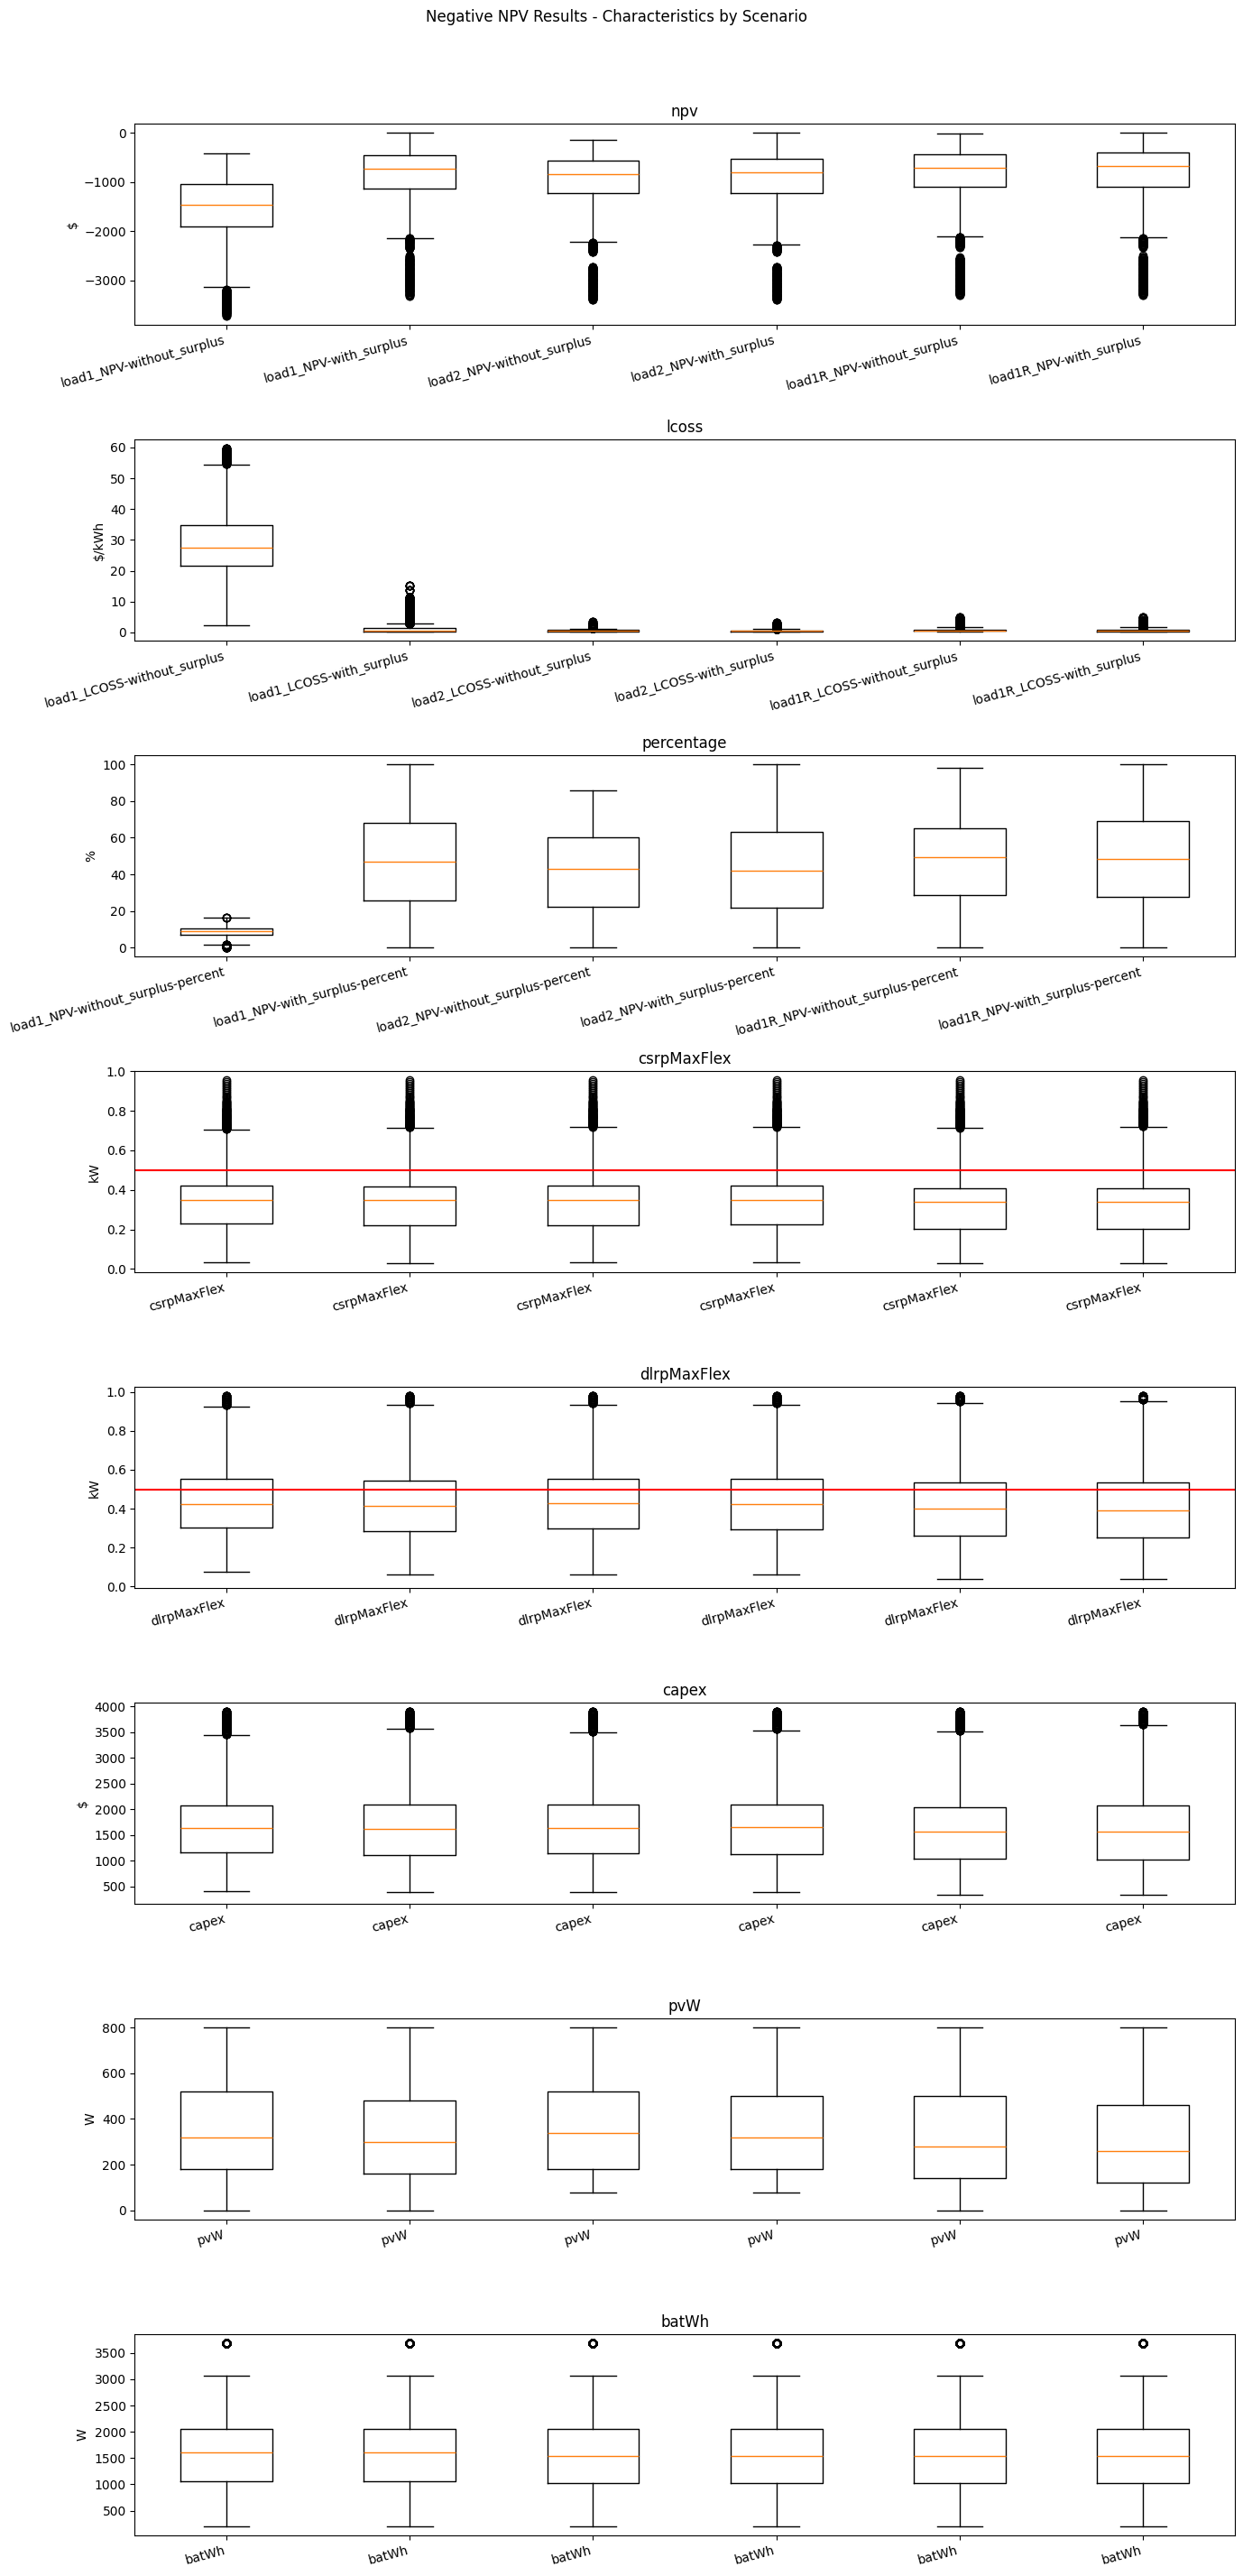

In [570]:
scenarios = ['without_surplus', 'with_surplus']
loads = ['1','2','1R']
#baseline_scenarios = [f'load{b}_NPV-{s}' for b in baselines for s in scenarios]
#print(baseline_scenarios)
plot_results = ['npv','lcoss','percentage','csrpMaxFlex','dlrpMaxFlex','capex','pvW','batWh']
units = ['$','$/kWh','%','kW','kW','$','W','W']

fig, axs = plt.subplots(len(plot_results),1, figsize=(14, 30))#, sharey=True to have identical heights

for ir, r in enumerate(plot_results): # category to plot
    boxPlotData = []
    myLabels=[]
    for il, l in enumerate(loads):
        for isc, sc in enumerate(scenarios):# with or without surplus
            if l == '1':
                data = load1_expAnalyze_df[(load1_expAnalyze_df[f'load{l}_NPV-{sc}']<0)&(load1_expAnalyze_df[f'load{l}_NPV-{sc}']>=(-1*load1_expAnalyze_df['capex']))]
            elif l == '2':
                data = load2_expAnalyze_df[(load2_expAnalyze_df[f'load{l}_NPV-{sc}']<0)&(load2_expAnalyze_df[f'load{l}_NPV-{sc}']>=(-1*load2_expAnalyze_df['capex']))]
            elif l == '1R':
                data = load1R_expAnalyze_df[(load1R_expAnalyze_df[f'load{l}_NPV-{sc}']<0)&(load1R_expAnalyze_df[f'load{l}_NPV-{sc}']>=(-1*load1R_expAnalyze_df['capex']))]
                #rDF = expAnalyze_df[(expAnalyze_df[b]<0)&(expAnalyze_df[b]>=(-1*expAnalyze_df['capex']))] # get positive NPVs
            
            #print(f'{r}-{b}')
            if r == 'npv':
                bb = f'load{l}_NPV-{sc}'
            elif r == 'pbp':
                bb = f'load{l}_PBP-{sc}'
            elif r == 'lcoss':
                bb = f'load{l}_LCOSS-{sc}'
            elif r == 'percentage':
                bb = f'load{l}_NPV-{sc}-percent'
            else:
                bb = r
            #load1_expAnalyze_df[load1_expAnalyze_df['load1R_NPV-without_surplus']>=0]
            boxPlotData.append(list(data[bb]))
            myLabels.append(bb)

    axs[ir].boxplot(boxPlotData, tick_labels=myLabels)
    for label in axs[ir].get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')
        
    axs[ir].set_title(f'{r}')
    axs[ir].set_ylabel(f'{units[ir]}') 

    # draw line to indicate comparison
    if 'Flex' in r:
        axs[ir].axhline(0.5, c='r')

#fig.subplots_adjust(bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
fig.suptitle('Negative NPV Results - Characteristics by Scenario')

plt.savefig(f"outputs/negativeNPVs_{datetime.now().timestamp()}.png")
plt.show()

# stop

KeyError: 'load1_NPV-gridValueEvents'

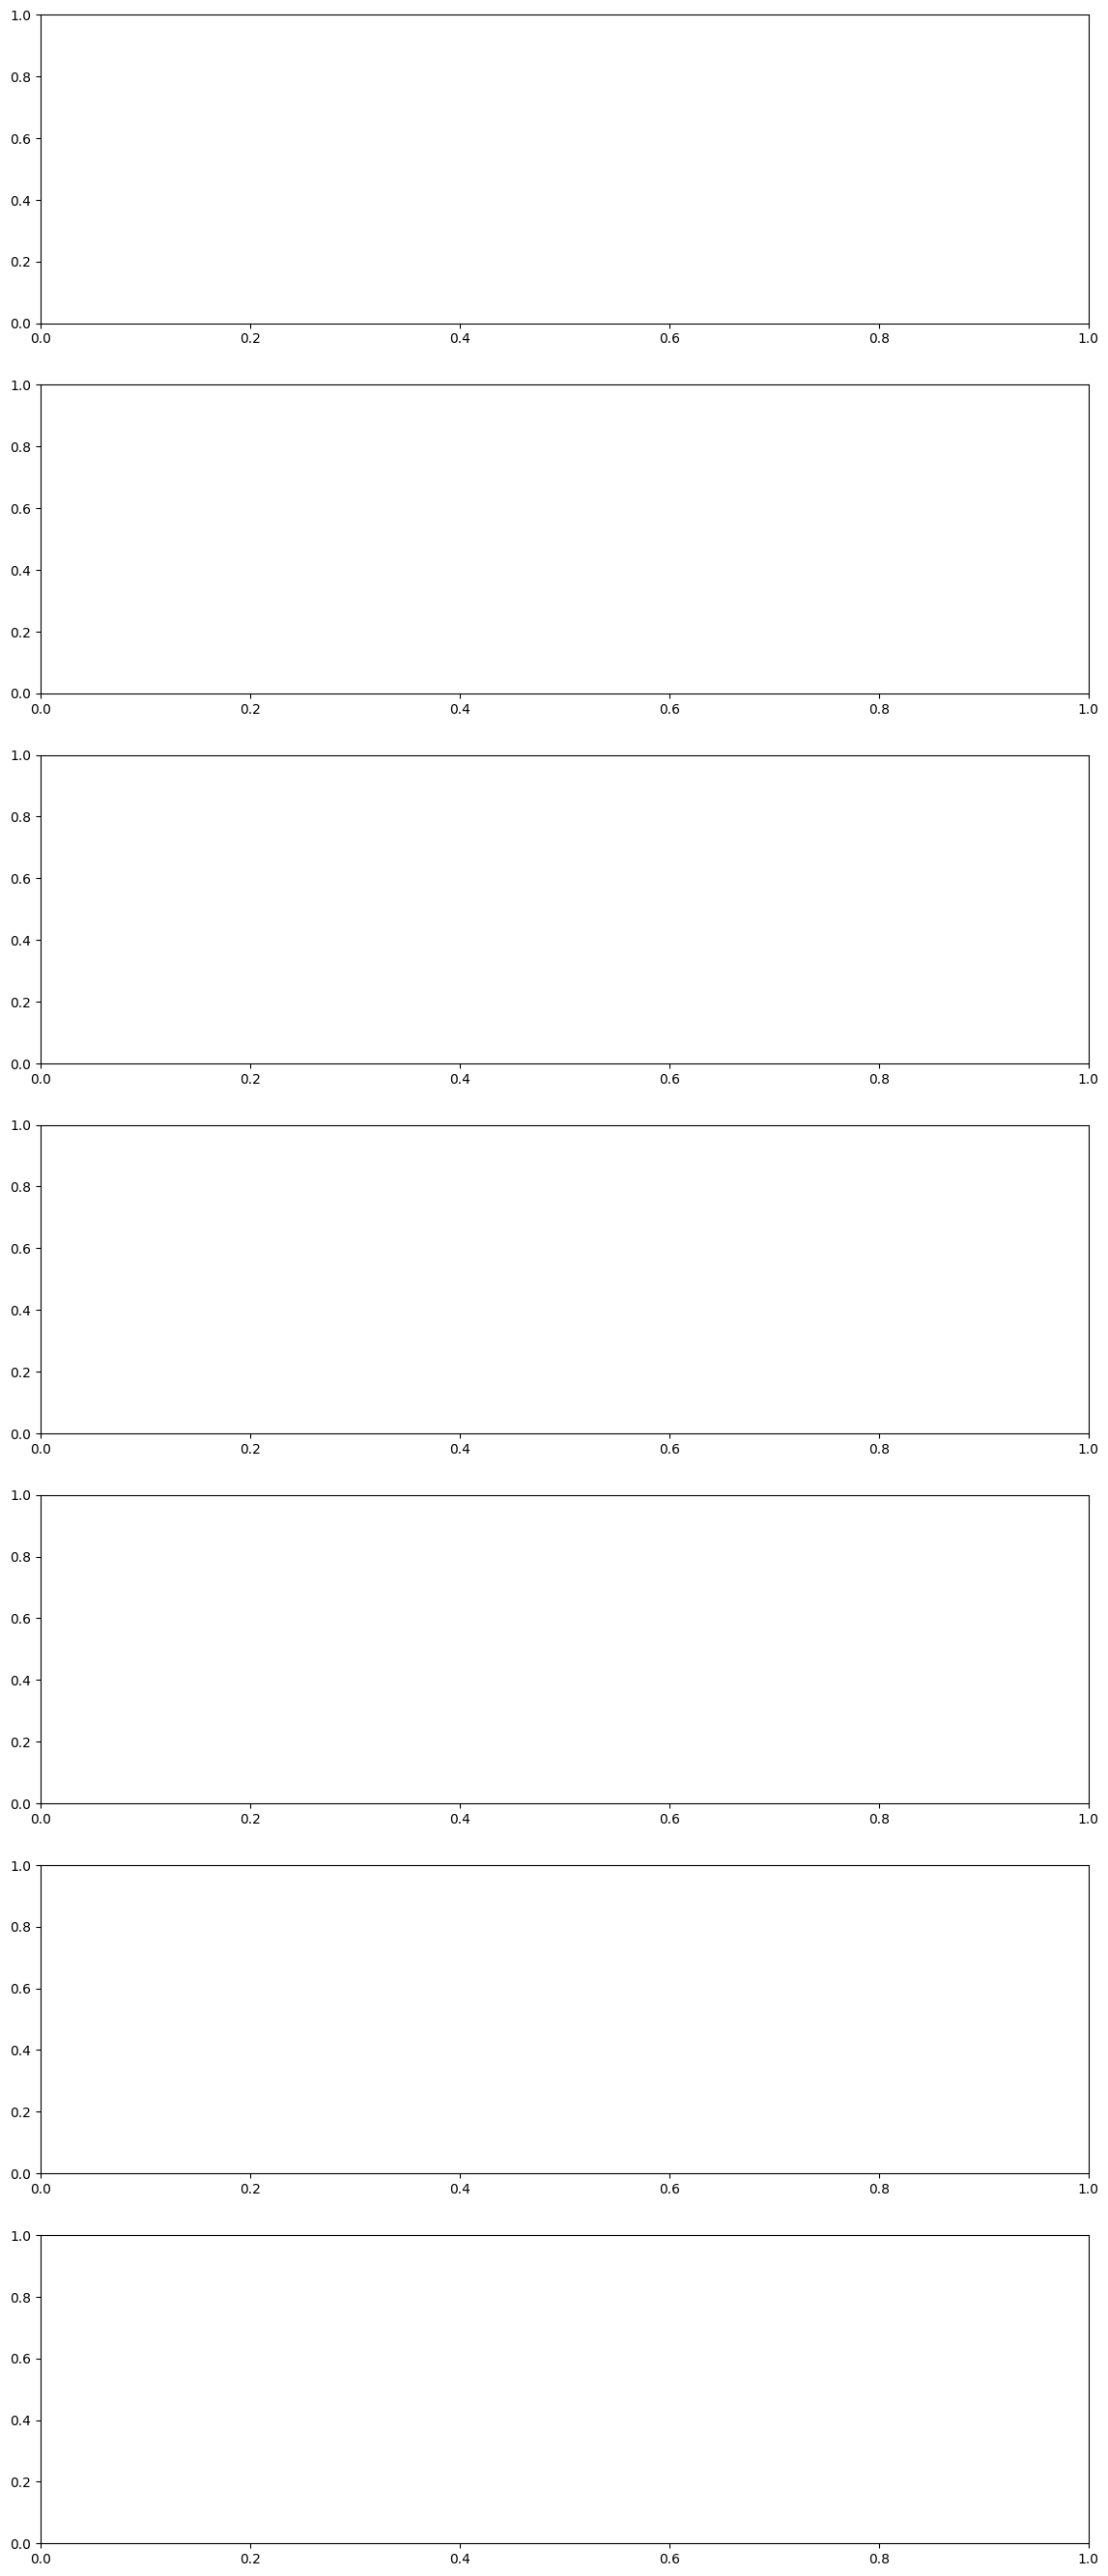

In [529]:
scenarios = ['gridValueEvents', 'gridValueDRSeason', 'gridValueAnnual']
baselines = ['1','2','1R']
baseline_scenarios = [f'load{b}_NPV-{s}' for b in baselines for s in scenarios]

results = ['npv','percentage','csrpMaxFlex','dlrpMaxFlex','capex','pvW','batWh']
units = ['$','%','kW','kW','$','W','W']

fig, axs = plt.subplots(len(results),1, figsize=(14, 34))#, sharey=True to have identical heights

for ir, r in enumerate(results):
    boxPlotData = []
    myLabels=[]
    for ib, b in enumerate(baseline_scenarios):
        #print(f'{r}-{b}')
        if r == 'npv':
            bb = b
        elif r == 'pbp':
            bb = b.replace('NPV','PBP')
        elif r == 'percentage':
            bb = b+'-percent'
            #print(bb)
        else:
            bb = r
        rDF = expAnalyze_df[(expAnalyze_df[b]<0)&(expAnalyze_df[b]>=(-1*expAnalyze_df['capex']))] # get positive NPVs
        boxPlotData.append(list(rDF[bb]))

        myLabels.append(b.replace('_NPV','').replace('_PBP','').replace('load','L'))

    axs[ir].boxplot(boxPlotData, tick_labels=myLabels)
    for label in axs[ir].get_xticklabels():
        label.set_rotation(15)
        label.set_horizontalalignment('right')
        
    axs[ir].set_title(f'{r}')
    axs[ir].set_ylabel(f'{units[ir]}') 

    # draw line to indicate comparison
    if 'Flex' in r:
        axs[ir].axhline(0.5, c='r')

#fig.subplots_adjust(bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
fig.suptitle('Negative NPV Result Characteristics by Scenario')
    
plt.show()

## Correlation of favorable characteristics

to do: encode favorability into similar scale

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr = df.corr(numeric_only=True)
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

# Below this is old/older shit

In [75]:
#filter out systems that lost money
#L1_favNPV_df = results_df[results_df['load1_NPV'].apply(lambda d: d.get('gridValueAnnual') >= 0)] 
L1_favNPV_df = results_df[results_df.apply(lambda r: r['load1_NPV'].get('gridValueAnnual') > float(-1*r['capex']),axis=1)] 
L1_favNPV_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,18398.000000,18398.000000,18398.000000,18398.0,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.0
mean,15.438689,20.352103,15.376019,180.0,535.398413,952.906307,651.077101,0.851835,190.581261,1442.375331,3335.498424,9.138352,8.872205,0.0
std,2.413051,3.306498,4.960225,0.0,175.134428,655.593687,451.194797,0.011514,131.118737,587.849028,540.986618,1.482155,0.971724,0.0
min,11.000000,18.000000,6.000000,180.0,100.000000,99.900000,67.757275,0.822648,19.980000,432.277300,2000.000000,5.479452,5.479452,0.0
25%,14.000000,18.000000,18.000000,180.0,400.000000,384.000000,259.895349,0.846014,76.800000,1037.622300,3000.000000,8.219178,8.219178,0.0
50%,16.000000,18.000000,18.000000,180.0,560.000000,768.000000,519.790698,0.855905,153.600000,1317.420163,3500.000000,9.589041,9.589041,0.0
75%,16.000000,25.000000,18.000000,180.0,680.000000,1382.000000,943.789260,0.861132,276.400000,1730.067300,3500.000000,9.589041,9.589041,0.0
max,19.000000,25.000000,18.000000,180.0,800.000000,3072.000000,2107.198692,0.872238,614.400000,4254.878550,6000.000000,16.438356,10.000000,0.0


In [72]:
#L1_favPBP_df = results_df[results_df['load1_PBP'] <= results_df['workingLife']] 

L1_favPBP_df = results_df[results_df.apply(lambda r: r['load1_PBP'].get('gridValueAnnual') <= float(r['workingLife']),axis=1)] 
L1_favPBP_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,16833.000000,16833.000000,16833.000000,16833.0,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.0
mean,15.427553,20.327927,15.316699,180.0,323.259074,1258.122527,862.146617,0.853503,251.624505,1355.178724,3443.955326,9.435494,9.071011,0.0
std,2.409926,3.298013,5.000099,0.0,250.420275,885.981971,611.306070,0.011335,177.196394,612.188801,561.841474,1.539292,0.886902,0.0
min,11.000000,18.000000,6.000000,180.0,0.000000,99.900000,67.757275,0.822648,19.980000,266.286475,2000.000000,5.479452,5.479452,0.0
25%,14.000000,18.000000,18.000000,180.0,100.000000,504.000000,345.496553,0.846014,100.800000,923.303550,3000.000000,8.219178,8.219178,0.0
50%,16.000000,18.000000,18.000000,180.0,260.000000,1024.000000,688.306567,0.857421,204.800000,1262.993550,3500.000000,9.589041,9.589041,0.0
75%,16.000000,25.000000,18.000000,180.0,540.000000,2048.000000,1404.799128,0.862211,409.600000,1682.162300,3500.000000,9.589041,9.589041,0.0
max,19.000000,25.000000,18.000000,180.0,800.000000,3686.000000,2544.688801,0.872238,737.200000,4015.353550,6000.000000,16.438356,10.000000,0.0


KeyError: 'gridValueEvents'

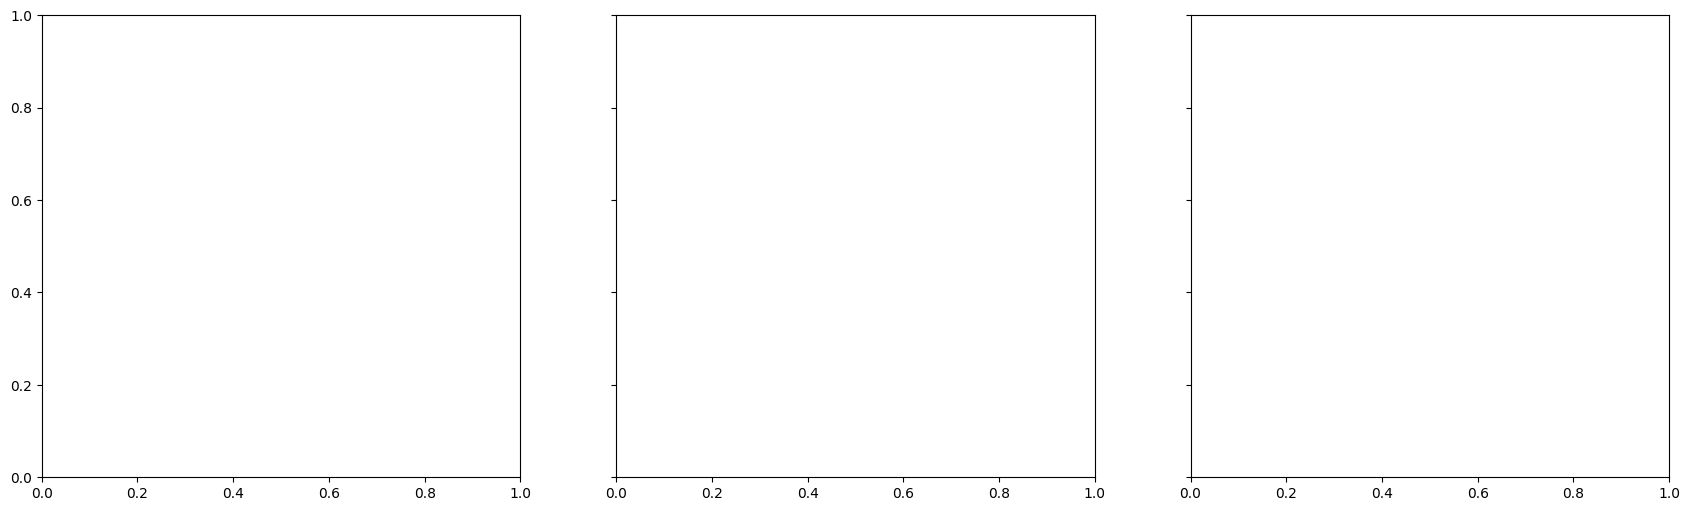

In [78]:
n = ['gridValueEvents', 'gridValueDRSeason', 'gridValueAnnual']
fig, axs = plt.subplots(1, 3, figsize=(21, 6), sharey=True)  # 3 subplots side by side

for i, c in enumerate(n):
    ax = axs[i]
    
    # Filter and plot each histogram
    ax.hist(
        L1_favPBP_df['load1_PBP'][f'{c}'],bins=200, facecolor='blue', alpha=0.5, label='load1')
    # ax.hist(
    #     L2_favPBP_df[(L2_favPBP_df[f'load2_PBP{c}'] >= 0) & (L1_favPBP_df[f'load2_PBP_{c}'] < 20)][f'load2_PBP_{c}'],
    #     bins=200, facecolor='red', alpha=0.5, label='load2'
    # )
    # ax.hist(
    #     L1R_favPBP_df[(L1R_favPBP_df[f'load1R_PBP{c}'] >= 0) & (L1_favPBP_df[f'load1R_PBP_{c}'] < 20)][f'load1R_PBP_{c}'],
    #     bins=200, facecolor='green', alpha=0.5, label='load1R'
    # )
    
    ax.set_title(f'Load 1 PBP Histogram')
    ax.set_xlabel('PBP (years)')
    if i == 0:
        ax.set_ylabel('Number of Hardware Combinations')
    ax.legend()

plt.tight_layout()
plt.show()


# Load 2

In [65]:
#filter out any negative NPV
L2_favNPV_df = results_df[results_df['load2_NPV'].apply(lambda d: d.get('gridValueAnnual') >= 0)] 
L2_favNPV_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,2911.00000,2911.000000,2911.000000,2911.0,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0
mean,15.42494,20.351769,15.374098,180.0,655.506699,336.142322,228.620037,0.849575,67.228464,1178.893933,3215.905187,8.810699,8.801805,0.0
std,2.40813,3.306860,4.962249,0.0,102.953677,125.485206,85.916669,0.015024,25.097041,165.196223,344.845994,0.944784,0.928893,0.0
min,11.00000,18.000000,6.000000,180.0,380.000000,99.900000,67.757275,0.822648,19.980000,745.837300,2000.000000,5.479452,5.479452,0.0
25%,14.00000,18.000000,18.000000,180.0,580.000000,256.000000,168.478346,0.834348,51.200000,1061.574800,3000.000000,8.219178,8.219178,0.0
50%,16.00000,18.000000,18.000000,180.0,660.000000,288.000000,198.404892,0.855905,57.600000,1192.224800,3500.000000,9.589041,9.589041,0.0
75%,16.00000,25.000000,18.000000,180.0,740.000000,384.000000,259.895349,0.861132,76.800000,1290.212300,3500.000000,9.589041,9.589041,0.0
max,19.00000,25.000000,18.000000,180.0,800.000000,665.000000,461.702993,0.872238,133.000000,1652.755163,4000.000000,10.958904,10.000000,0.0


In [73]:
L2_favPBP_df = results_df[results_df.apply(lambda r: r['load2_PBP'].get('gridValueAnnual') <= float(r['workingLife']),axis=1)] 
L2_favPBP_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,17069.000000,17069.000000,17069.000000,17069.0,17069.000000,17069.000000,17069.000000,17069.000000,17069.000000,17069.000000,17069.000000,17069.000000,17069.000000,17069.0
mean,15.440682,20.333470,15.334818,180.0,317.765540,1308.719987,897.074608,0.853823,261.743997,1382.069795,3456.904329,9.470971,9.088277,0.0
std,2.408377,3.299977,4.988031,0.0,243.092911,890.187638,614.242032,0.011178,178.037528,636.505263,569.729893,1.560904,0.881208,0.0
min,11.000000,18.000000,6.000000,180.0,0.000000,99.900000,67.757275,0.822648,19.980000,266.286475,2000.000000,5.479452,5.479452,0.0
25%,14.000000,18.000000,18.000000,180.0,100.000000,512.000000,351.199782,0.846014,102.400000,932.002663,3000.000000,8.219178,8.219178,0.0
50%,16.000000,18.000000,18.000000,180.0,260.000000,1210.000000,834.935105,0.857421,242.000000,1272.792300,3500.000000,9.589041,9.589041,0.0
75%,16.000000,25.000000,18.000000,180.0,500.000000,2048.000000,1404.799128,0.862211,409.600000,1737.677663,3500.000000,9.589041,9.589041,0.0
max,19.000000,25.000000,18.000000,180.0,800.000000,3686.000000,2544.688801,0.872238,737.200000,4063.258550,6000.000000,16.438356,10.000000,0.0


# Load 3

In [67]:
#filter out any negative NPV
L1R_favNPV_df = results_df[results_df['load1R_NPV'].apply(lambda d: d.get('gridValueAnnual') >= 0)] 
L1R_favNPV_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,4411.000000,4411.000000,4411.000000,4411.0,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.0
mean,15.408297,20.466107,15.554296,180.0,625.245976,380.545912,258.858486,0.849732,76.109182,1174.126613,3200.906824,8.769608,8.745695,0.0
std,2.409621,3.344189,4.834488,0.0,128.781317,177.431991,120.964622,0.014340,35.486398,225.286859,370.473856,1.014997,0.973578,0.0
min,11.000000,18.000000,6.000000,180.0,260.000000,99.900000,67.757275,0.822648,19.980000,602.122300,2000.000000,5.479452,5.479452,0.0
25%,14.000000,18.000000,18.000000,180.0,520.000000,256.000000,175.599891,0.834429,51.200000,1018.024800,3000.000000,8.219178,8.219178,0.0
50%,16.000000,18.000000,18.000000,180.0,640.000000,299.000000,199.201302,0.854709,59.800000,1170.449800,3000.000000,8.219178,8.219178,0.0
75%,16.000000,25.000000,18.000000,180.0,740.000000,512.000000,353.468565,0.861132,102.400000,1311.987300,3500.000000,9.589041,9.589041,0.0
max,19.000000,25.000000,18.000000,180.0,800.000000,1210.000000,834.935105,0.872238,242.000000,1869.427300,4000.000000,10.958904,10.000000,0.0


In [74]:
L1R_favPBP_df = results_df[results_df.apply(lambda r: r['load1R_PBP'].get('gridValueAnnual') <= float(r['workingLife']),axis=1)] 
L1R_favPBP_df.describe()

,eventStart,dlrp_rate,csrp_rate,az,pvW,batWh,batWhAC,effEff,dischargeRateW,capex,cycles,lifespan,workingLife,immediateEventAmt
count,17013.000000,17013.000000,17013.000000,17013.0,17013.000000,17013.000000,16798.000000,16798.000000,17013.000000,17013.000000,17013.000000,17013.000000,17013.000000,17013.0
mean,15.434609,20.328807,15.321813,180.0,341.549403,1250.184585,849.724859,0.853422,250.036917,1365.808964,3437.030506,9.416522,9.062957,0.0
std,2.404470,3.298325,4.996702,0.0,252.404375,892.057559,616.199629,0.011434,178.411512,595.995699,560.998802,1.536983,0.902095,0.0
min,11.000000,18.000000,6.000000,180.0,0.000000,99.900000,67.757275,0.822648,19.980000,266.286475,2000.000000,5.479452,5.479452,0.0
25%,14.000000,18.000000,18.000000,180.0,100.000000,448.000000,303.211240,0.846014,89.600000,952.699800,3000.000000,8.219178,8.219178,0.0
50%,16.000000,18.000000,18.000000,180.0,300.000000,1024.000000,688.306567,0.857421,204.800000,1283.679800,3500.000000,9.589041,9.589041,0.0
75%,16.000000,25.000000,18.000000,180.0,560.000000,2048.000000,1404.799128,0.862211,409.600000,1669.097300,3500.000000,9.589041,9.589041,0.0
max,19.000000,25.000000,18.000000,180.0,800.000000,3686.000000,2544.688801,0.872238,737.200000,4015.353550,6000.000000,16.438356,10.000000,0.0


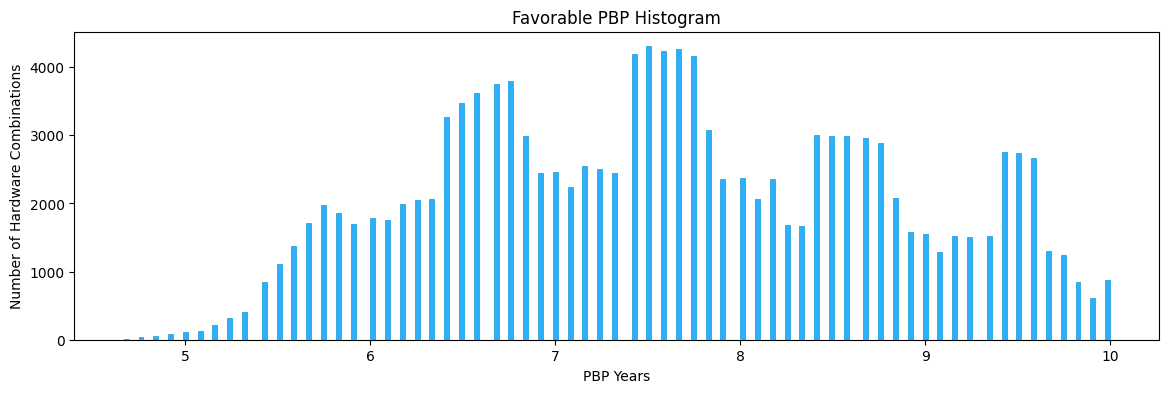

In [12]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favPBP_df['PBP'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Favorable PBP Histogram') 
plt.xlabel('PBP Years') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

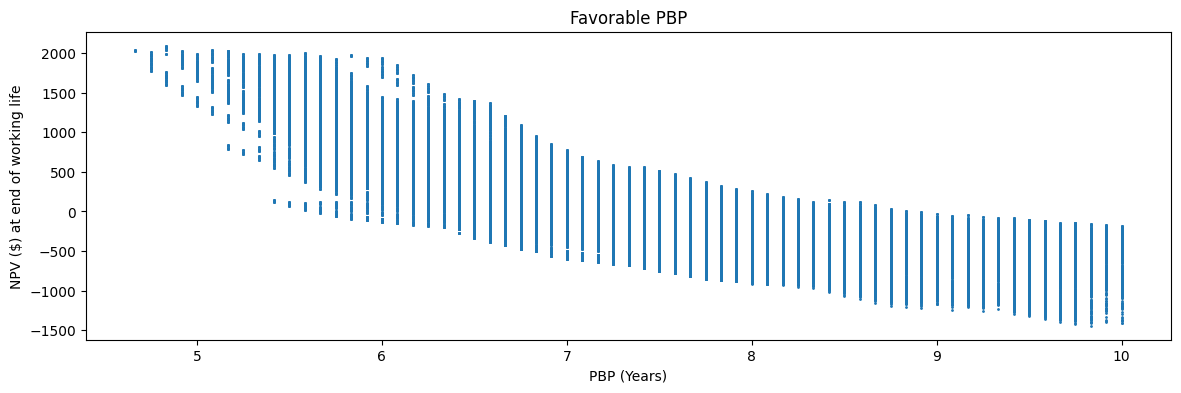

In [13]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(favPBP_df['PBP'],favPBP_df['NPV'], s=1)
plt.title('Favorable PBP') 
plt.xlabel('PBP (Years)') 
plt.ylabel('NPV ($) at end of working life') 
plt.show()

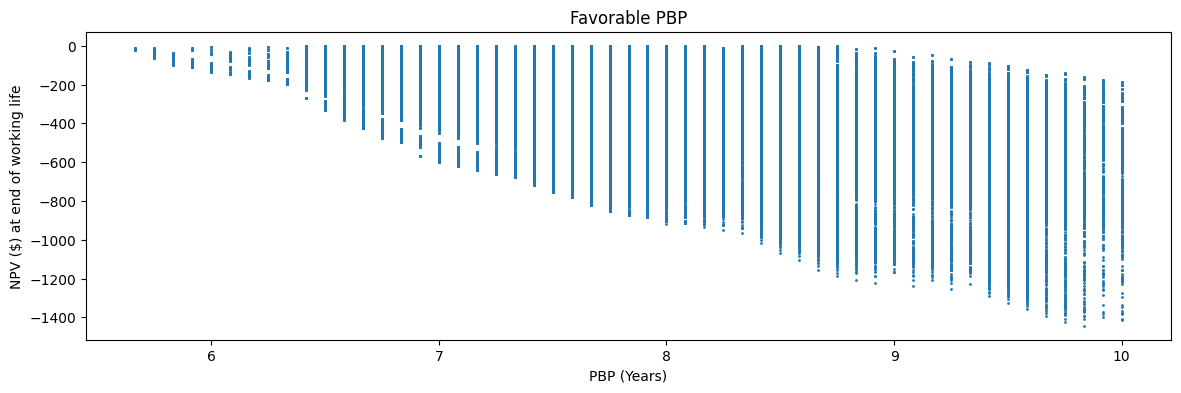

In [14]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(favPBP_df[favPBP_df['NPV']<= 0]['PBP'],favPBP_df[favPBP_df['NPV']<= 0]['NPV'], s=1)
plt.title('Favorable PBP') 
plt.xlabel('PBP (Years)') 
plt.ylabel('NPV ($) at end of working life') 
plt.show()

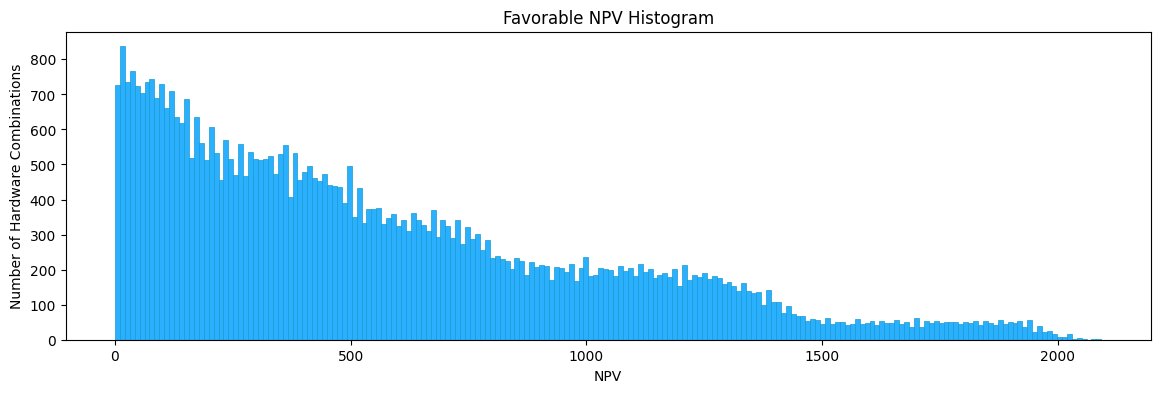

In [15]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favNPV_df['NPV'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Favorable NPV Histogram') 
plt.xlabel('NPV') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

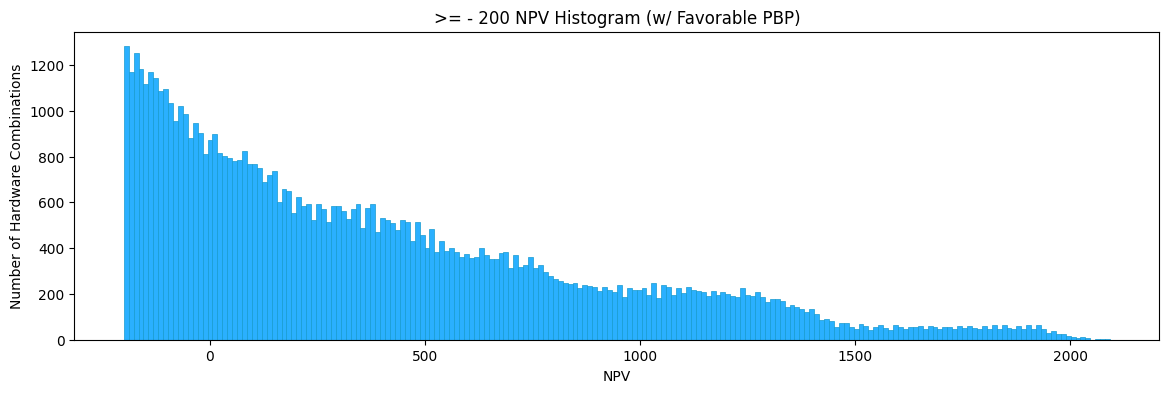

In [16]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(favPBP_df[favPBP_df['NPV']>=-200]['NPV'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('>= - 200 NPV Histogram (w/ Favorable PBP)') 
plt.xlabel('NPV') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

Text(0.5, 1.0, 'PBP and NPV')

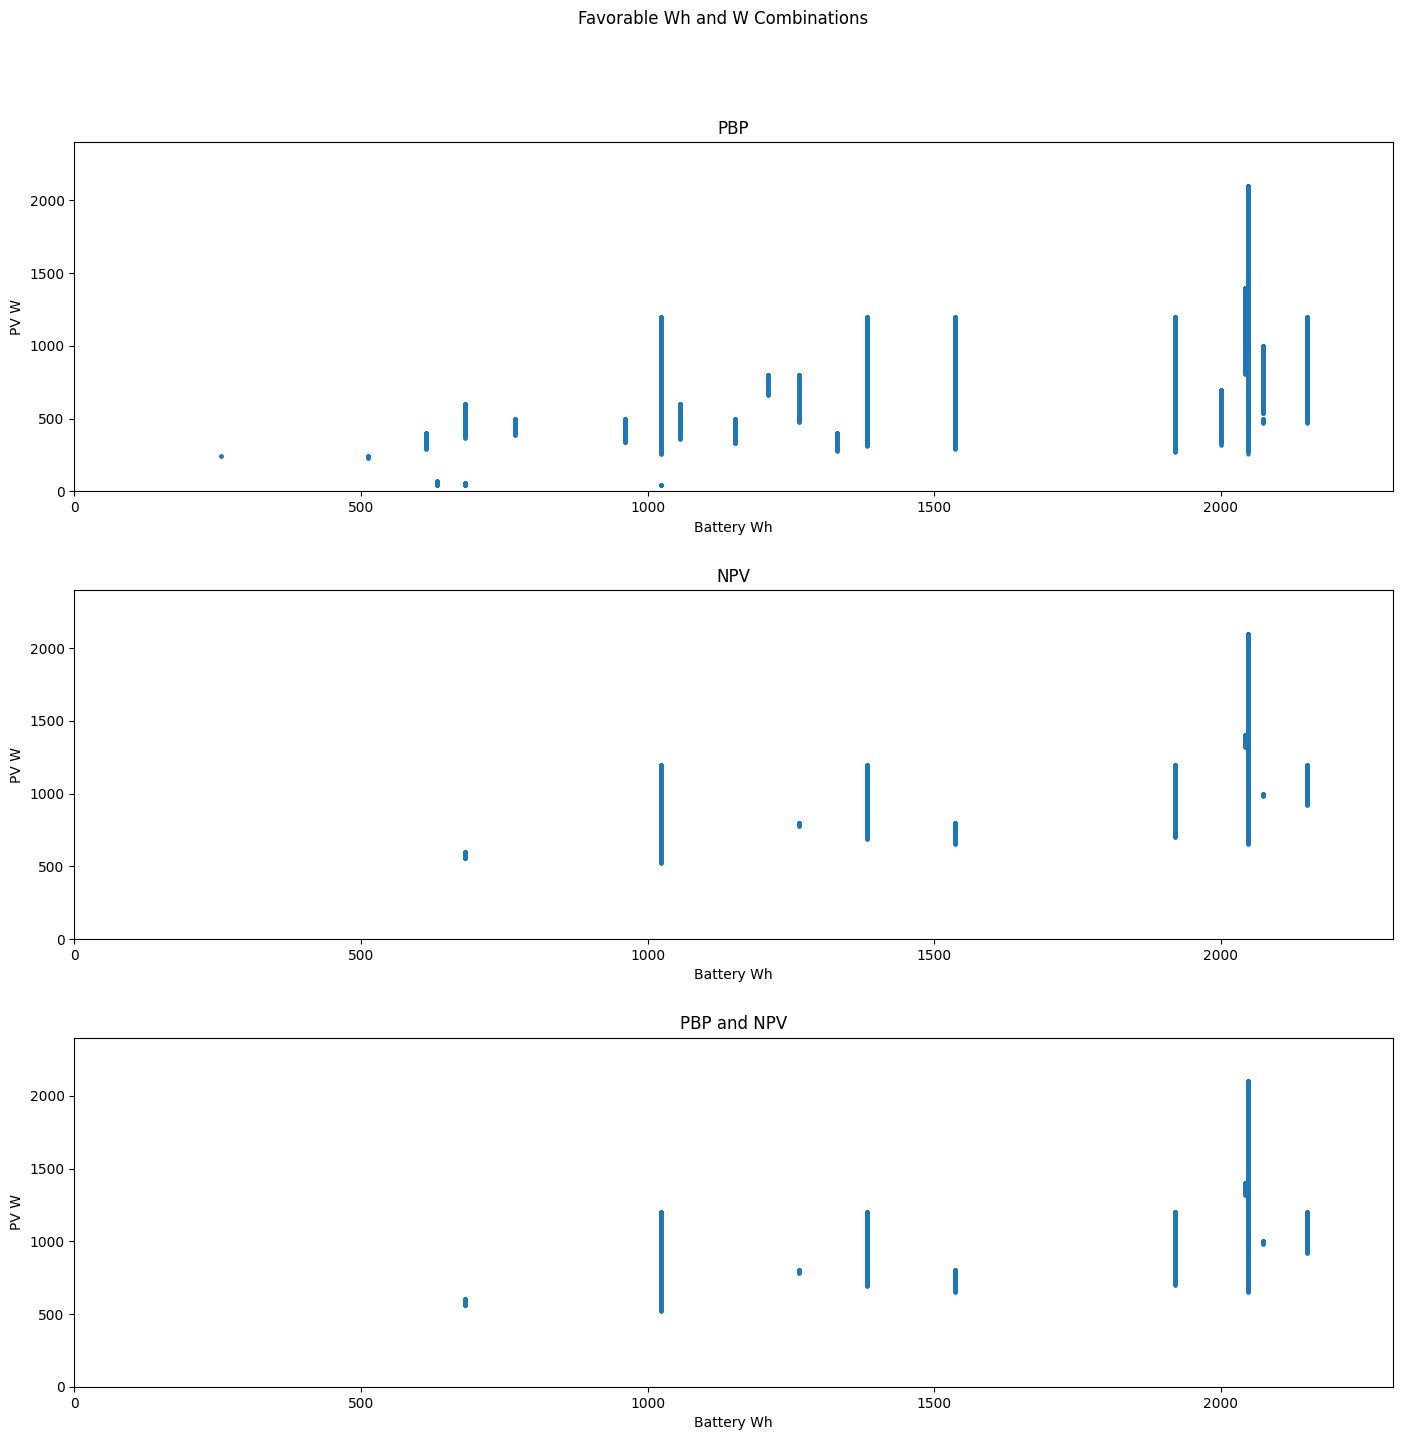

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15, 15))#plt.figure(figsize=(15, 3), layout='constrained')
fig.suptitle("Favorable Wh and W Combinations")
fig.tight_layout(pad=5.0)
xlim = [00,2300]
ylim = [0,2400]

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.scatter(favPBP_df['batWh'],favPBP_df['pvW'], s=4)
ax1.set_xlabel('Battery Wh')
ax1.set_ylabel('PV W')
ax1.set_title('PBP')

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.scatter(favNPV_df['batWh'],favNPV_df['pvW'], s=4)
ax2.set_xlabel('Battery Wh')
ax2.set_ylabel('PV W')
ax2.set_title('NPV')

ax3.set_xlim(xlim)
ax3.set_ylim(ylim)
ax3.scatter(fav_df['batWh'],fav_df['pvW'],s=4)
ax3.set_xlabel('Battery Wh')
ax3.set_ylabel('PV W')
ax3.set_title('PBP and NPV')


In [238]:
print(favPBP_df['batModel'].unique())
print(favNPV_df['batModel'].unique())
print(fav_df['batModel'].unique())


['Explorer 600 Plus' 'Explorer 700 Plus' 'Explorer 1000 Plus'
 'Explorer 2000 Plus' 'E600LFP' 'E1000LFP' 'E1500LFP Expandable'
 'E2000LFP Expandable' 'E3600LFP' 'AC70' 'AC180' 'AC200P' 'AC200L' 'AC240'
 'Elite 200V2' 'DELTA 2 Max' 'DELTA 3 Plus' 'HomePower One Pro'
 'SOLIX C1000' 'SOLIX F1500' 'SOLIX F2000 PowerHouse 767' 'Exodus 600'
 'Exodus 600 Plus' 'Mega 1' 'Mega 2' 'Mega 3' 'ST2000' 'DBS1000 Pro'
 'DBS1300' 'DBS1400 Pro' 'DBS2100 Pro' 'DBS2300' 'DBS2300 Plus '
 'INFINITY 1300' 'INFINITY 2000' 'HELIOS 3600' 'P1201' 'P2001' 'BP2000']
['Explorer 700 Plus' 'Explorer 1000 Plus' 'Explorer 2000 Plus' 'E1000LFP'
 'E1500LFP Expandable' 'E2000LFP Expandable' 'E3600LFP' 'Elite 200V2'
 'DELTA 3 Plus' 'Mega 1' 'Mega 2' 'Mega 3' 'DBS1000 Pro' 'DBS1400 Pro'
 'DBS2100 Pro' 'DBS2300 Plus ' 'INFINITY 1300' 'INFINITY 2000'
 'HELIOS 3600' 'BP2000']
['Explorer 700 Plus' 'Explorer 1000 Plus' 'Explorer 2000 Plus' 'E1000LFP'
 'E1500LFP Expandable' 'E2000LFP Expandable' 'E3600LFP' 'Elite 200V2'
 'DELTA 3

In [240]:
print(favPBP_df['pvW'].unique())
print(favNPV_df['pvW'].unique())
print(fav_df['pvW'].unique())

[  40  370  380  390  400  410  420  430  440  450  460  470  480  490
  500  510  520  530  540  550  560  570  580  590  600  610  620  630
  640  650  660  670  680  690  700  710  720  730  740  750  760  770
  780  790  800  810  820  830  840  850  860  870  880  890  900  910
  920  930  940  950  960  970  980  990 1000 1010 1020 1030 1040 1050
 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190
 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330
 1340 1350 1360 1370 1380 1390 1400  280  290  300  310  320  330  340
  350  360  260  270 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500
 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640
 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780
 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920
 1930 1940 1950 1960 1970 1980 1990 2000 2010 2020 2030 2040 2050 2060
 2070 2080 2090 2100 2110 2120 2130 2140 2150 2160 2170 2180 2190 2200
 2210 

# Analyze ZERO immediate event Results

## Filtering to Favorable PBP

In [28]:
favPBP_df_Z = favPBP_df[favPBP_df['immediateEventAmt'] == 0] 
favPBP_df_O = favPBP_df[favPBP_df['immediateEventAmt'] == 1] 
favPBP_df_F = favPBP_df[favPBP_df['immediateEventAmt'] == 5] 

favNPV_df_Z = favPBP_df_Z[favPBP_df_Z['NPV'] >= 0] 

In [29]:
#get total combinations by azimuth, frequency, and network

print('Total Combinations')
print(str(favPBP_df.shape[0])+ ' total favorable PBP hardware combinations generated')
print(str(favPBP_df_Z.shape[0])+ ' total favorable PBP hardware combinations generated - Zero Immediate Event')
print(str(favNPV_df_Z.shape[0])+ ' total favorable NPV hardware combinations generated - Zero Immediate Event')
print('')

print('Eastern')
print(str(favPBP_df[favPBP_df['az']==110].shape[0])+ ' eastern favorable PBP hardware combinations generated')
print(str(favPBP_df_Z[favPBP_df_Z['az']==110].shape[0])+ ' eastern favorable PBP hardware combinations generated - Zero Immediate Event')
print(str(favNPV_df_Z[favNPV_df_Z['az']==110].shape[0])+ ' eastern favorable NPV hardware combinations generated - Zero Immediate Event')
#print('Impact: ' + str(favPBP_df_Z[favPBP_df_Z['az']==110].shape[0]/favPBP_df_F[favPBP_df_F['az']==110].shape[0])) #the closer to 1, the less impactful
print('')

print('Southern')
print(str(favPBP_df[favPBP_df['az']==180].shape[0])+ ' southern favorable PBP hardware combinations generated')
print(str(favPBP_df_Z[favPBP_df_Z['az']==180].shape[0])+ ' southern favorable PBP hardware combinations generated - Zero Immediate Event')
print(str(favNPV_df_Z[favNPV_df_Z['az']==180].shape[0])+ ' southern favorable NPV hardware combinations generated - Zero Immediate Event')
#print('Impact: ' + str(favPBP_df_Z[favPBP_df_Z['az']==180].shape[0]/favPBP_df_F[favPBP_df_F['az']==180].shape[0])) #the closer to 1, the less impactful
print('')

print('Western')
print(str(favPBP_df[favPBP_df['az']==250].shape[0])+ ' western favorable PBP hardware combinations generated')
print(str(favPBP_df_Z[favPBP_df_Z['az']==250].shape[0])+ ' western favorable PBP hardware combinations generated - Zero Immediate Event')
print(str(favNPV_df_Z[favNPV_df_Z['az']==250].shape[0])+ ' western favorable NPV hardware combinations generated - Zero Immediate Event')
#print('Impact: ' + str(favPBP_df_Z[favPBP_df_Z['az']==250].shape[0]/favPBP_df_F[favPBP_df_F['az']==250].shape[0])) #the closer to 1, the less impactful


Total Combinations
132827 total favorable PBP hardware combinations generated
44526 total favorable PBP hardware combinations generated - Zero Immediate Event
16779 total favorable NPV hardware combinations generated - Zero Immediate Event

Eastern
41736 eastern favorable PBP hardware combinations generated
13961 eastern favorable PBP hardware combinations generated - Zero Immediate Event
5014 eastern favorable NPV hardware combinations generated - Zero Immediate Event

Southern
49467 southern favorable PBP hardware combinations generated
16577 southern favorable PBP hardware combinations generated - Zero Immediate Event
7035 southern favorable NPV hardware combinations generated - Zero Immediate Event

Western
41624 western favorable PBP hardware combinations generated
13988 western favorable PBP hardware combinations generated - Zero Immediate Event
4730 western favorable NPV hardware combinations generated - Zero Immediate Event


In [30]:
for n in myNetworks:
    print('Network: ' + n)
    tempDF = favPBP_df_Z[favPBP_df_Z['network']==n]
    tempDF_NPV = favNPV_df_Z[favNPV_df_Z['network']==n]

    print('Total Combinations')
    print(str(tempDF.shape[0])+ ' total favorable PBP hardware combinations generated - Zero Immediate Event')
    print(str(tempDF_NPV.shape[0])+ ' total favorable NPV hardware combinations generated - Zero Immediate Event')
    # print(str(tempDF_O.shape[0])+ ' total favorable PBP hardware combinations generated - One Immediate Event')
    # print(str(tempDF_F.shape[0])+ ' total favorable PBP hardware combinations generated - Five Immediate Event')
    # print('Impact: ' + str(tempDF_Z.shape[0]/tempDF_F.shape[0])) #the closer to 1, the less impactful
    print('')

Network: bowling green
Total Combinations
5719 total favorable PBP hardware combinations generated - Zero Immediate Event
1948 total favorable NPV hardware combinations generated - Zero Immediate Event

Network: long island city
Total Combinations
5254 total favorable PBP hardware combinations generated - Zero Immediate Event
1892 total favorable NPV hardware combinations generated - Zero Immediate Event

Network: sunnyside
Total Combinations
4828 total favorable PBP hardware combinations generated - Zero Immediate Event
1844 total favorable NPV hardware combinations generated - Zero Immediate Event

Network: crown heights
Total Combinations
4606 total favorable PBP hardware combinations generated - Zero Immediate Event
1822 total favorable NPV hardware combinations generated - Zero Immediate Event

Network: grasslands
Total Combinations
4003 total favorable PBP hardware combinations generated - Zero Immediate Event
1869 total favorable NPV hardware combinations generated - Zero Immedi

## Plotting w/ Zero immediate events + Southern Facing

In [41]:
plot_favPBP_ZS = favPBP_df_Z[favPBP_df_Z['az']==180]
plot_favNPV_ZS = plot_favPBP_ZS[plot_favPBP_ZS['NPV'] >=0]

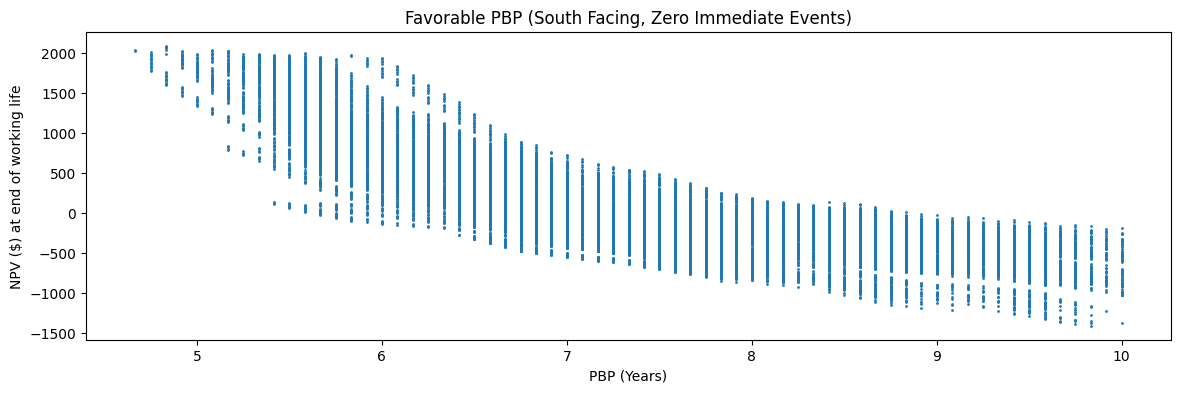

In [78]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(plot_favPBP_ZS['PBP'],plot_favPBP_ZS['NPV'], s=1)
plt.title('Favorable PBP (South Facing, Zero Immediate Events)') 
plt.xlabel('PBP (Years)') 
plt.ylabel('NPV ($) at end of working life') 
plt.show()

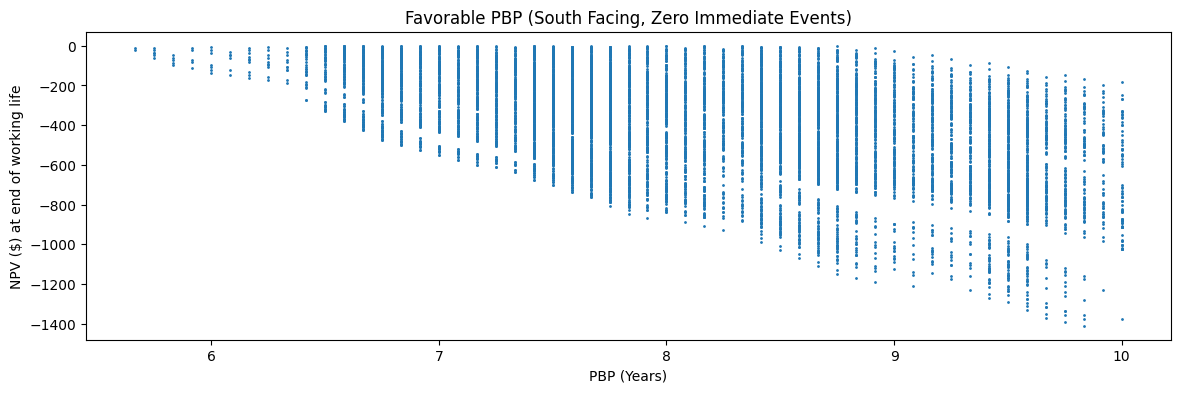

In [80]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.scatter(plot_favPBP_ZS[plot_favPBP_ZS['NPV']<= 0]['PBP'],plot_favPBP_ZS[plot_favPBP_ZS['NPV']<= 0]['NPV'], s=1)
plt.title('Favorable PBP (South Facing, Zero Immediate Events)') 
plt.xlabel('PBP (Years)') 
plt.ylabel('NPV ($) at end of working life') 
plt.show()

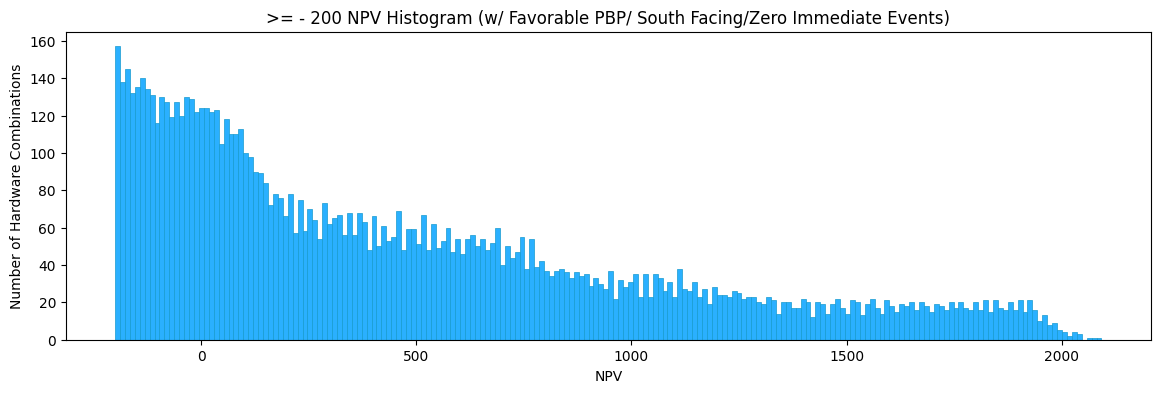

In [81]:
# Make it 14x7 inch
plt.figure(figsize=(14,4)) # Make it 14x7 inch
#plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(plot_favPBP_ZS[plot_favPBP_ZS['NPV']>=-200]['NPV'], bins=200, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('>= - 200 NPV Histogram (w/ Favorable PBP/ South Facing/Zero Immediate Events)') 
plt.xlabel('NPV') 
plt.ylabel('Number of Hardware Combinations') 
plt.show()

Text(0.5, 1.0, 'NPV')

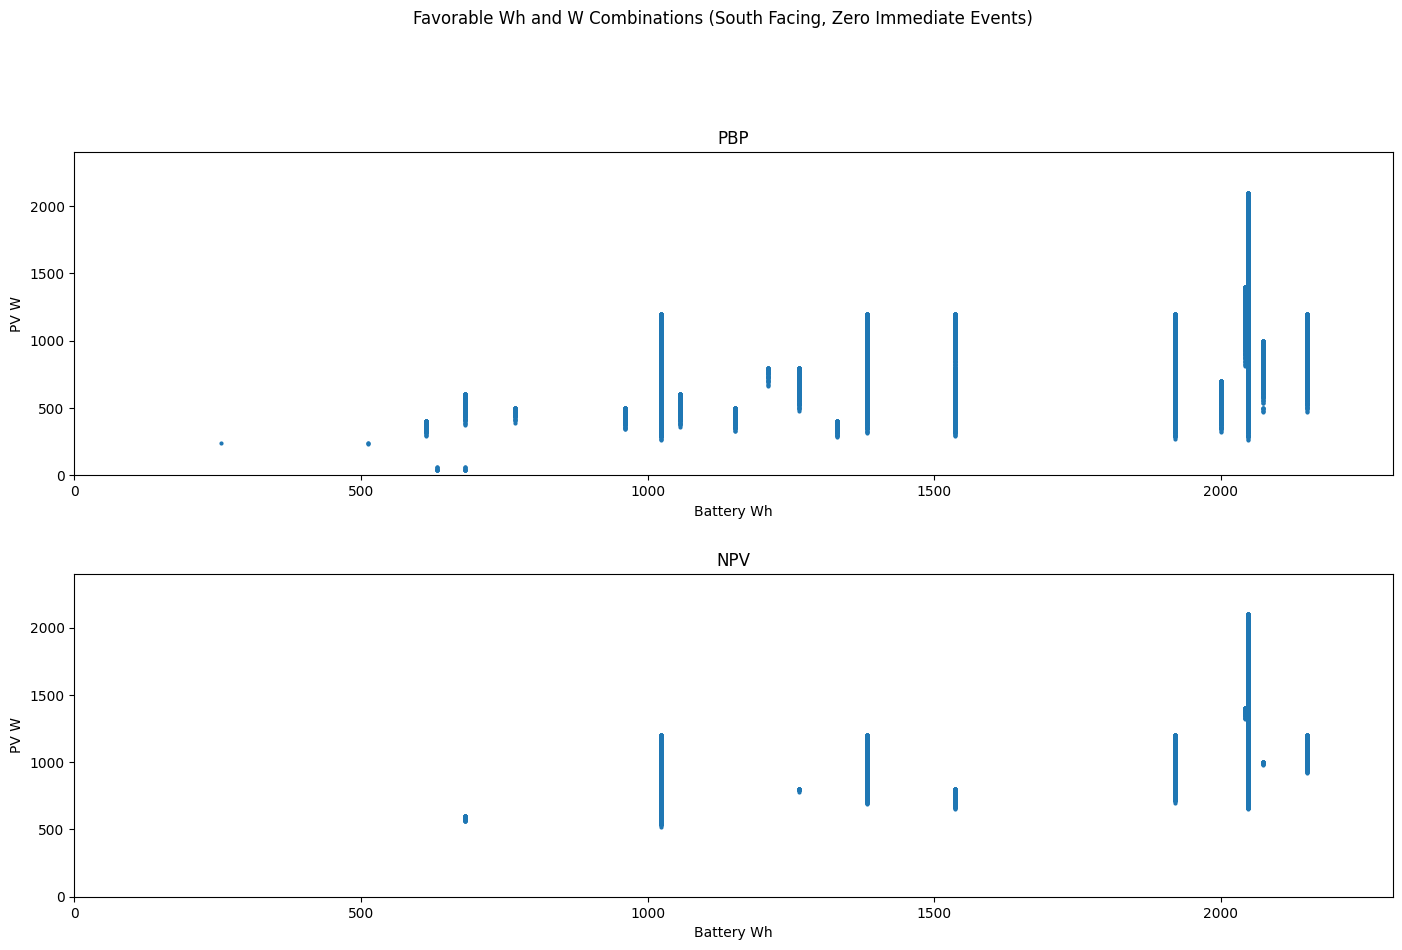

In [82]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10))#plt.figure(figsize=(15, 3), layout='constrained')
fig.suptitle("Favorable Wh and W Combinations (South Facing, Zero Immediate Events)")
fig.tight_layout(pad=5.0)
xlim = [00,2300]
ylim = [0,2400]

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.scatter(plot_favPBP_ZS['batWh'],plot_favPBP_ZS['pvW'], s=4)
ax1.set_xlabel('Battery Wh')
ax1.set_ylabel('PV W')
ax1.set_title('PBP')

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.scatter(plot_favNPV_ZS['batWh'],plot_favNPV_ZS['pvW'], s=4)
ax2.set_xlabel('Battery Wh')
ax2.set_ylabel('PV W')
ax2.set_title('NPV')


# DR Performance Comparison and Network Characteristics

C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1658801254.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


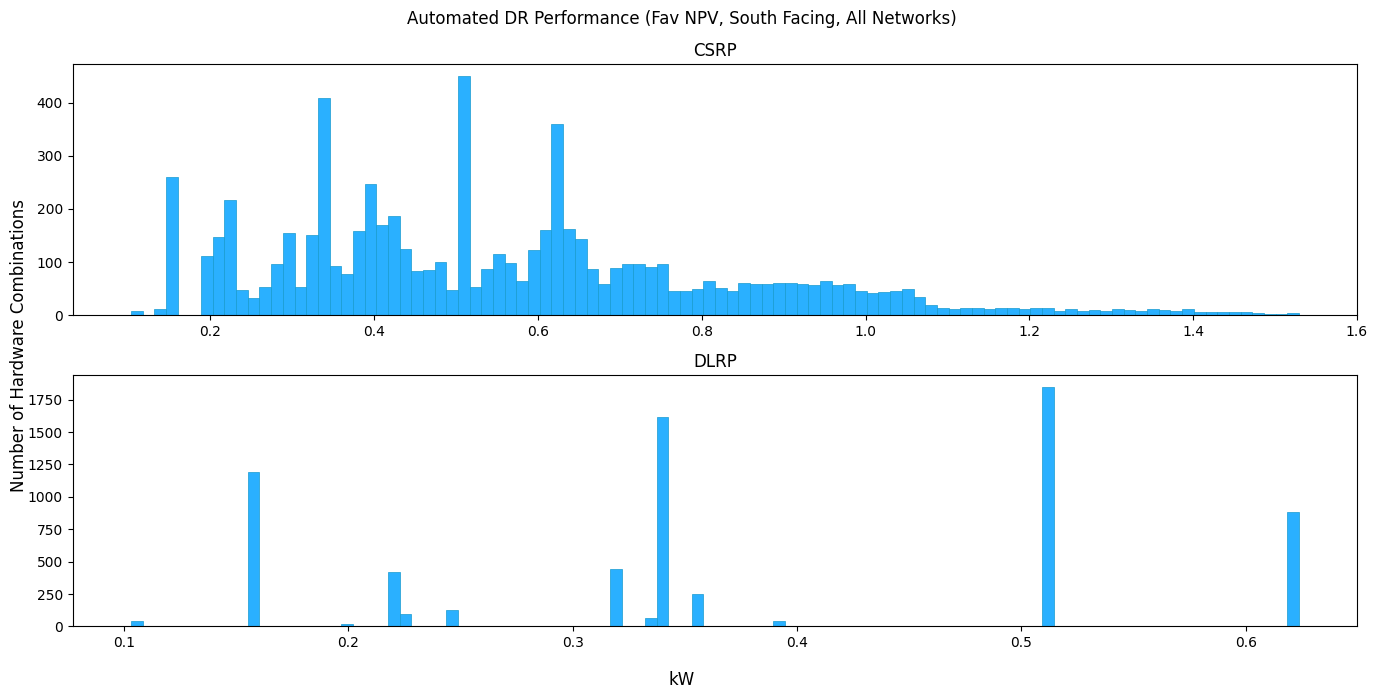

In [50]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 7))
fig.suptitle('Automated DR Performance (Fav NPV, South Facing, All Networks)') 

ax1.hist(plot_favNPV_ZS['avgMAPw_C'] *0.001, bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax1.set_title("CSRP")
ax2.hist(plot_favNPV_ZS['avgMAPw_D'] *0.001, bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax2.set_title("DLRP")

#ax1.set(xlabel='kW',ylabel="Number of Hardware Combinations")
#ax2.set(xlabel='kW',ylabel="Number of Hardware Combinations")

fig.supxlabel('kW')
fig.supylabel('Number of Hardware Combinations')

#fig.set(ylabel='Number of Hardware Combinations')

fig.subplots_adjust(bottom=0, top=1.5)

fig.tight_layout(pad=1.0)
#fig.style.use('seaborn-whitegrid') # nice and clean grid
#ax1.xlabel('Max Auto kW') 
fig.show()


<Axes: title={'center': 'Impact of Event Start Time on NPV'}, xlabel='NPV', ylabel='eventStart'>

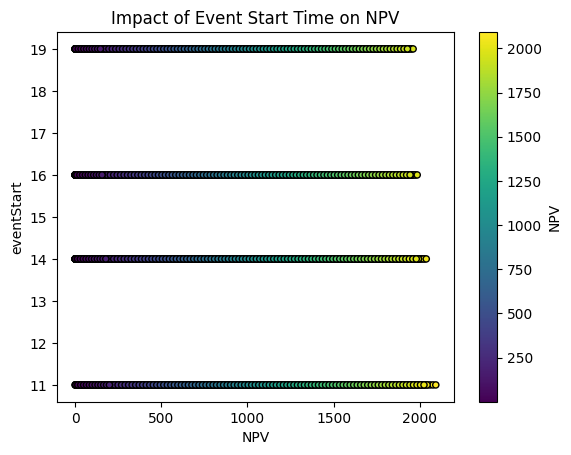

In [51]:
# event start time and NPV
plot_favNPV_ZS.plot(kind = 'scatter', x = 'NPV', y = 'eventStart', c='NPV',edgecolor='black',colormap='viridis', title='Impact of Event Start Time on NPV')


In [52]:
#build a data frame with characteristics by neighborhood

nFavorable = {
    "name":[],
    "total amount":[],
    "start time":[],
    "dr rate $":[],
    "min PV":[],
    "min PV bat Wh":[], #the battery that pairs with the min PV module
    "max PV":[],
    "max PV bat Wh":[], #the battery that pairs with the max PV module
    "min bat":[],
    "min bat PV W":[], #the PV modules that pair with the min battery
    "max bat":[],
    "max bat PV W":[], #the PV modules that pair with the max battery
    "bat models":[],
    "min capex":[],
    "max capex":[],
    #avg capex is kind of meaningless,
    #because lower call times have both cheaper and most expensive system,
    #so just a wider range of possibilities
    "avg capex":[], 
    "min PBP":[],
    "max PBP":[],
    "avg PBP":[],
    "min NPV":[],
    "max NPV":[],
    "avg NPV":[],
    "min DR":[],
    "max DR":[],
    "avg DR":[]
}
for n in myNetworks:
    tNAz = plot_favNPV_ZS[plot_favNPV_ZS['network'] == n]
    tN = tNAz#[tNAz['az'] == 180] #uncomment to filter by azimuth
    nFavorable['name'].append(n)
    
    nFavorable['start time'].append(getStartTime(n))
    nFavorable['dr rate $'].append(getTotalRate(n))
    
    if tN.shape[0] != 0:
        nFavorable['total amount'].append(tN.shape[0])
    
        #min PV
        tNminMax = tN[tN['pvW'] == min(tN['pvW'])]
        nFavorable['min PV'].append(min(tN['pvW']))
        nFavorable['min PV bat Wh'].append(list(set(tNminMax['batWh'])))

        #max PV
        tNminMax = tN[tN['pvW'] == max(tN['pvW'])]
        nFavorable['max PV'].append(max(tN['pvW']))
        nFavorable['max PV bat Wh'].append(list(set(tNminMax['batWh'])))

        #min BAT
        tNminMax = tN[tN['batWh'] == min(tN['batWh'])]
        nFavorable['min bat'].append(min(tN['batWh']))
        nFavorable['min bat PV W'].append(list(set(tNminMax['pvW'])))

        #max BAT
        tNminMax = tN[tN['batWh'] == max(tN['batWh'])]
        nFavorable['max bat'].append(max(tN['batWh']))
        nFavorable['max bat PV W'].append(list(set(tNminMax['pvW'])))

        nFavorable['bat models'].append(tN['batModel'].unique())
        
        nFavorable['min capex'].append(min(tN['capex']))
        nFavorable['max capex'].append(max(tN['capex']))
        nFavorable['avg capex'].append(tN['capex'].mean())
        
        nFavorable['min PBP'].append(min(tN['PBP']))
        nFavorable['max PBP'].append(max(tN['PBP']))
        nFavorable['avg PBP'].append(tN['PBP'].mean())

        nFavorable['min NPV'].append(min(tN['NPV']))
        nFavorable['max NPV'].append(max(tN['NPV']))
        nFavorable['avg NPV'].append(tN['NPV'].mean())

        mDR = []
        for y in range(len(tN['avgAutoParticipationAnnualW_C'])):
            #print(list(tN['avgAutoParticipationAnnualW_C']))
            yC = sum(list(tN['avgAutoParticipationAnnualW_C'])[y])
            yD = sum(list(tN['avgAutoParticipationAnnualW_D'])[y])
            mDR.append(sum([yC,yD])/len(list(tN['avgAutoParticipationAnnualW_C'])[y]))

        nFavorable['min DR'].append(min(mDR))
        nFavorable['max DR'].append(max(mDR))
        nFavorable['avg DR'].append(sum(mDR)/len(mDR))
    else:
        for k in ['total amount','min PV','min PV bat Wh','max PV','max PV bat Wh',
                  'min bat','min bat PV W','max bat','max bat PV W', 'bat models',
                  'min capex','max capex','avg capex','min PBP','max PBP',
                  'avg PBP','min NPV','max NPV','avg NPV','min DR','max DR','avg DR']:
            nFavorable[k].append(0)

networkResults_df = pd.DataFrame.from_dict(nFavorable)
display(networkResults_df)

,name,total amount,start time,dr rate $,min PV,min PV bat Wh,max PV,max PV bat Wh,min bat,min bat PV W,...,avg capex,min PBP,max PBP,avg PBP,min NPV,max NPV,avg NPV,min DR,max DR,avg DR
0,bowling green,814,11,36,520,[1024.0],2400,[3072.0],680.96,"[580, 590, 560, 600, 570]",...,2852.791851,4.666667,7.666667,5.899980,0.496020,2092.081452,678.657111,442.232855,2090.195172,1285.759546
1,long island city,792,14,36,530,[1024.0],2400,[3072.0],680.96,"[580, 590, 560, 600, 570]",...,2867.870093,5.000000,8.166667,6.181187,0.500642,2028.513663,665.188723,332.667955,1698.876385,1041.761105
2,sunnyside,775,16,36,540,[1024.0],2400,[3072.0],680.96,"[600, 570, 580, 590]",...,2875.423815,5.250000,8.500000,6.426559,0.164743,1976.051601,653.384092,244.962543,1383.021738,841.883781
3,crown heights,763,19,36,540,[1024.0],2400,[3072.0],680.96,"[600, 570, 580, 590]",...,2885.290924,5.333333,8.583333,6.534404,0.202014,1952.336741,652.147424,206.214857,1247.416941,757.489271
4,grasslands,784,14,24,540,[1024.0],2400,[3072.0],680.96,"[580, 590, 560, 600, 570]",...,2871.838245,5.333333,8.750000,6.720663,0.500642,1998.801918,660.468209,332.667955,1698.876385,1042.487185
5,fresh kills,767,16,24,540,[1024.0],2400,[3072.0],680.96,"[600, 570, 580, 590]",...,2881.704976,5.416667,8.833333,6.822794,0.164743,1956.749490,652.186808,244.962543,1383.021738,842.842080
6,williamsburg,795,14,43,530,[1024.0],2400,[3072.0],680.96,"[580, 590, 560, 600, 570]",...,2864.550210,4.833333,7.916667,6.027883,0.500642,2036.791574,666.333626,332.667955,1698.876385,1040.795169
7,northeast bronx,776,16,43,540,[1024.0],2400,[3072.0],680.96,"[600, 570, 580, 590]",...,2876.161819,5.166667,8.333333,6.257732,0.164743,1984.329512,656.213981,244.962543,1383.021738,842.231857
8,ridgewood,769,19,43,540,[1024.0],2400,[3072.0],680.96,"[600, 570, 580, 590]",...,2880.313921,5.250000,8.500000,6.360533,0.202014,1960.614652,650.723750,206.214857,1247.416941,756.803525


In [57]:
favPBP_df_Z.columns

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'LCOSS', 'NPV',
       'PBP', 'Cycles', 'lifespan', 'workingLife'],
      dtype='object')

C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\171508355.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\171508355.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\171508355.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


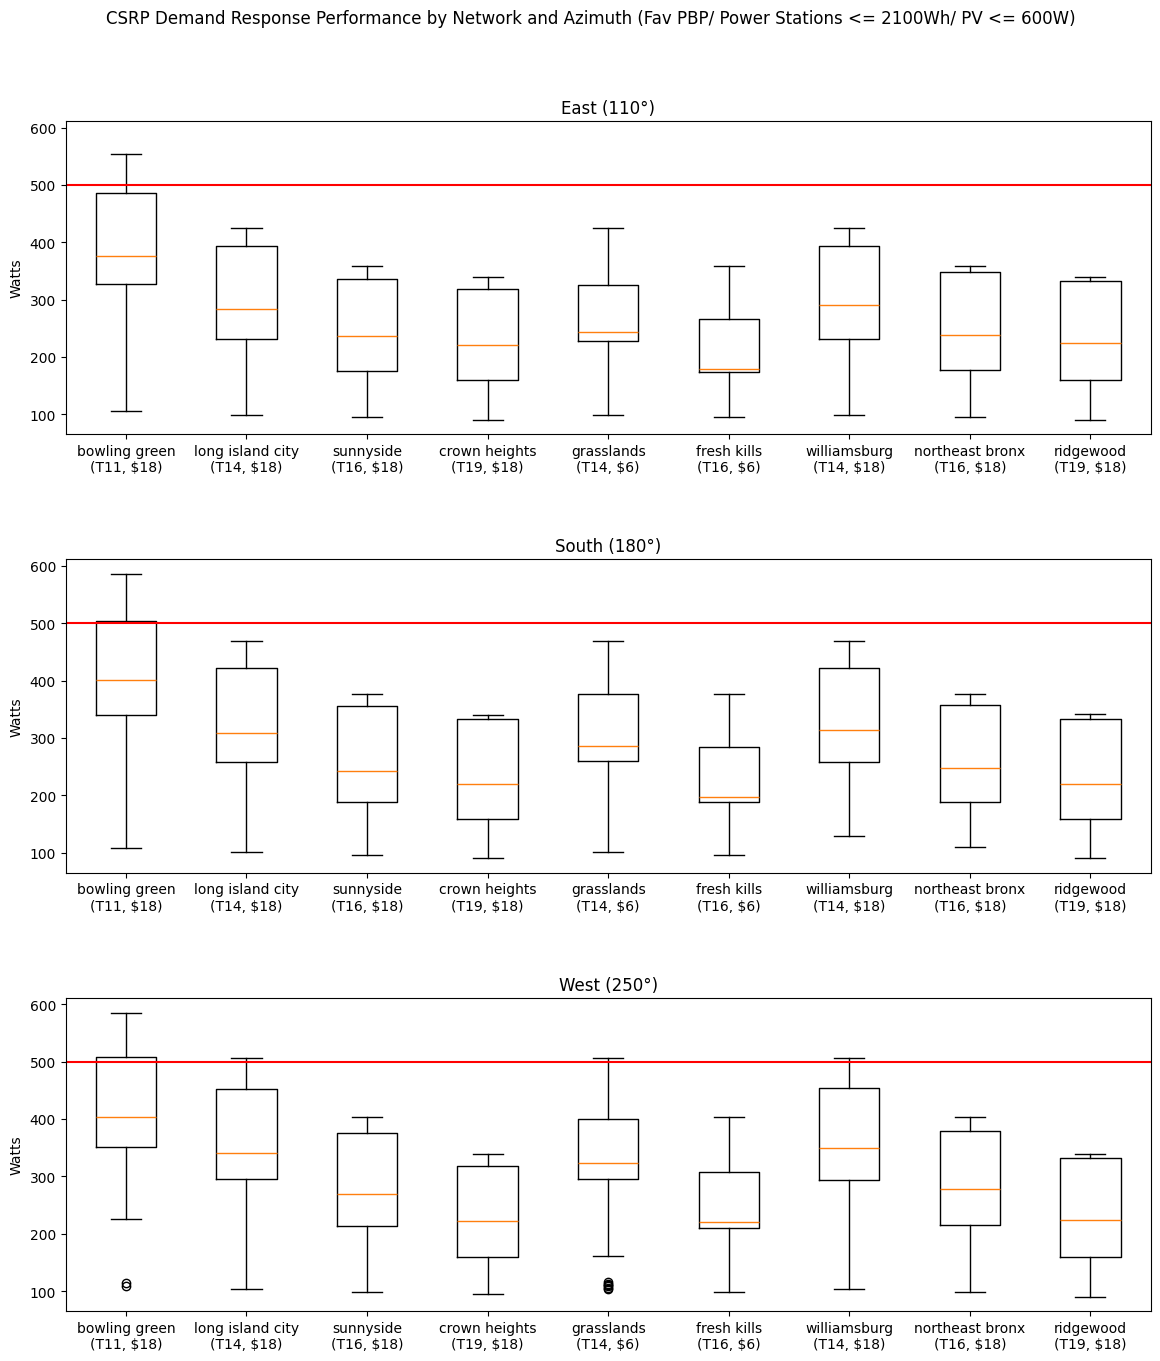

In [83]:
#box plot for DR, ROI, IAP... is there a way to represent a box plot for multidimension data? i.e pairs of PV and Bat specs? 

plot_smallSystems = favPBP_df_Z[favPBP_df_Z['batWh']<= 2100]
plot_smallSystems = plot_smallSystems[plot_smallSystems['pvW'] <=600]

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = plot_smallSystems[plot_smallSystems['az'] == 180][plot_smallSystems[plot_smallSystems['az'] == 180]['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getCSRPrate(n)) +")")

for a in range(3):
    bPD = plot_smallSystems[plot_smallSystems['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['avgMAPw_C']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Watts') 
    axs[a].axhline(500, c='r')

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('CSRP Demand Response Performance by Network and Azimuth (Fav PBP/ Power Stations <= 2100Wh/ PV <= 600W)')
    
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1536615722.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1536615722.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1536615722.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


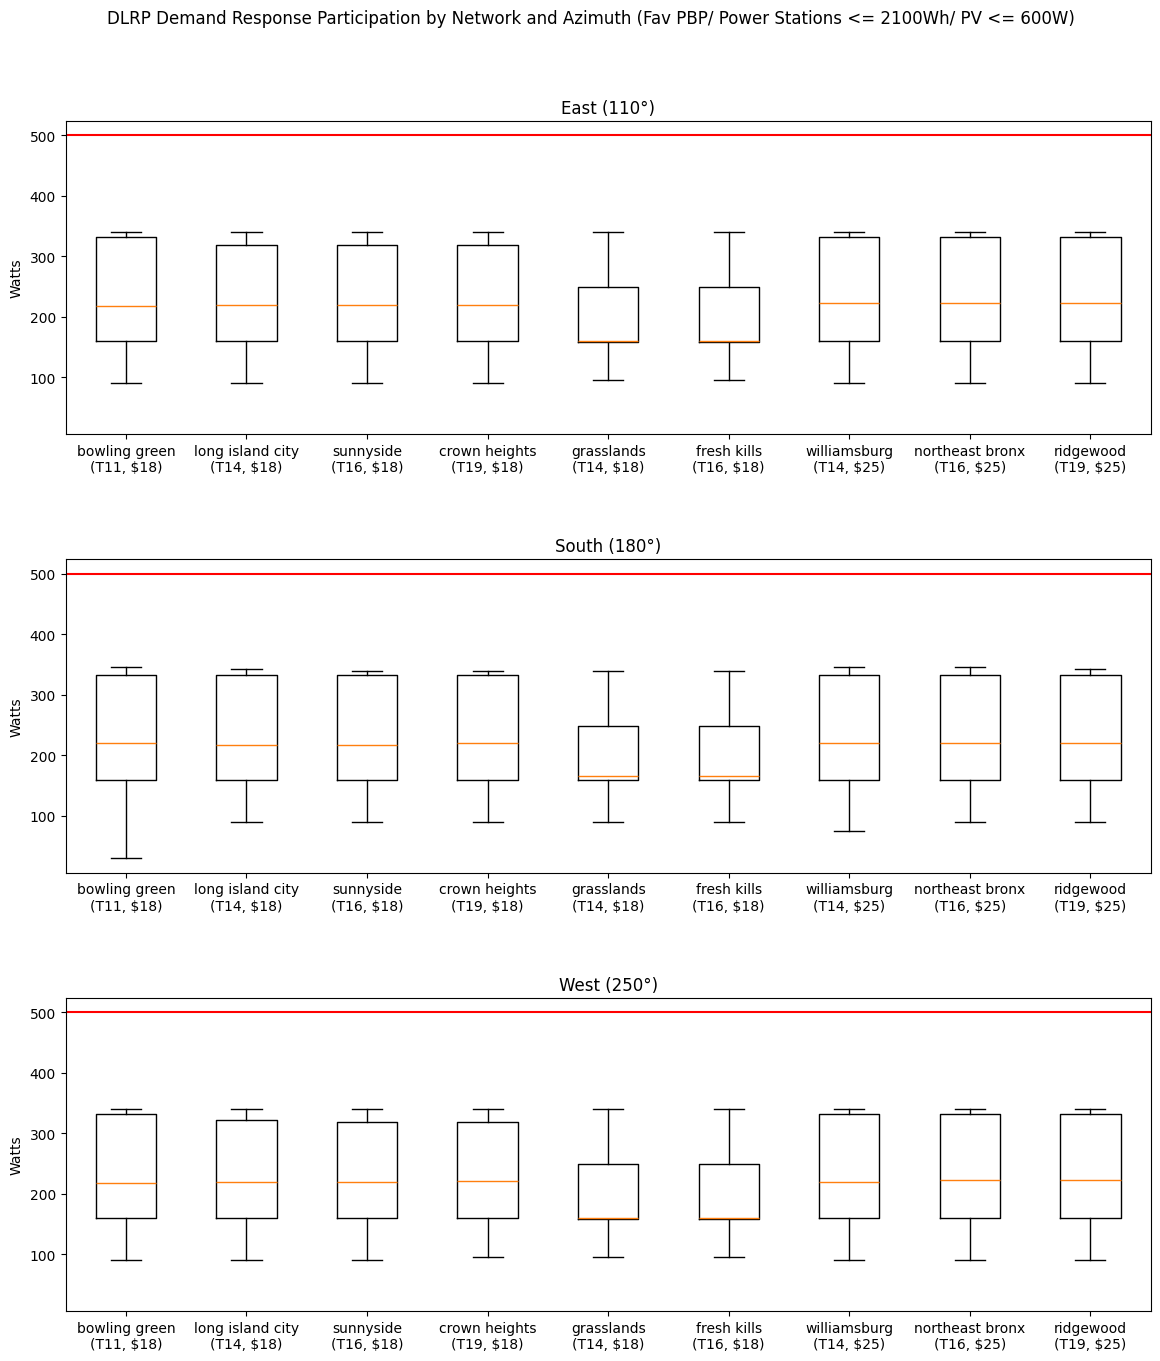

In [84]:
#box plot for DR, ROI, IAP... is there a way to represent a box plot for multidimension data? i.e pairs of PV and Bat specs? 

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = plot_smallSystems[plot_smallSystems['az'] == 180][plot_smallSystems[plot_smallSystems['az'] == 180]['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getDLRPrate(n)) +")")

for a in range(3):
    bPD = plot_smallSystems[plot_smallSystems['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['avgMAPw_D']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Watts') 
    axs[a].axhline(500, c='r')

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('DLRP Demand Response Participation by Network and Azimuth (Fav PBP/ Power Stations <= 2100Wh/ PV <= 600W)')
    
plt.show()


## At what sized does DR Performance hit ~500W with favorable PBP?

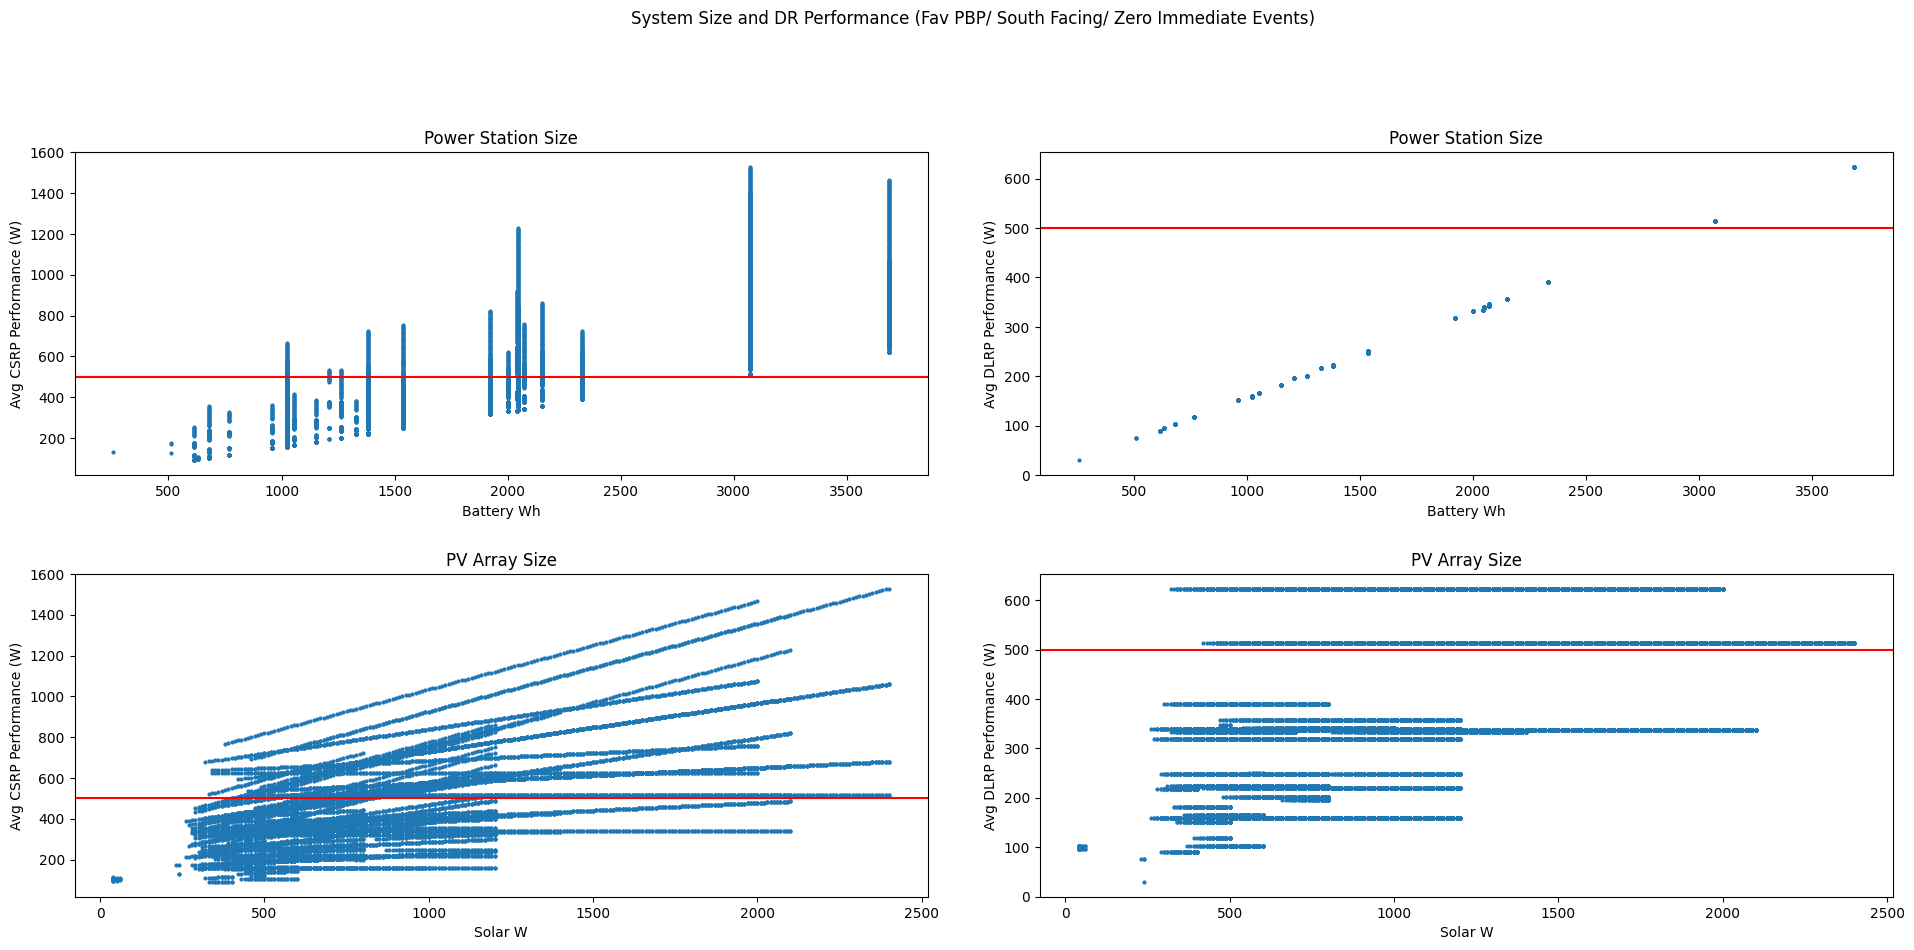

In [94]:
# plot every system with favorable PBP

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20, 10))#plt.figure(figsize=(15, 3), layout='constrained')
fig.suptitle("System Size and DR Performance (Fav PBP/ South Facing/ Zero Immediate Events)")
fig.tight_layout(pad=5.0)
# xlim = [00,2300]
# ylim = [0,2400]

# ax1.set_xlim(xlim)
# ax1.set_ylim(ylim)
ax1.scatter(plot_favPBP_ZS['batWh'],plot_favPBP_ZS['avgMAPw_C'], s=4)
ax1.set_xlabel('Battery Wh')
ax1.set_ylabel('Avg CSRP Performance (W)')
ax1.set_title('Power Station Size')
ax1.axhline(500, c='r')

# ax2.set_xlim(xlim)
# ax2.set_ylim(ylim)
ax2.scatter(plot_favPBP_ZS['batWh'],plot_favPBP_ZS['avgMAPw_D'], s=4)
ax2.set_xlabel('Battery Wh')
ax2.set_ylabel('Avg DLRP Performance (W)')
ax2.set_title('Power Station Size')
ax2.axhline(500, c='r')

# ax3.set_xlim(xlim)
# ax3.set_ylim(ylim)
ax3.scatter(plot_favPBP_ZS['pvW'],plot_favPBP_ZS['avgMAPw_C'], s=4)
ax3.set_xlabel('Solar W')
ax3.set_ylabel('Avg CSRP Performance (W)')
ax3.set_title('PV Array Size')
ax3.axhline(500, c='r')

# ax4.set_xlim(xlim)
# ax4.set_ylim(ylim)
ax4.scatter(plot_favPBP_ZS['pvW'],plot_favPBP_ZS['avgMAPw_D'], s=4)
ax4.set_xlabel('Solar W')
ax4.set_ylabel('Avg DLRP Performance (W)')
ax4.set_title('PV Array Size')
ax4.axhline(500, c='r')

C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1292019726.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1292019726.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1292019726.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


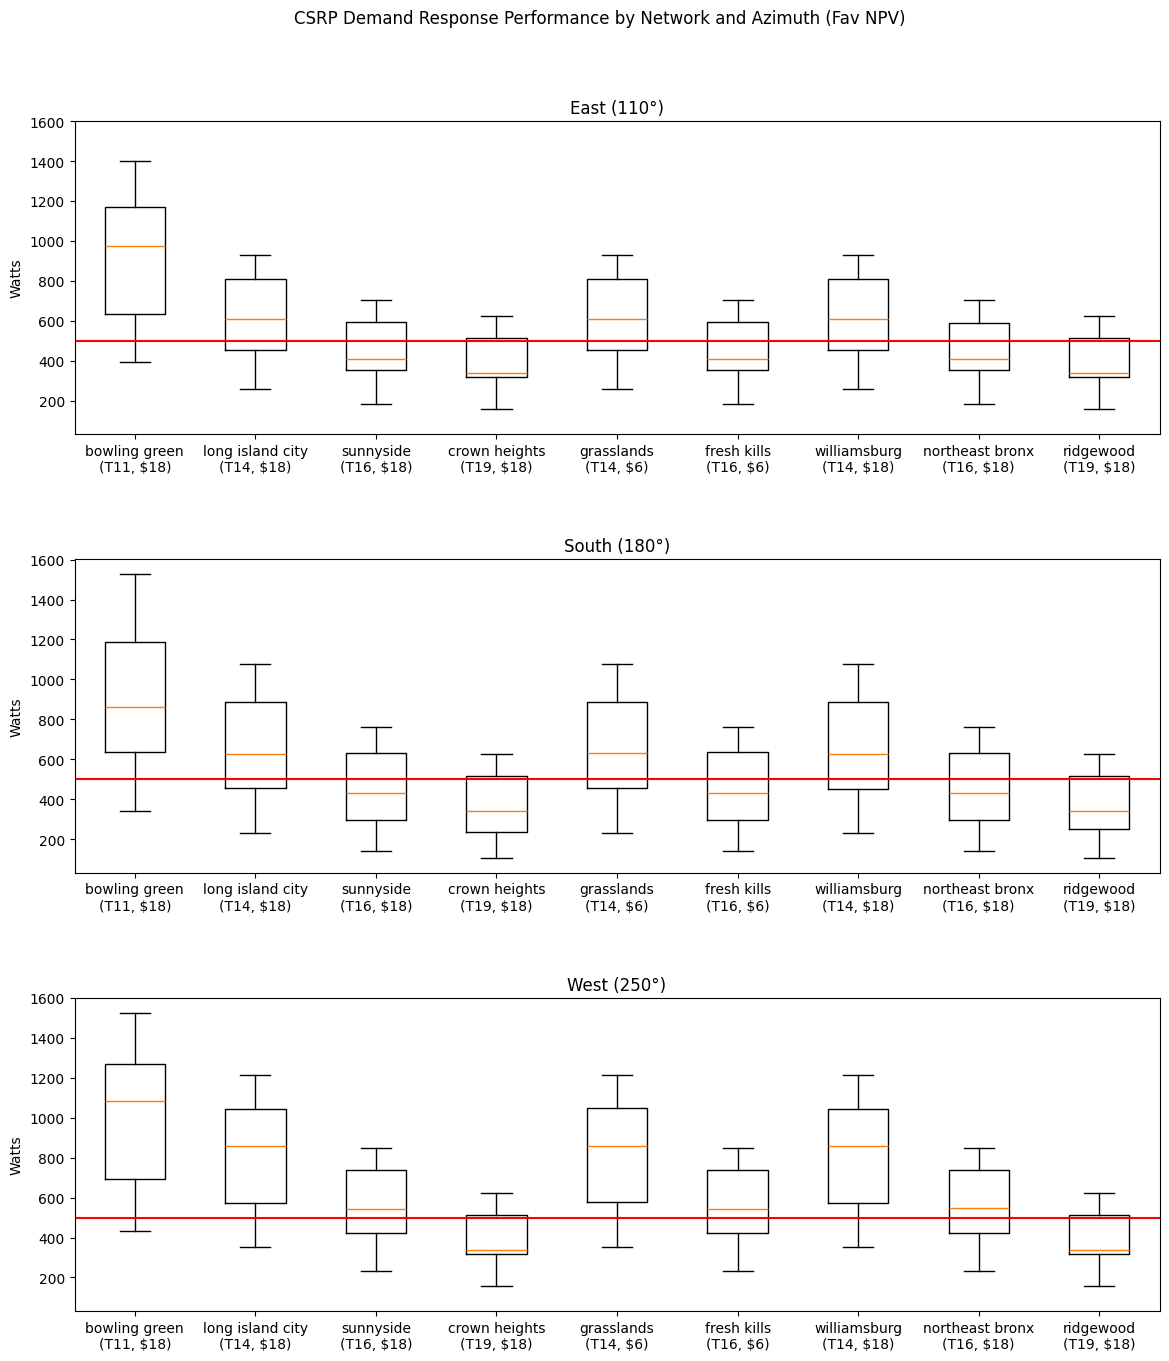

In [86]:
#box plot for DR, ROI, IAP... is there a way to represent a box plot for multidimension data? i.e pairs of PV and Bat specs? 

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favNPV_df_Z[favNPV_df_Z['az'] == 180][favNPV_df_Z[favNPV_df_Z['az'] == 180]['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getCSRPrate(n)) +")")

for a in range(3):
    bPD = favNPV_df_Z[favNPV_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['avgMAPw_C']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Watts') 
    axs[a].axhline(500, c='r')

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('CSRP Demand Response Performance by Network and Azimuth (Fav NPV)')
    
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\2013863471.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\2013863471.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\2013863471.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


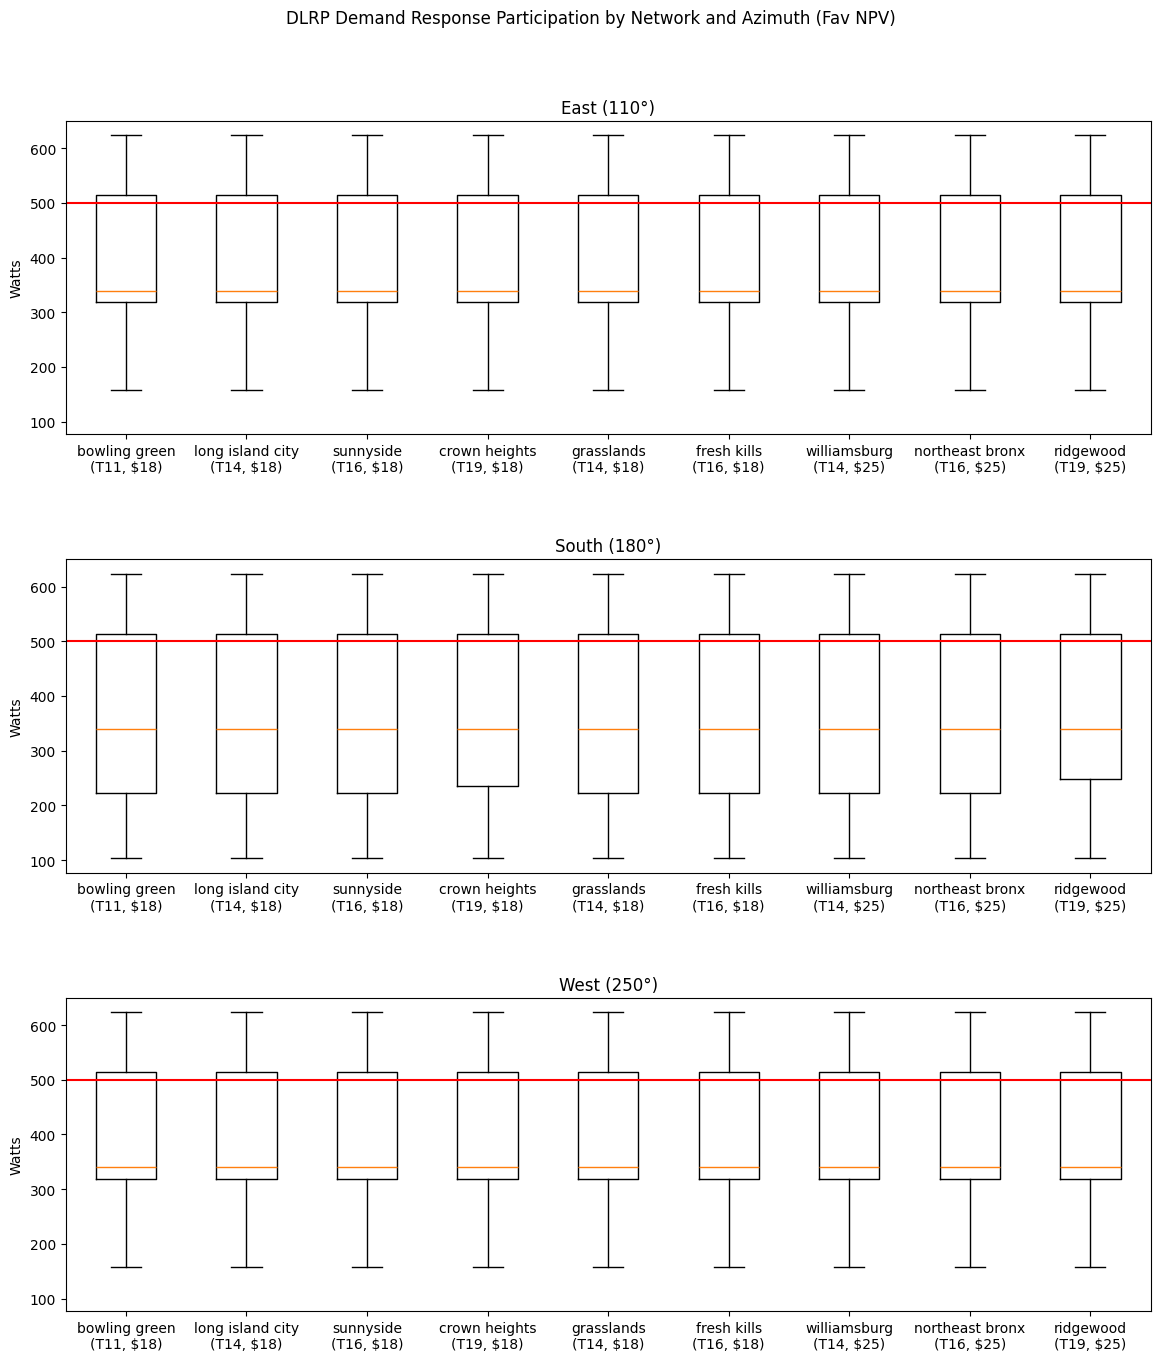

In [87]:
#box plot for DR, ROI, IAP... is there a way to represent a box plot for multidimension data? i.e pairs of PV and Bat specs? 

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favNPV_df_Z[favNPV_df_Z['az'] == 180][favNPV_df_Z[favNPV_df_Z['az'] == 180]['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getDLRPrate(n)) +")")

for a in range(3):
    bPD = favNPV_df_Z[favNPV_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['avgMAPw_D']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Watts') 
    axs[a].axhline(500, c='r')

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('DLRP Demand Response Participation by Network and Azimuth (Fav NPV)')
    
plt.show()


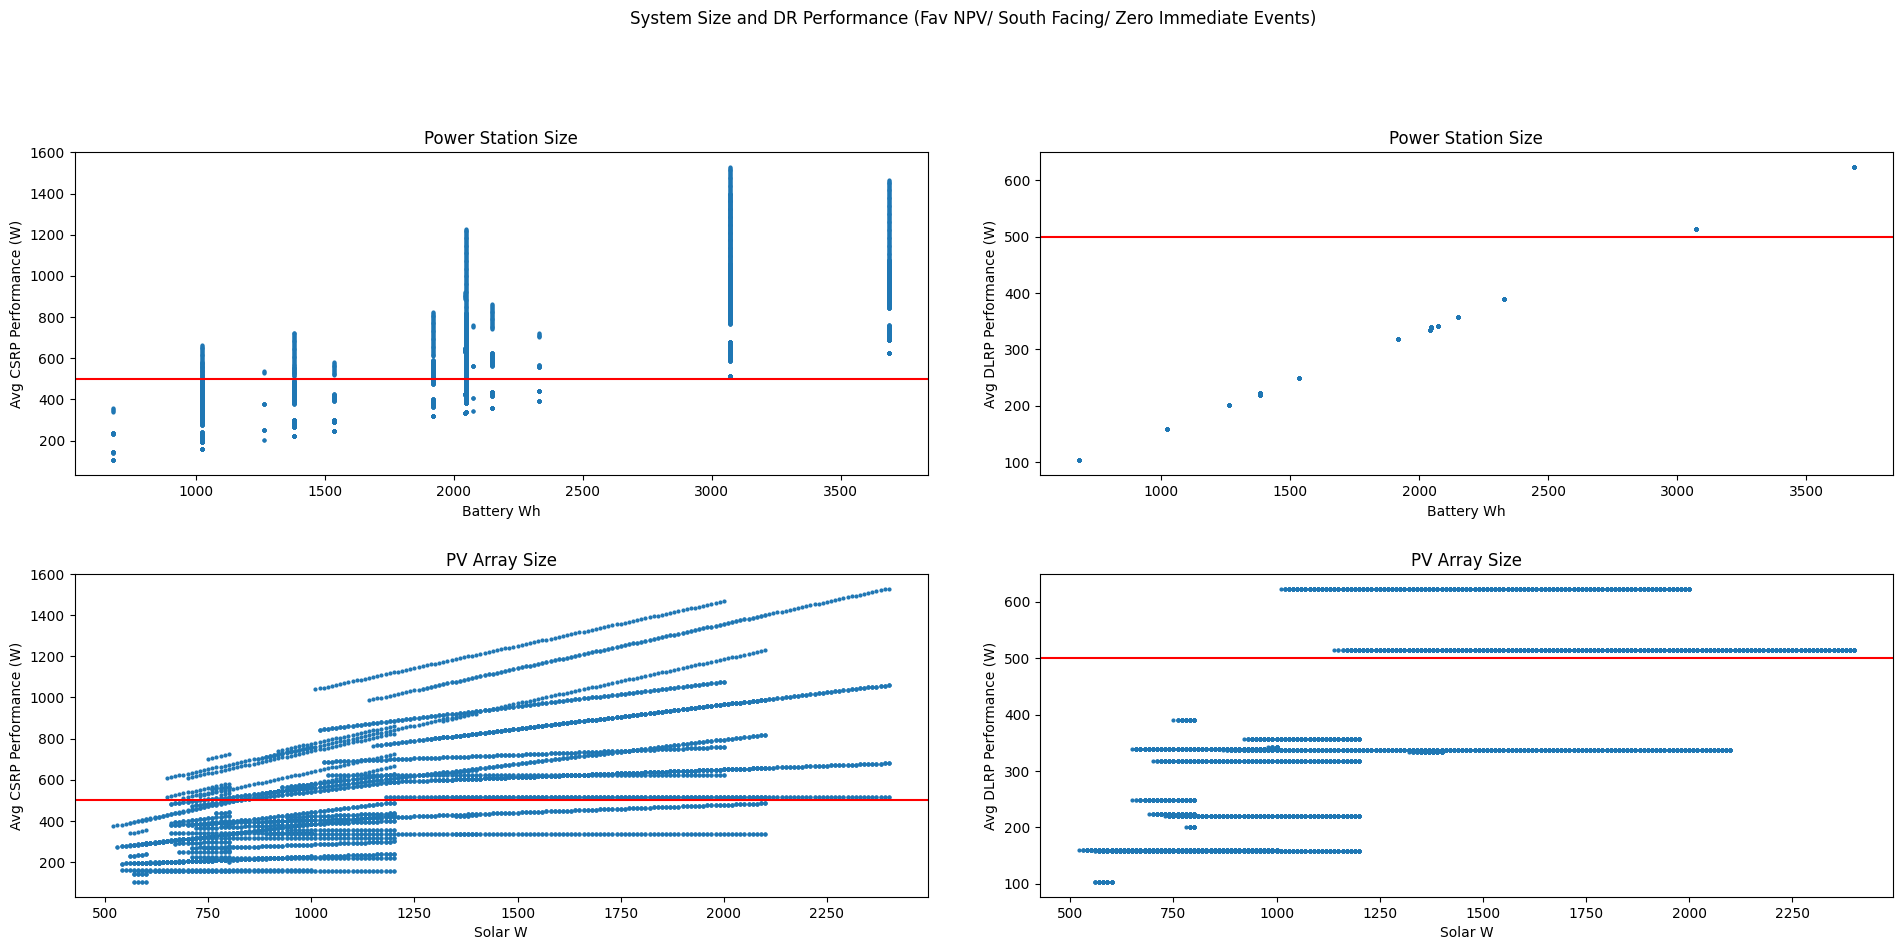

In [89]:
# plot every system with favorable PBP

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20, 10))#plt.figure(figsize=(15, 3), layout='constrained')
fig.suptitle("System Size and DR Performance (Fav NPV/ South Facing/ Zero Immediate Events)")
fig.tight_layout(pad=5.0)
# xlim = [00,2300]
# ylim = [0,2400]

# ax1.set_xlim(xlim)
# ax1.set_ylim(ylim)
ax1.scatter(plot_favNPV_ZS['batWh'],plot_favNPV_ZS['avgMAPw_C'], s=4)
ax1.set_xlabel('Battery Wh')
ax1.set_ylabel('Avg CSRP Performance (W)')
ax1.set_title('Power Station Size')
ax1.axhline(500, c='r')

# ax2.set_xlim(xlim)
# ax2.set_ylim(ylim)
ax2.scatter(plot_favNPV_ZS['batWh'],plot_favNPV_ZS['avgMAPw_D'], s=4)
ax2.set_xlabel('Battery Wh')
ax2.set_ylabel('Avg DLRP Performance (W)')
ax2.set_title('Power Station Size')
ax2.axhline(500, c='r')

# ax3.set_xlim(xlim)
# ax3.set_ylim(ylim)
ax3.scatter(plot_favNPV_ZS['pvW'],plot_favNPV_ZS['avgMAPw_C'], s=4)
ax3.set_xlabel('Solar W')
ax3.set_ylabel('Avg CSRP Performance (W)')
ax3.set_title('PV Array Size')
ax3.axhline(500, c='r')

# ax4.set_xlim(xlim)
# ax4.set_ylim(ylim)
ax4.scatter(plot_favNPV_ZS['pvW'],plot_favNPV_ZS['avgMAPw_D'], s=4)
ax4.set_xlabel('Solar W')
ax4.set_ylabel('Avg DLRP Performance (W)')
ax4.set_title('PV Array Size')
ax4.axhline(500, c='r')

# Load Alignment

How do the systems that result from the model match the static loads?

In [97]:
plot_favNPV_ZS['dailyPVWAC_4M'].iloc[0]

[np.float64(-176.1702549085779),
 np.float64(2952.8206705018215),
 np.float64(1462.7793222883668),
 np.float64(1529.696974854132)]

In [110]:
#min, max, mean, median
#favPBP_df_Z['dailyPVWAC_4M']

#daily fridge Wh
loadReqMin = 300 * .33 * 24 # small fridge
loadReqMax = 800 * .33 * 24#large fridge

maxPVWAC_NPV = []
maxPVWAC_PBP = []

for m in range(plot_favNPV_ZS.shape[0]):
    maxPVWAC_NPV.append(plot_favNPV_ZS['dailyPVWAC_4M'].iloc[m][1])
for m in range(plot_favPBP_ZS.shape[0]):
    maxPVWAC_PBP.append(plot_favPBP_ZS['dailyPVWAC_4M'].iloc[m][1])

plot_favNPV_ZS['dailyPVWAC_4M_MAX'] = maxPVWAC_NPV
plot_favPBP_ZS['dailyPVWAC_4M_MAX'] = maxPVWAC_PBP

print("percentage of NPV systems with max PV production under fridge threshold: " + str(plot_favNPV_ZS[plot_favNPV_ZS['dailyPVWAC_4M_MAX']<=loadReqMin].shape[0]/plot_favNPV_ZS.shape[0]))
print("percentage of PBP systems with max PV production under fridge threshold: " + str(plot_favPBP_ZS[plot_favPBP_ZS['dailyPVWAC_4M_MAX']<=loadReqMin].shape[0]/plot_favPBP_ZS.shape[0]))

#favPBP_df_Z[favPBP_df_Z['dailyPVWAC_4M_MAX']>2400]

percentage of NPV systems with max PV production under fridge threshold: 0.0
percentage of PBP systems with max PV production under fridge threshold: 0.09446823912650057


C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1777117787.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_favNPV_ZS['dailyPVWAC_4M_MAX'] = maxPVWAC_NPV
C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\1777117787.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_favPBP_ZS['dailyPVWAC_4M_MAX'] = maxPVWAC_PBP


C:\Users\Alex\AppData\Local\Temp\ipykernel_17680\278259691.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


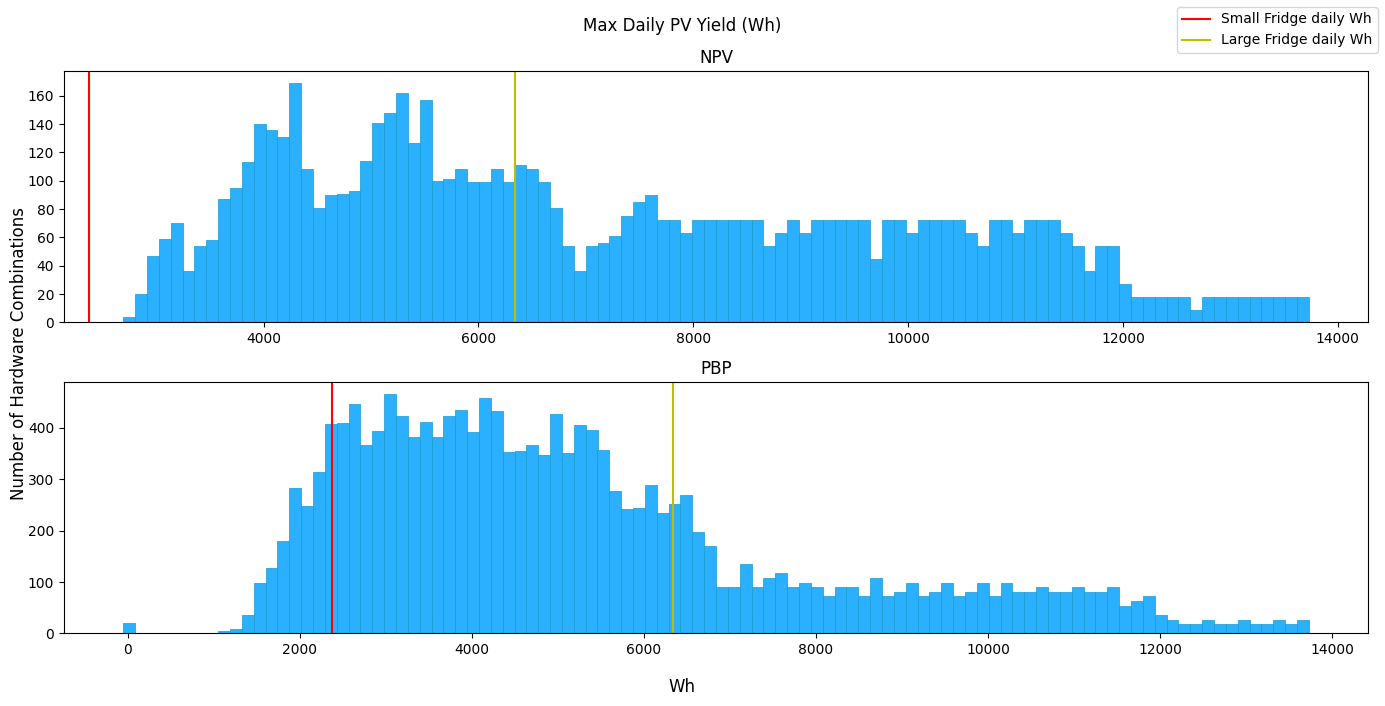

In [114]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 7))
fig.suptitle('Max Daily PV Yield (Wh)') 

ax1.hist(plot_favNPV_ZS['dailyPVWAC_4M_MAX'], bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax1.set_title("NPV")
ax2.hist(plot_favPBP_ZS['dailyPVWAC_4M_MAX'] , bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
ax2.set_title("PBP")

ax1.axvline(loadReqMin, c='r')
ax2.axvline(loadReqMin, c='r')
ax1.axvline(loadReqMax, c='y')
ax2.axvline(loadReqMax, c='y')
#ax1.set(xlabel='kW',ylabel="Number of Hardware Combinations")
#ax2.set(xlabel='kW',ylabel="Number of Hardware Combinations")

fig.supxlabel('Wh')
fig.supylabel('Number of Hardware Combinations')

#fig.set(ylabel='Number of Hardware Combinations')

fig.subplots_adjust(bottom=0, top=1.5)

fig.tight_layout(pad=1.0)

fig.legend(['Small Fridge daily Wh', 'Large Fridge daily Wh'])

fig.show()


# Analysis - BELOW THIS POINT IS OUT DATED

To analize:
* impact of network characteristics
* time and overall quantity
* relationship between azimuth and time

In [86]:
#levelized cost compaprison
#https://www.statista.com/statistics/493797/estimated-levelized-cost-of-energy-generation-in-the-us-by-technology/
#2023 commercial solar + store lcoe: $46-102/ per megawatts

In [68]:
noCurtailment_df = favPBP_df_Z[favPBP_df_Z['dailyPVWAC_4M_MAX']<=2400]

snapShot(noCurtailment_df)

Amount of systems: 928

Min Lifespan: 8.219178082191782
Mean Lifespan: 9.693847425602268
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 8.219178082191782
Mean working life: 9.411608408124705
Median working life: 9.58904109589041
Max working life: 10.0

Fastest PBP: 6.666666666666667yrs
Mean PBP: 8.781519396551724
Median PBP: 8.833333333333334
Slowest PBP: 10.0yrs



KeyError: 'incomeAfterPBP'

## Impact of Network Characteristics

In [95]:
#which power station models are viable?
listModels = []

for n in range(networkResults_df.shape[0]):
    listModels.extend(list(networkResults_df.iloc[n]['bat models']))
    
setModels = set(listModels)
print(len(setModels))

modelCount = {}
for m in setModels:
    modelCount[m]= listModels.count(m)
    
display(modelCount)

TypeError: 'int' object is not iterable

In [96]:
modelCount.keys()

NameError: name 'modelCount' is not defined

C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3236279103.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3236279103.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\3236279103.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


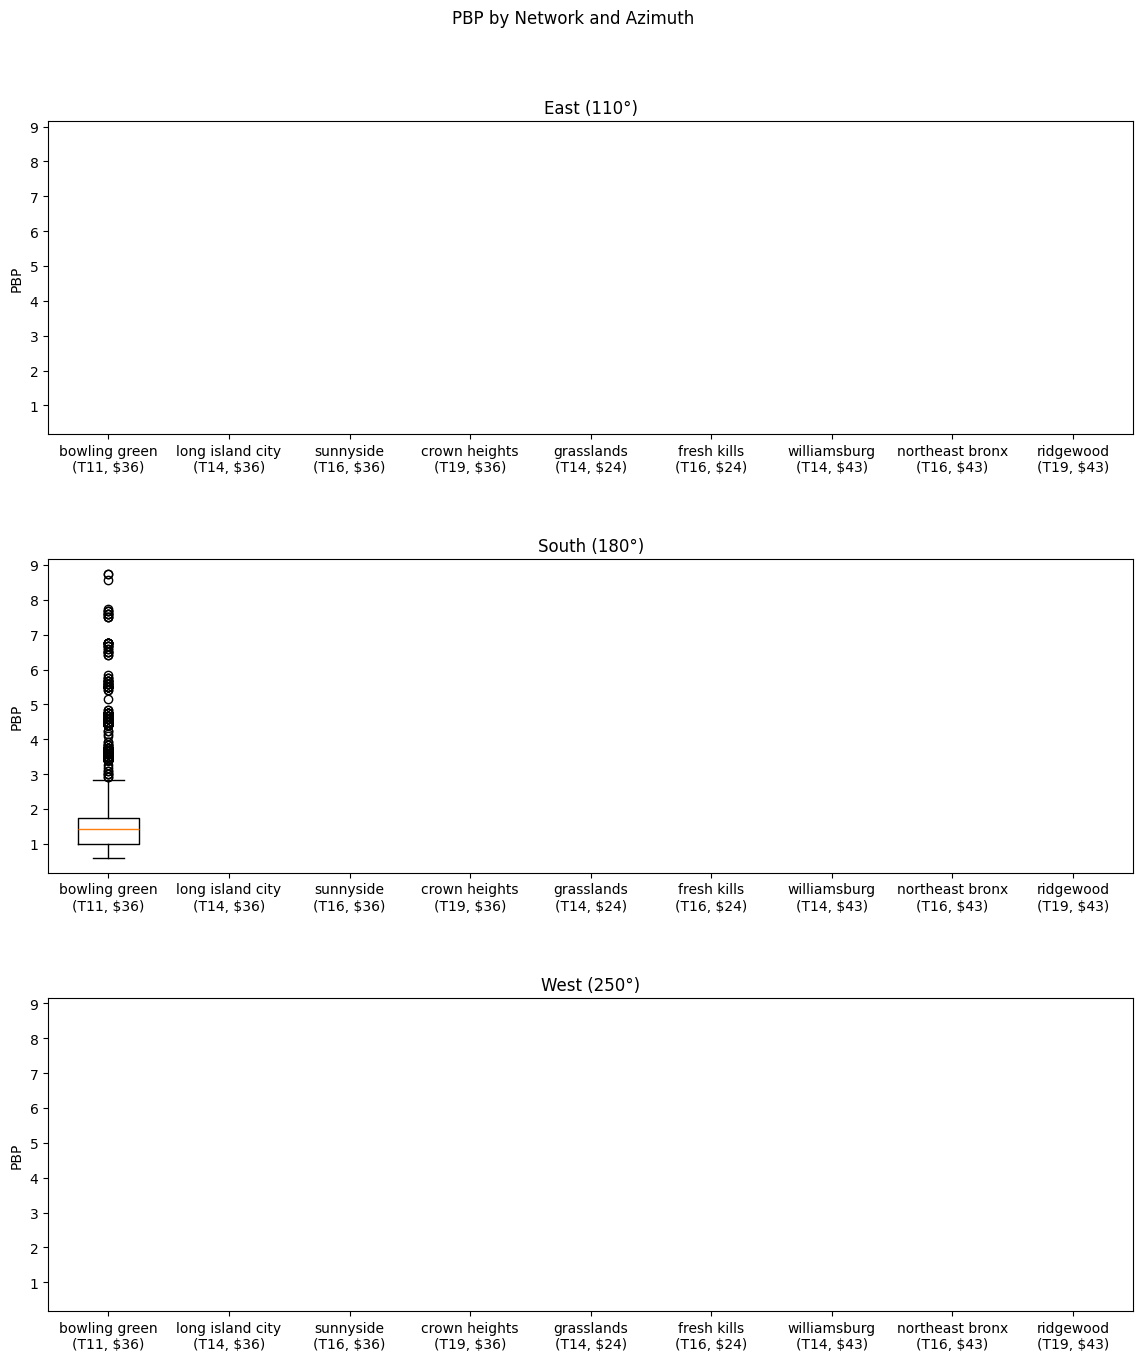

In [99]:
#box plot for ROI

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['realPayback']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('PBP') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('PBP by Network and Azimuth')
    
plt.show()


KeyError: 'incomeAfterRoi'

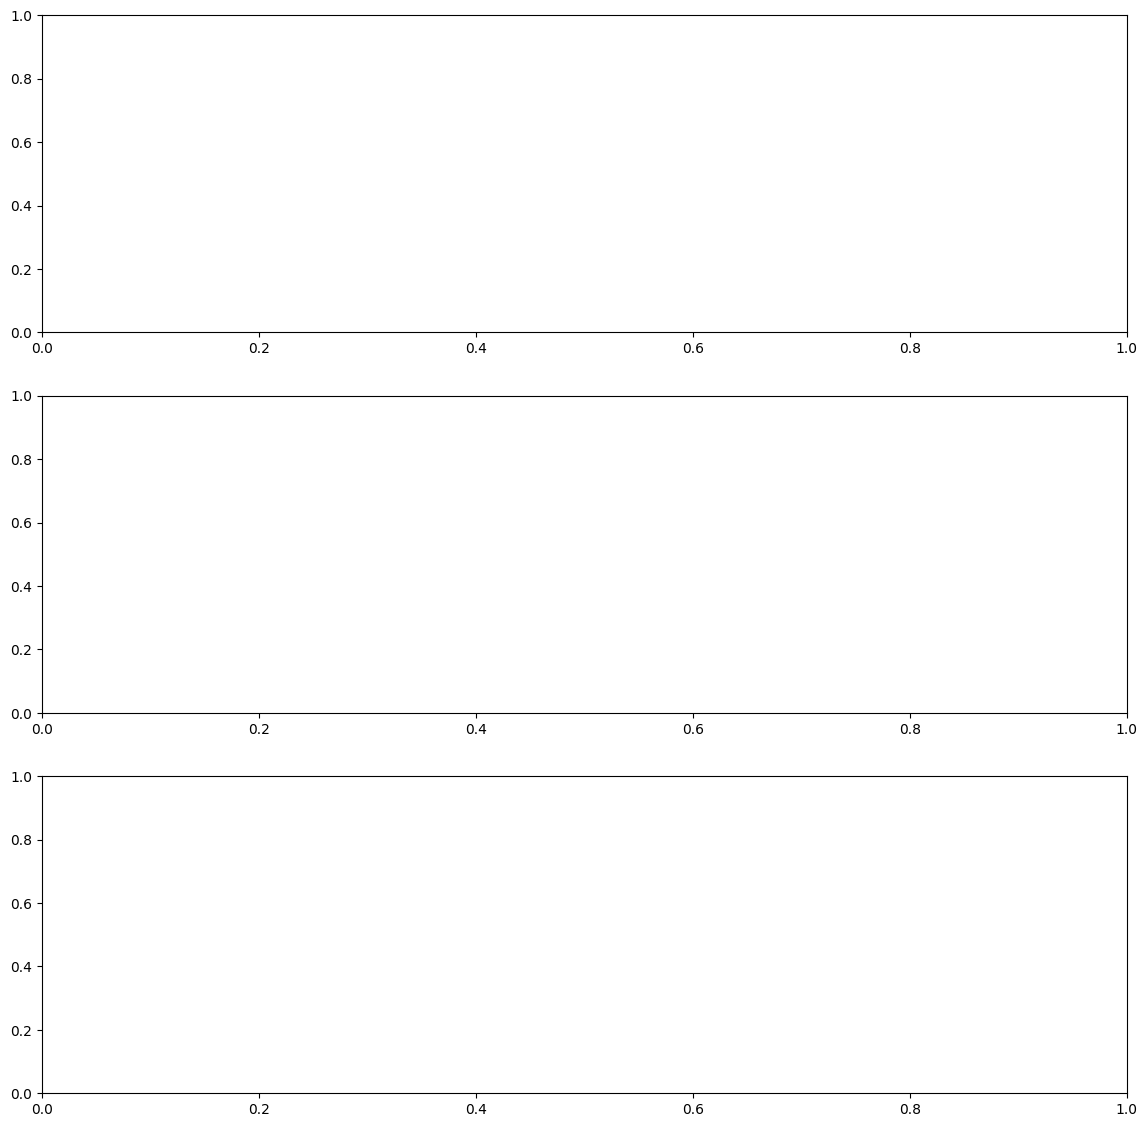

In [100]:
#box plot for IAP

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['incomeAfterRoi']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('IAP') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('IAP by Network and Azimuth')
    
plt.show()


C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\540729411.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\540729411.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\540729411.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


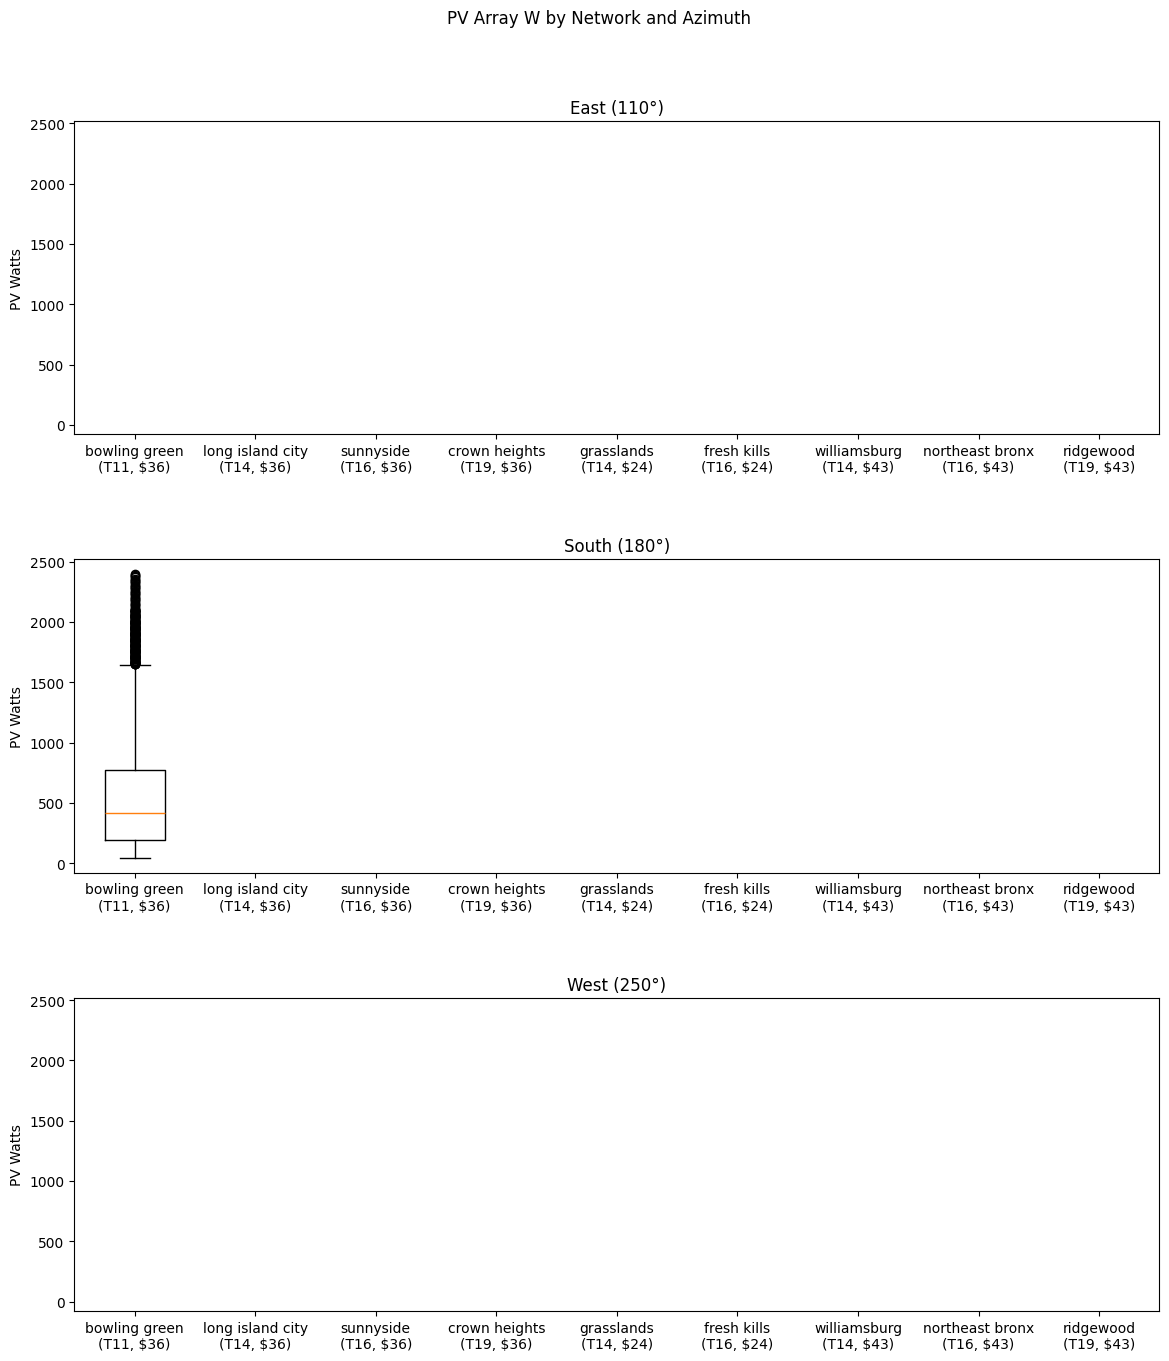

In [101]:
#box plot for IAP

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['pvW']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('PV Watts') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('PV Array W by Network and Azimuth')
    
plt.show()

C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1737051895.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1737051895.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)
C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\1737051895.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[a].boxplot(boxPlotData, labels=myLabels)


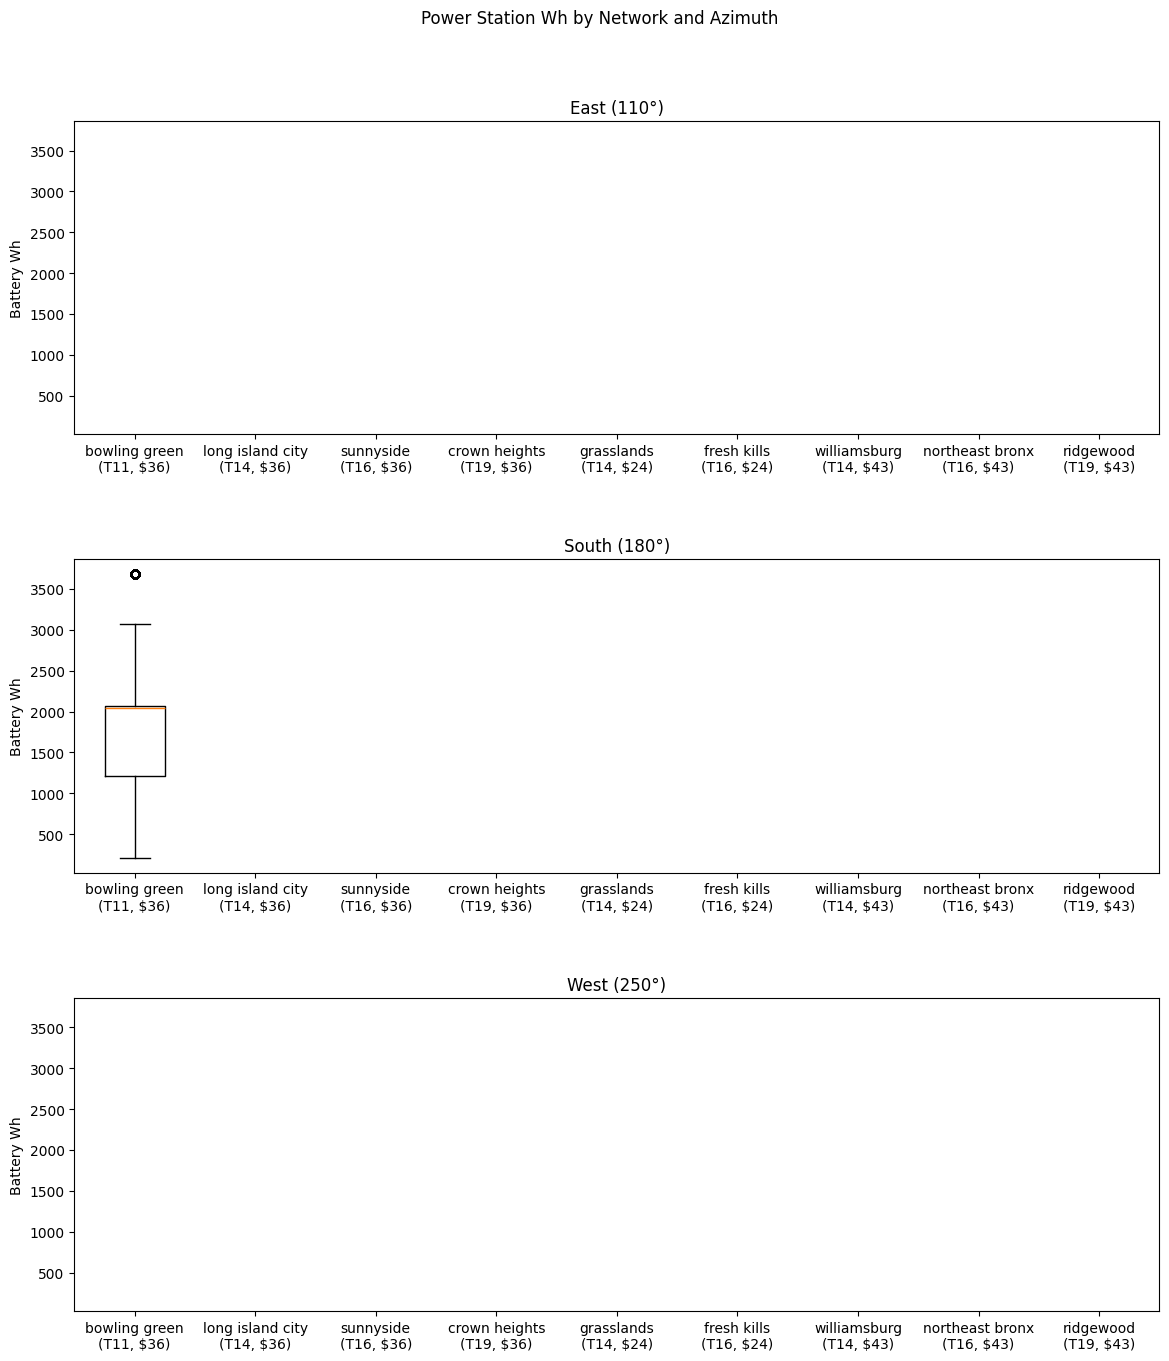

In [102]:
#box plot for IAP

fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

azi = [110,180,250]
subTitles =['East','South','West']

#get labels using south facing facade because there are no non-data networks
myLabels=[]
for n in myNetworks:
    mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
    myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for a in range(3):
    bPD = favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]
    
    boxPlotData = []
    for n in myNetworks:
        bP = bPD[bPD['network'] == n]
        boxPlotData.append(list(bP['batWh']))

    axs[a].boxplot(boxPlotData, labels=myLabels)
    axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
    axs[a].set_ylabel('Battery Wh') 

fig.subplots_adjust(bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
fig.suptitle('Power Station Wh by Network and Azimuth')
    
plt.show()

<Axes: title={'center': 'Auto Participation CSRP'}, xlabel='avgMAPw_C', ylabel='eventStart'>

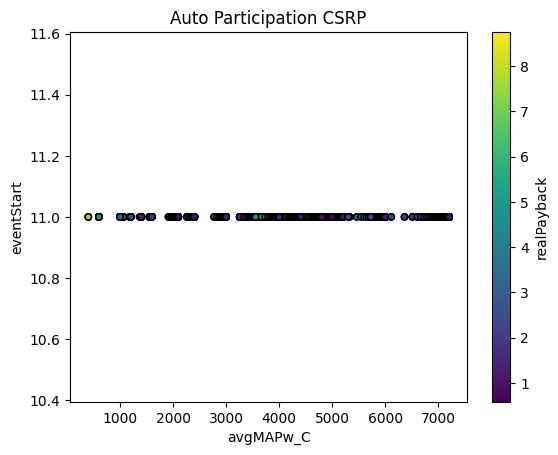

In [103]:
favPBP_df_Z.plot(kind = 'scatter', x = 'avgMAPw_C', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='Auto Participation CSRP')


<Axes: title={'center': 'Auto Participation DLRP'}, xlabel='avgMAPw_D', ylabel='eventStart'>

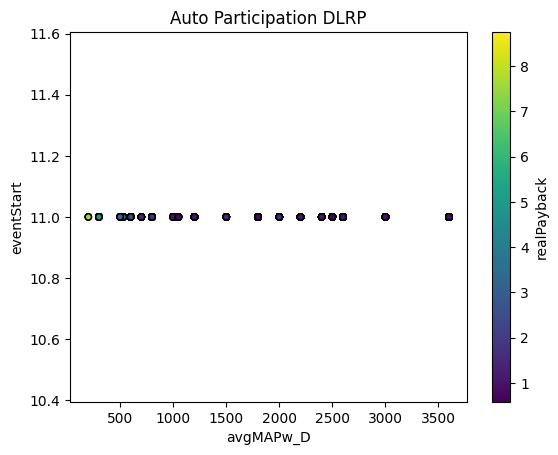

In [104]:
favPBP_df_Z.plot(kind = 'scatter', x = 'avgMAPw_D', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='Auto Participation DLRP')


KeyError: 'incomeAfterRoi'

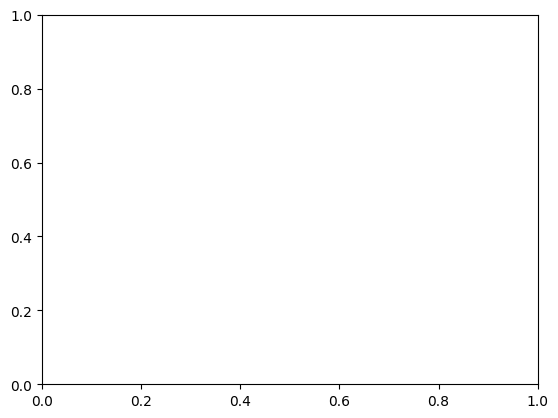

In [105]:
favPBP_df_Z.plot(kind = 'scatter', x = 'incomeAfterRoi', y = 'eventStart', c='realPayback',edgecolor='black',colormap='viridis', title='Income After ROI')


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'incomeAfterRoi'

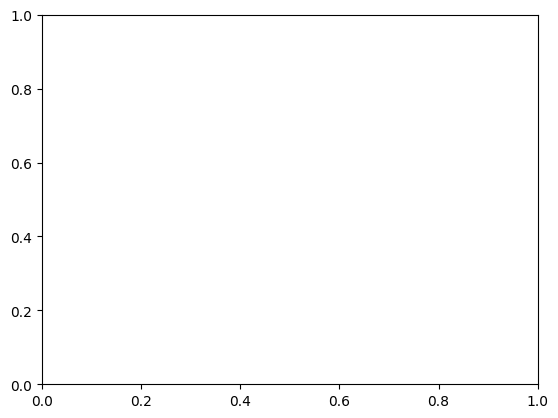

In [106]:
favPBP_df_Z.plot(kind = 'scatter', x = 'batWh', y = 'pvW', c='incomeAfterRoi',colormap='viridis', title='Available Hardware w/ Favorable ROIs')


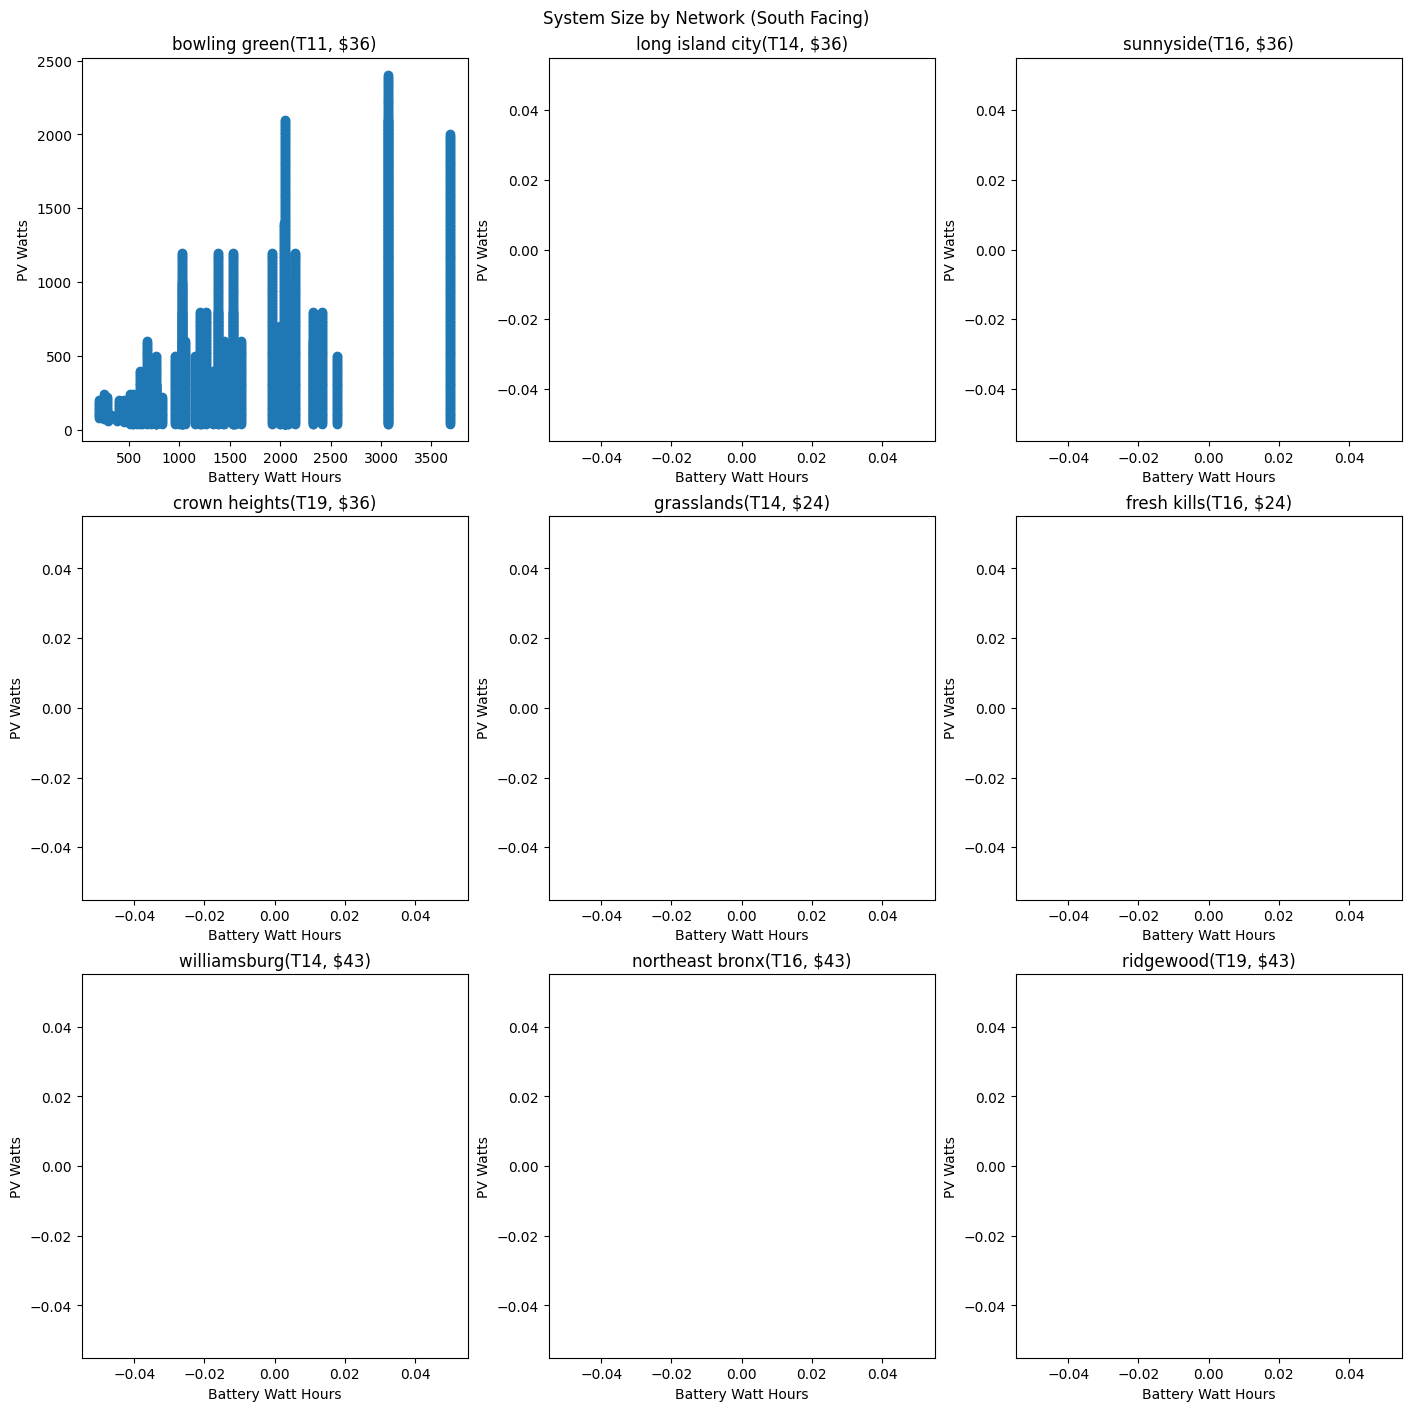

In [107]:
#hardware combos by network

fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = 180

hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]

myLabels=[]
for n in myNetworks:
    mN = hc_df[hc_df['network'] == n]
    myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):
        p = y+(3*x)
        n = myNetworks[p]     
        nhc_df = hc_df[hc_df['network'] == n]

        axs[x,y].scatter(x = nhc_df['batWh'], y = nhc_df['pvW'])
        axs[x,y].set_title(myLabels[p])
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('Battery Watt Hours') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('System Size by Network (South Facing)')
    
plt.show()

In [108]:
# #start time comparison

# fig, axs = plt.subplots(3, 4, figsize=(16, 12), layout="constrained",sharex=True,sharey=True)

# azi = [110,180,250]

# showNetworks = ['bowling green','long island city','sunnyside','crown heights']

# for x in range(3):
#     for y in range(4):
        
#         hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi[x]]

#         myLabels=[]
#         for n in showNetworks:
#             mN = hc_df[hc_df['network'] == n]
#             myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

#         n = showNetworks[y]     
#         nhc_df = hc_df[hc_df['network'] == n]

#         axs[x,y].scatter(x = nhc_df['batWh'], y = nhc_df['pvW'])
#         axs[x,y].set_title(myLabels[y])
#         axs[x,y].set_ylabel('PV Watts') 
#         axs[x,y].set_xlabel('Battery Watt Hours') 

# # fig.subplots_adjust(bottom=0.05, top=0.9,
# #                     hspace=0.4, wspace=0.3)
# fig.suptitle('System Size Time Comparison)')
    
# plt.show()

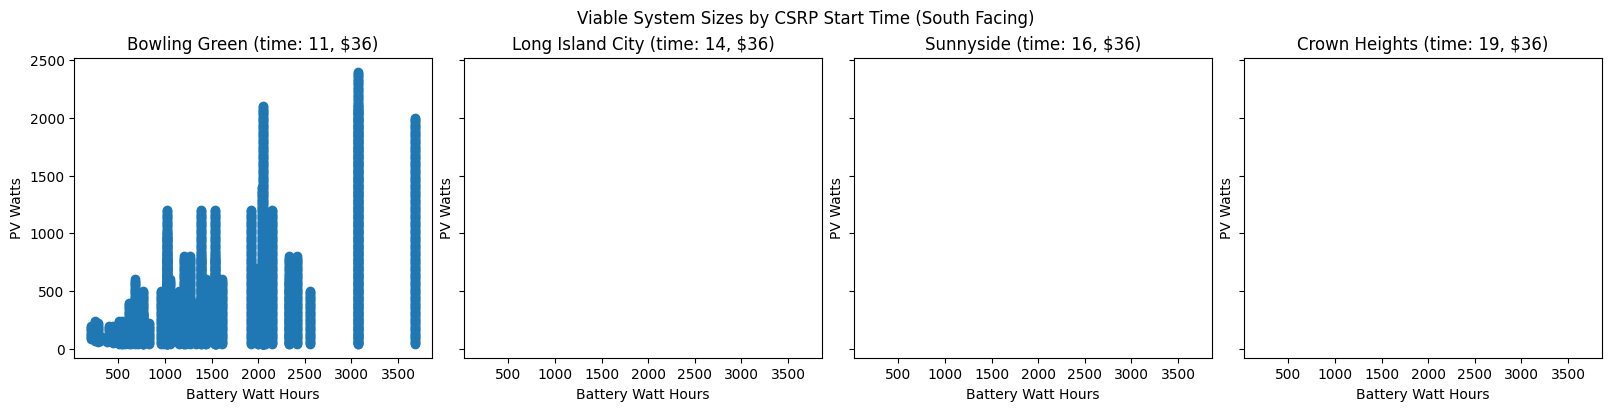

In [109]:
#start time comparison

fig, axs = plt.subplots(1,4, figsize=(16, 4), layout="constrained",sharex=True,sharey=True)

azi = 180
hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]

#showNetworks = ['bowling green','long island city','sunnyside','crown heights']
showNetworksUC = ['Bowling Green','Long Island City','Sunnyside','Crown Heights']

myLabels=[]
for n in showNetworksUC:
    mN = hc_df[hc_df['network'] == n.lower()]
    myLabels.append(n + " (time: "+ str(getStartTime(n.lower())) + ", $" + str(getTotalRate(n.lower())) +")")
        
for y in range(4):

    n = showNetworksUC[y]     
    nhc_df = hc_df[hc_df['network'] == n.lower()]

    axs[y].scatter(x = nhc_df['batWh'], y = nhc_df['pvW'])
    axs[y].set_title(myLabels[y])
    axs[y].set_ylabel('PV Watts') 
    axs[y].set_xlabel('Battery Watt Hours') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('Viable System Sizes by CSRP Start Time (South Facing)')
    
plt.show()

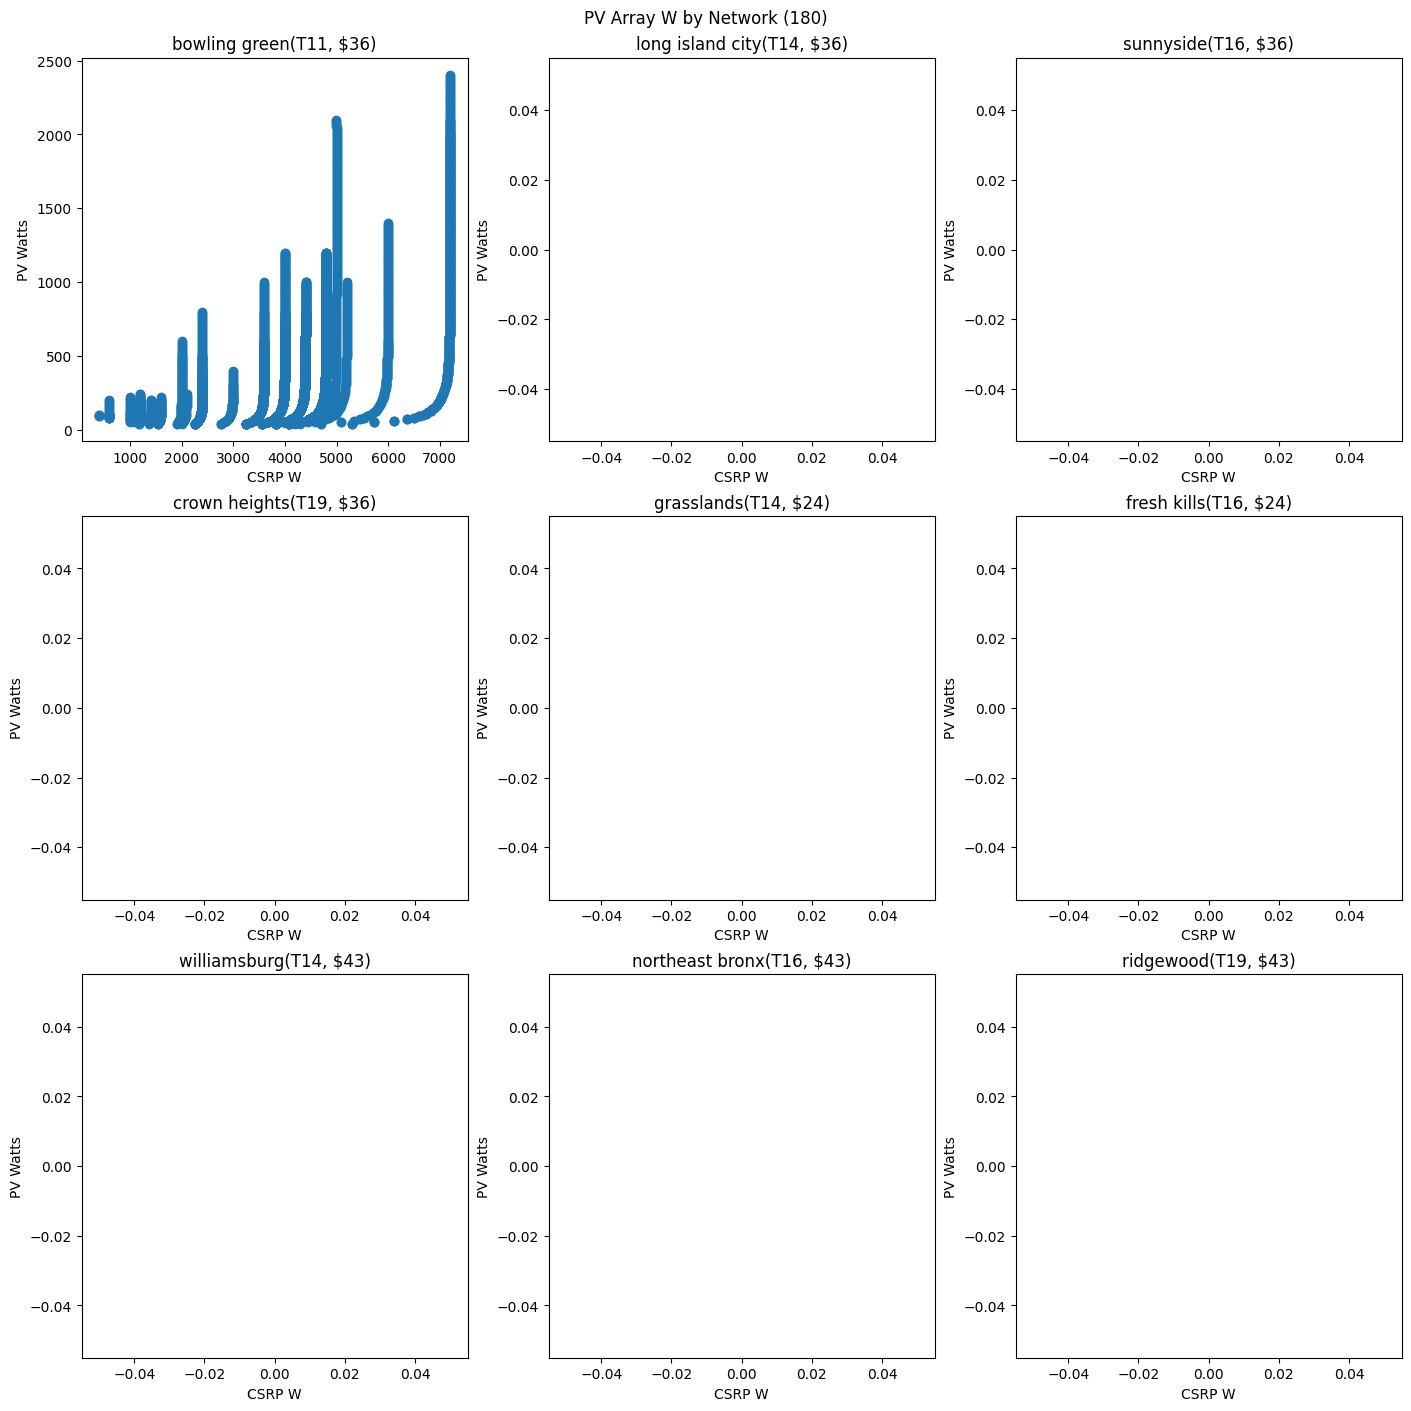

In [110]:
#CSRP vs PV

fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = 180

hc_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]

myLabels=[]
for n in myNetworks:
    mN = hc_df[hc_df['network'] == n]
    myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):
        p = y+(3*x)
        n = myNetworks[p]     
        nhc_df = hc_df[hc_df['network'] == n]

        axs[x,y].scatter(x = nhc_df['avgMAPw_C'], y = nhc_df['pvW'])
        axs[x,y].set_title(myLabels[p])
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('CSRP W') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('PV Array W by Network (180)')
    
plt.show()

## Unique Systems
Are there particular azimuths and network combos that have unique options or is it only more/less systems?

In [106]:
# favPBP_df_Z[favPBP_df_Z['avgMAPw_C']
            
            
# for n in myNetworks:    
#         nhc_df = hc_df[hc_df['network'] == n]

#         axs[x,y].scatter(x = nhc_df['avgMAPw_C'], y = nhc_df['pvW'])
#         axs[x,y].set_title(myLabels[p])
#         axs[x,y].set_ylabel('PV Watts') 
#         axs[x,y].set_xlabel('CSRP W') 

## Results for HOMER Validation

In [107]:
#data for validation


# 'E2000LFP Expandable': 7,
#  'P2001': 9,
#  'AC180': 9,
#  'ST2000': 4,
#  '2400 Portable Power Station': 7,
#  'Mega 2': 5,
#  'P1201': 9,
#  'DBS1300': 7,
#  'E1500LFP Expandable': 7,
#  'Explorer 700 Plus': 8,
#  '1800 Portable Power Station': 9,
#  'AC180P': 4,
#  'AC200P': 5,
#  'E600LFP': 9,
#  '1200 Portable Power Station': 2}

#print(favPBP_df_Z.keys())
model_df = favPBP_df_Z[favPBP_df_Z['batModel'] == 'AC180']
model_df = model_df[model_df['pvW']==470]
model_df[['network','az','pvW','avgAutoParticipationAnnualW_C','avgAutoParticipationAnnualW_D']]

,network,az,pvW,avgAutoParticipationAnnualW_C,avgAutoParticipationAnnualW_D
1731,bowling green,110,470,"[377.15000206012104, 375.23323649219316, 373.3...","[196.10772894427728, 196.10772894427728, 196.1..."
1872,bowling green,180,470,"[404.0987050655982, 401.9136247246685, 399.750...","[196.10772894427728, 196.10772894427728, 196.1..."
2013,bowling green,250,470,"[403.14437293140816, 400.9687624946718, 398.81...","[196.10772894427728, 196.10772894427728, 196.1..."
7785,long island city,180,470,"[305.08355462852916, 303.8899248633385, 302.70...","[196.10772894427728, 196.10772894427728, 196.1..."
7926,long island city,250,470,"[337.26455006644113, 335.74970882836067, 334.2...","[196.10772894427728, 196.10772894427728, 196.1..."
13698,sunnyside,180,470,"[227.06159565077445, 226.6886030084488, 226.31...","[196.10772894427728, 196.10772894427728, 196.1..."
19611,crown heights,180,470,"[196.10772894427728, 196.10772894427728, 196.1...","[196.10772894427728, 196.10772894427728, 196.1..."
37209,williamsburg,110,470,"[268.5255596321657, 267.6977139106444, 266.878...","[196.10772894427728, 196.10772894427728, 196.1..."
37350,williamsburg,180,470,"[305.08355462852916, 303.8899248633385, 302.70...","[196.10772894427728, 196.10772894427728, 196.1..."
37491,williamsburg,250,470,"[337.26455006644113, 335.74970882836067, 334.2...","[196.10772894427728, 196.10772894427728, 196.1..."


In [108]:
model_df = favPBP_df_Z[favPBP_df_Z['batModel'] == '1200 Portable Power Station']
model_df = model_df[model_df['pvW']==230]
model_df[['network','az','avgAutoParticipationAnnualW_C','avgAutoParticipationAnnualW_D']]

,network,az,avgAutoParticipationAnnualW_C,avgAutoParticipationAnnualW_D


## Impact of Immediate Events

In [109]:
snapShot(favPBP_df_Z)

Amount of systems: 1403

Min Lifespan: 9.58904109589041
Mean Lifespan: 9.654458645368534
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 9.58904109589041
Mean working life: 9.601636415118287
Median working life: 9.58904109589041
Max working life: 10.0

Fastest ROI: 7.333333333333333yrs
Mean ROI: 9.050546448087433
Median ROI: 9.166666666666666
Slowest ROI: 10.0yrs

Greatest IAR: $450.0228813068793 ($46.93095762200313/per year for 9.58904109589041 years)
Mean IAR: 99.5415948947731
Median IAR: 83.47530312683938
Lowest IAR: $0.0 ($0.0/per year for 10 years)

Greatest IAR Split: $46.93095762200313
Mean IAR Split: 10.37586270078544
Median IAR Split: 8.705281611798965
Lowest IAR Split: $0.0

Combinations with Minimum PV Arrays: 
{'[280, 614.0]', '[280, 1488.0]', '[280, 960.0]'}
Combinations with Maximum PV Arrays: 
{'[500, 2232.0]', '[500, 960.0]', '[500, 2000.0]', '[500, 1536.0]', '[500, 2073.0]', '[500, 680.96]', '[500, 2048.0]', '[500, 1152.0]', '[500, 

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [110]:
snapShot(favPBP_df_O)

Amount of systems: 1381

Min Lifespan: 9.58904109589041
Mean Lifespan: 9.655500778669415
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 9.58904109589041
Mean working life: 9.601837064664277
Median working life: 9.58904109589041
Max working life: 10.0

Fastest ROI: 7.333333333333333yrs
Mean ROI: 9.048032826454259
Median ROI: 9.166666666666666
Slowest ROI: 10.0yrs

Greatest IAR: $450.0228813068793 ($46.93095762200313/per year for 9.58904109589041 years)
Mean IAR: 99.80049694000199
Median IAR: 83.48573111493914
Lowest IAR: $0.0 ($0.0/per year for 10 years)

Greatest IAR Split: $46.93095762200313
Mean IAR Split: 10.402784368393537
Median IAR Split: 8.70636910198651
Lowest IAR Split: $0.0

Combinations with Minimum PV Arrays: 
{'[280, 614.0]', '[280, 960.0]'}
Combinations with Maximum PV Arrays: 
{'[500, 2232.0]', '[500, 960.0]', '[500, 2000.0]', '[500, 1536.0]', '[500, 2073.0]', '[500, 680.96]', '[500, 2048.0]', '[500, 1152.0]', '[500, 1920.0]', '[500,

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
snapShot(favPBP_df_F)

Amount of systems: 1305

Min Lifespan: 9.58904109589041
Mean Lifespan: 9.659371227628194
Median Lifespan: 9.58904109589041
Max Lifespan: 12.32876712328767

Min working life: 9.58904109589041
Mean working life: 9.60258227050858
Median working life: 9.58904109589041
Max working life: 10.0

Fastest ROI: 7.333333333333333yrs
Mean ROI: 9.037739463601532
Median ROI: 9.166666666666666
Slowest ROI: 10.0yrs

Greatest IAR: $450.0228813068793 ($46.93095762200313/per year for 9.58904109589041 years)
Mean IAR: 100.99817760727628
Median IAR: 84.52854768970295
Lowest IAR: $0.0 ($0.0/per year for 10 years)

Greatest IAR Split: $46.93095762200313
Mean IAR Split: 10.527395227882634
Median IAR Split: 8.815119973354737
Lowest IAR Split: $0.0

Combinations with Minimum PV Arrays: 
{'[280, 614.0]', '[280, 960.0]'}
Combinations with Maximum PV Arrays: 
{'[500, 2232.0]', '[500, 960.0]', '[500, 2000.0]', '[500, 1536.0]', '[500, 2073.0]', '[500, 680.96]', '[500, 2048.0]', '[500, 1152.0]', '[500, 1920.0]', '[500

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
# #bar roi by frequency

# fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

# subTitles =['Zero','Low','High']

# plot_df = [favPBP_df_Z[favPBP_df_Z['az']==180],favPBP_df_O[favPBP_df_O['az']==180],favPBP_df_F[favPBP_df_F['az']==180]]
# for f in range(3):

#     axs[f].hist(plot_df[f]['realPayback'])
#     axs[f].set_title(subTitles[f])
#     #axs[f].set_ylabel('DLRP W') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
# fig.suptitle('ROI by Frequency Group (180)')
    
# plt.show()

In [113]:
# #box plot for IAP

# fig, axs = plt.subplots(3,1, figsize=(14, 14), sharey=True)

# azi = [110,180,250]
# subTitles =['East','South','West']

# #get labels using south facing facade because there are no non-data networks
# # myLabels=[]
# # for n in myNetworks:
# #     mN = favPBP_df_Z[favPBP_df_Z['network'] == n]
# #     myLabels.append(n + "\n(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

# for a in range(3):
#     boxPlotData = []

#     boxPlotData.append(list(favPBP_df_Z[favPBP_df_Z['az'] == azi[a]]['avgMAPw_D']))
#     boxPlotData.append(list(favPBP_df_O[favPBP_df_O['az'] == azi[a]]['avgMAPw_D']))
#     boxPlotData.append(list(favPBP_df_F[favPBP_df_F['az'] == azi[a]]['avgMAPw_D']))

# #     for n in myNetworks:
# #         bP = bPD[bPD['network'] == n]
# #         boxPlotData.append(list(bP['incomeAfterRoi']))

#     axs[a].boxplot(boxPlotData, labels=['Zero','Low','High'])
#     axs[a].set_title(subTitles[a] + ' ('+str(azi[a])+'\N{DEGREE SIGN})')
#     axs[a].set_ylabel('DLRP W') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
# fig.suptitle('DLRP Max Auto Performance by Frequency Group and Azimuth')
    
# plt.show()

# What systems are unique to different frequency groups?

In [114]:
favPBP_df_F.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'realRoi',
       'Cycles', 'lifespan', 'workingLife', 'profitableYears',
       'incomeAfterRoi', 'iarSplit', 'totalDR_AnnualAvgInc'],
      dtype='object')

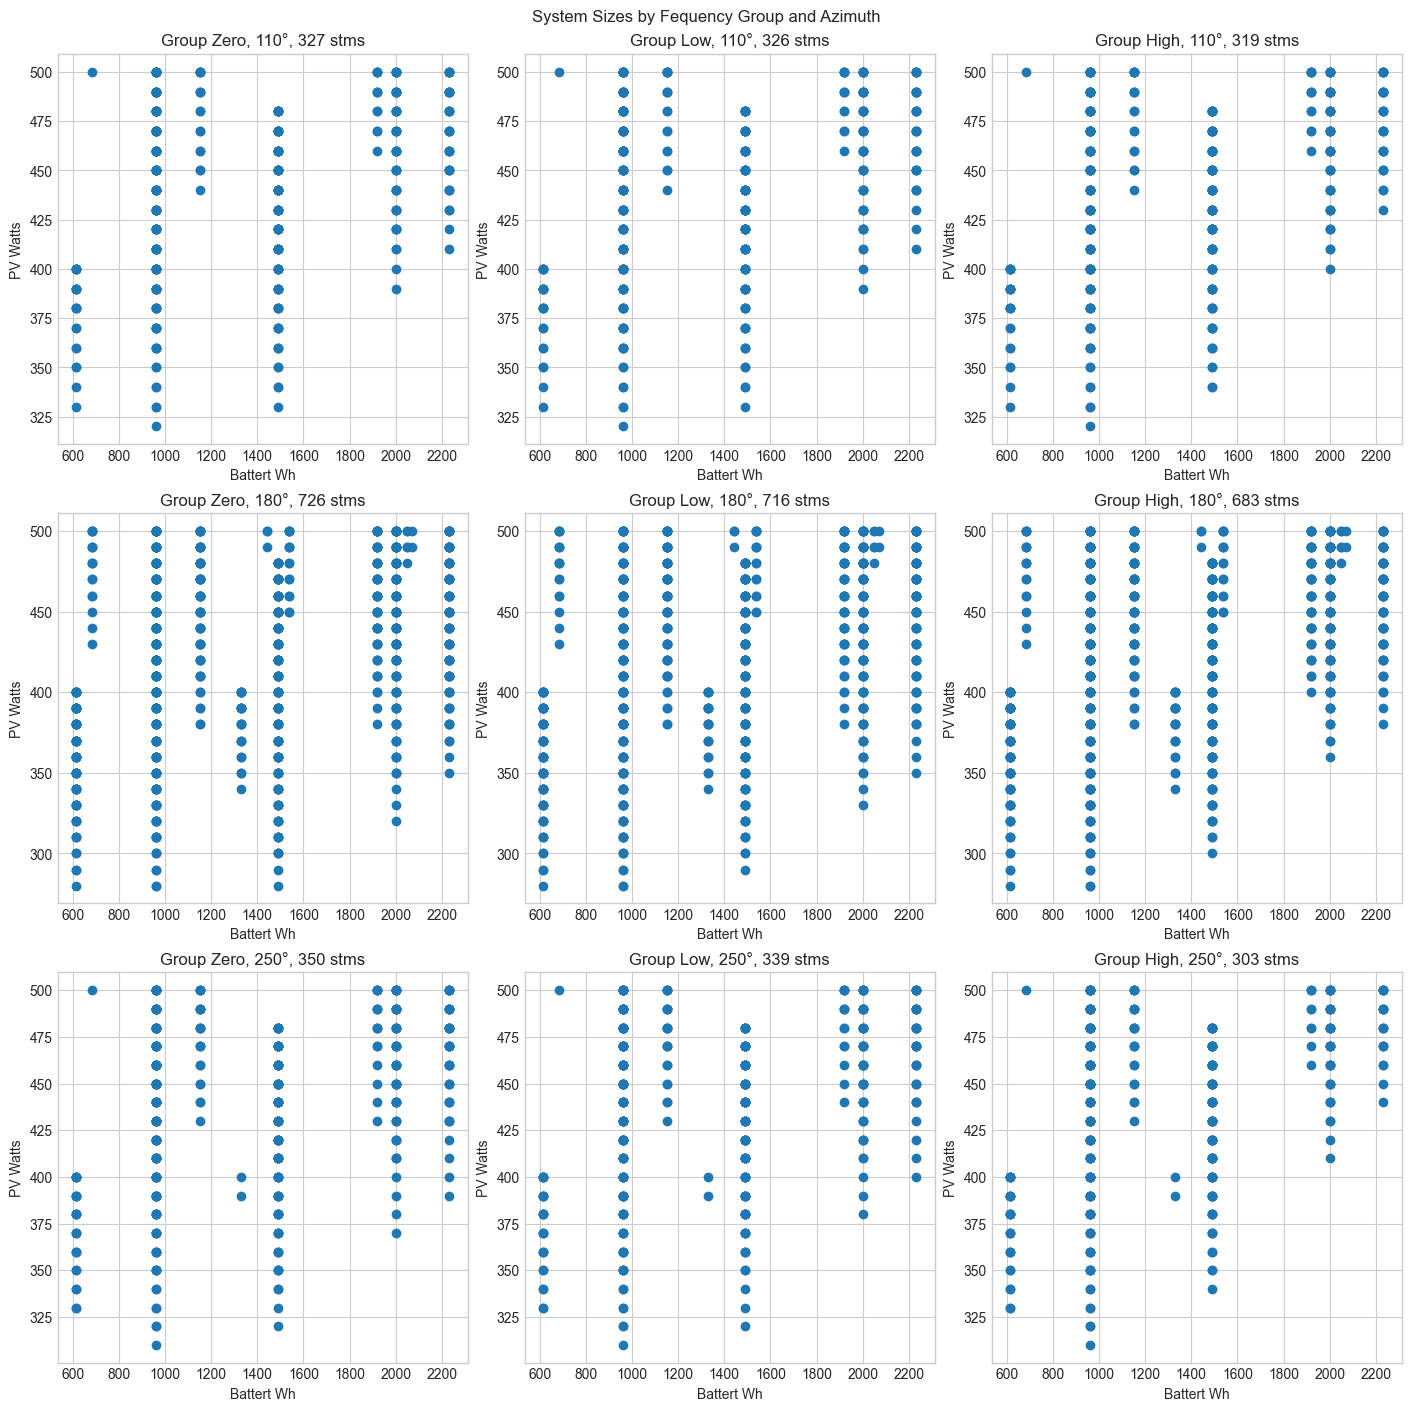

In [115]:
#compare systems accross azimuth and frequencies
fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = [110,180,250]

# z_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]
# o_df = favPBP_df_O[favPBP_df_O['az'] == azi]
# f_df = favPBP_df_F[favPBP_df_F['az'] == azi]

fGroups =['Zero','Low','High']
data_df = [favPBP_df_Z,favPBP_df_O,favPBP_df_F]

# for n in myNetworks:
#     mN = hc_df[hc_df['network'] == n]
#     myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):        
        #p = y+(3*x)
        #n = myNetworks[p]  
        
        plot_df = data_df[y][data_df[y]['az']==azi[x]]

        stmAmt = plot_df.shape[0]
        
        axs[x,y].scatter(x = plot_df['batWh'], y = plot_df['pvW'])
        axs[x,y].set_title('Group ' + fGroups[y] + ', ' + str(azi[x]) + '\N{DEGREE SIGN}, ' + str(stmAmt) + ' stms')
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('Battert Wh') 

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('System Sizes by Fequency Group and Azimuth')
    
plt.show()

Group Zero: \$18C, \$18D, 343 stms
280, 423.81924198250726, 430, 500

Group Low: \$18C, \$18D, 342 stms
280, 423.859649122807, 430.0, 500

Group High: \$18C, \$18D, 330 stms
280, 424.8787878787879, 430.0, 500

Group Zero: \$6C, \$18D, 41 stms
370, 439.7560975609756, 440, 500

Group Low: \$6C, \$18D, 41 stms
370, 439.7560975609756, 440, 500

Group High: \$6C, \$18D, 41 stms
370, 439.7560975609756, 440, 500

Group Zero: \$18C, \$25D, 342 stms
280, 415.17543859649123, 420.0, 500

Group Low: \$18C, \$25D, 333 stms
280, 417.14714714714717, 420, 500

Group High: \$18C, \$25D, 312 stms
280, 420.38461538461536, 430.0, 500



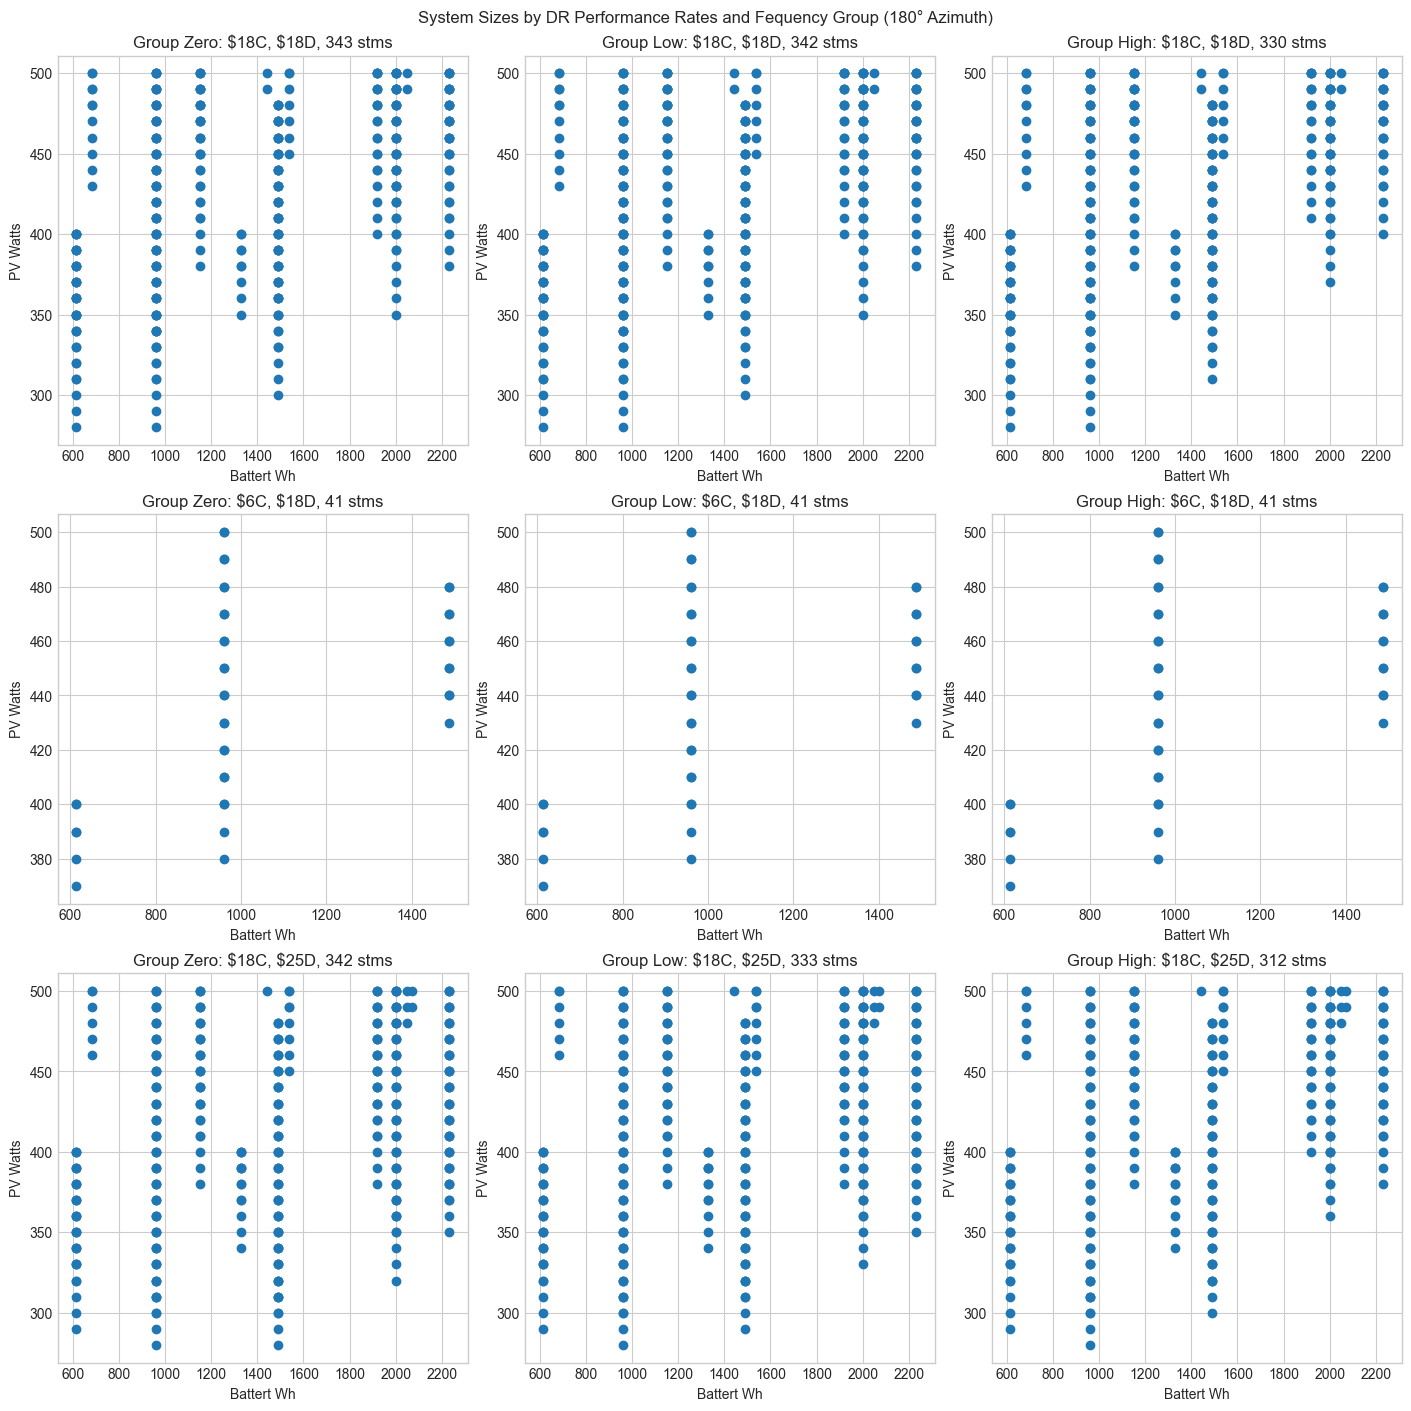

In [116]:
#compare systems accress DR income groups and frequencies

fig, axs = plt.subplots(3,3, figsize=(14, 14), layout="constrained")

azi = 180

drRates = [36,24,43]
drRateLabels=['\$18C, \$18D','\$6C, \$18D','\$18C, \$25D']

z_df = favPBP_df_Z[favPBP_df_Z['az'] == azi]
o_df = favPBP_df_O[favPBP_df_O['az'] == azi]
f_df = favPBP_df_F[favPBP_df_F['az'] == azi]

fGroups =['Zero','Low','High']

data_df = [z_df,o_df,f_df]

# for n in myNetworks:
#     mN = hc_df[hc_df['network'] == n]
#     myLabels.append(n + "(T"+ str(getStartTime(n)) + ", $" + str(getTotalRate(n)) +")")

for x in range(3):
    for y in range(3):
        r = drRates[x]
        
        p = y+(3*x)
        #n = myNetworks[p]  
        
        plot_df = data_df[y][data_df[y]['totalDRratekW']==r]

        stmAmt = plot_df.shape[0]
        
        axs[x,y].scatter(x = plot_df['batWh'], y = plot_df['pvW'])
        axs[x,y].set_title('Group ' + fGroups[y] + ': ' + drRateLabels[x] + ', ' + str(stmAmt) + ' stms')
        axs[x,y].set_ylabel('PV Watts') 
        axs[x,y].set_xlabel('Battert Wh') 
        
        print('Group ' + fGroups[y] + ': ' + drRateLabels[x] + ', ' + str(stmAmt) + ' stms')
        print(str(min(plot_df['pvW'])) + ', ' + str(mean(plot_df['pvW'])) + ', ' + str(median(plot_df['pvW'])) + ', '+ str(max(plot_df['pvW'])))
        print('')

# fig.subplots_adjust(bottom=0.05, top=0.9,
#                     hspace=0.4, wspace=0.3)
fig.suptitle('System Sizes by DR Performance Rates and Fequency Group (180\N{DEGREE SIGN} Azimuth)')
    
plt.show()

## Loads


### Typical Appliances

#### Fixed
* Refrigerator

#### Behavior Dependent
Note that baselines are determined by X, so random loads that aren't used at generally the same time each day wouldn't be considered.
* AC
* Fan
* Lamp
* Overhead lights
* Computer
* Electric Stove
* Convection stove

### 4 hour rates

In [71]:
favPBP_df.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'realRoi',
       'Cycles', 'lifespan', 'workingLife', 'profitableYears',
       'incomeAfterRoi', 'iarSplit'],
      dtype='object')

In [72]:
#Discharge rate is the amount of power required to offload per hour during an event
# print('Min discharge rate: ' + str(min(favPBP_df['dischargeRateW'])))
# print('Mean discharge rate: ' + str(favPBP_df['dischargeRateW'].mean()))
# print('Median discharge rate: ' + str(favPBP_df['dischargeRateW'].median()))
# print('Max discharge rate: ' + str(max(favPBP_df['dischargeRateW'])))

In [73]:
#Max stored available energy AC
favPBP_df['availWhAC'] = favPBP_df['batWhAC']*.8

print('Available Stored Energy:')
minStoredWh = min(favPBP_df['availWhAC'])
maxStoredWh = max(favPBP_df['availWhAC'])

print('Min: ' + str(minStoredWh))
print('Mean: ' + str(favPBP_df['availWhAC'].mean()))
print('Median: ' + str(favPBP_df['availWhAC'].median()))
print('Max: ' + str(maxStoredWh))

Available Stored Energy:
Min: 397.09751586842384
Mean: 966.7926175700919
Median: 1012.4728291503769
Max: 1635.087562992832


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# Typical refrigerator
# source: https://www.energysage.com/electricity/house-watts/how-many-watts-does-a-refrigerator-use/#:~:text=A%20home%20refrigerator's%20power%20consumption,amps%20and%20about%20120%20volts.
fridgeDutyCycle = .333

fridgeMaxW = 800 * fridgeDutyCycle
fridgeMinW = 300 * fridgeDutyCycle

print('Fridge Watts')
print('Max: ' + str(fridgeMaxW) + 'W (' + str(fridgeMaxW * 24) + ' Wh/day)')
print('Min: ' + str(fridgeMinW) + 'W (' + str(fridgeMinW * 24) + ' Wh/day)')


Fridge Watts
Max: 266.40000000000003W (6393.6 Wh/day)
Min: 99.9W (2397.6000000000004 Wh/day)


In [75]:
# Min and Max Static Load Consumption Times
favPBP_df['staticRTmin'] = favPBP_df['availWhAC']/fridgeMaxW
favPBP_df['staticRTmax'] = favPBP_df['availWhAC']/fridgeMinW

print("min static consumption time: " + str(min(favPBP_df['staticRTmin'])))
print("max static consumption time: " + str(max(favPBP_df['staticRTmax'])))

print("Mean Min/Max")
print("mean min static consumption time: " + str(favPBP_df['staticRTmin'].median()))
print("mean max static consumption time: " + str(favPBP_df['staticRTmax'].median()))

min static consumption time: 1.4906062907973865
max static consumption time: 16.36724287280112
Mean Min/Max
mean min static consumption time: 3.8005736829969097
mean max static consumption time: 10.134863154658428


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
#dynamic load requirements

#DR inc
avgAnnDR_C_Min = []
avgAnnDR_C_Max = []

favPBP_df['dynamicLoadMin'] = favPBP_df['avgMAPw_C']-fridgeMaxW
favPBP_df['dynamicLoadMax'] = favPBP_df['avgMAPw_C']-fridgeMinW

print('Dynamic Load Requirements During CRSP Events')
print('Min: ' + str(max(0,min(favPBP_df['dynamicLoadMin']))))
print('Max: ' + str(max(favPBP_df['dynamicLoadMin'])))
print('Median Range: ' + str(favPBP_df['avgMAPw_C'].median()-fridgeMaxW) + ' - ' + str(favPBP_df['avgMAPw_C'].median()-fridgeMinW))

Dynamic Load Requirements During CRSP Events
Min: 0
Max: 353.27249090043875
Median Range: 29.18855023127435 - 195.68855023127438


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Final Analysis

Compare to Nest thermostat

## Get Favorable Battery Makes and Models

In [77]:
hardware_df = pd.read_csv('data/PowerStations_LiFePo4_Feb1.csv')

#clean data - these columns aren't used in this analysis
hardware_df = hardware_df.drop(columns=['Link','Battery Type','App Control','Bypass Mode','Min PV Voltage','Max PV Voltage','Max AC Input Amps'
                                        , 'Warranty Years','Lifespan','Notes','Real Minimum Grid Charge Efficiency','Estimated Minimum Grid Charge Efficiency'])


In [78]:
favBatWh

[680.96,
 614.0,
 1536.0,
 1920.0,
 1152.0,
 1440.0,
 2000.0,
 992.0,
 1488.0,
 2232.0,
 2048.0,
 2073.0,
 1330.0,
 960.0]

In [79]:
#filter by favorable battery type
favBat_df = hardware_df[hardware_df['Battery Wh'].isin(favBatWh)]

#filter by battery size
favBat_df = favBat_df[favBat_df['Battery Wh'] <= 2000]

#filter by dod
favBat_df = favBat_df[favBat_df['DoD'] >= 80]

display(favBat_df.shape)

favBat_df

(13, 20)

,Make,Model,Battery Wh,Max PV Watts,W to Wh Ratio,Max PV Amps,Inverter Watts,Max AC Input Watts,Full Grid Charge Hours,80 Per Grid Charge Hours,AC Charger Watts,Inverter Efficiency,Retail Price (11/12/2023),Full Price (11/20/2023),Retail Price (12/30/2023),Retail Price (1/11/2024),Retail Price (1/26/2024),Unregulated Output,Cycles,DoD
4,Pecron,E600LFP,614.0,400,0.651466,7.0,1200,NaN,2.2,NaN,NaN,85.0,299.0,499.0,299.0,NaN,329.0,False,3500,80
5,Pecron,E1500LFP Expandable,1536.0,800,0.520833,7.0,2200,1400.0,1.8,NaN,NaN,85.0,899.0,1299.0,899.0,NaN,799.0,False,3500,80
6,Pecron,E2000LFP Expandable,1920.0,1200,0.625000,7.0,2000,NaN,2.0,NaN,NaN,85.0,899.0,1499.0,899.0,NaN,899.0,False,3500,80
17,Bluetti,AC180,1152.0,500,0.434028,10.0,1800,1440.0,NaN,0.750000,NaN,90.0,669.0,999.0,799.0,NaN,649.0,False,3500,80
18,Bluetti,AC180P,1440.0,500,0.347222,10.0,1800,1440.0,NaN,0.750000,NaN,90.0,1099.0,1299.0,999.0,NaN,999.0,False,3500,80
19,Bluetti,AC200P,2000.0,700,0.350000,12.0,2000,500.0,4.5,NaN,NaN,90.0,1199.0,1199.0,1199.0,NaN,1199.0,False,3500,80
33,Anker,SOLIX F1500,1536.0,600,0.390625,NaN,1800,NaN,2.0,NaN,1000.0,85.0,NaN,NaN,NaN,799.0,1399.0,False,3000,80
36,Oupes,1200 Portable Power Station,992.0,240,0.241935,NaN,1200,NaN,6.5,NaN,200.0,93.0,499.0,549.0,499.0,NaN,549.0,False,3500,80
37,Oupes,1800 Portable Power Station,1488.0,480,0.322581,NaN,1800,NaN,8.0,NaN,200.0,93.0,719.0,799.0,699.0,NaN,699.0,False,3500,80
48,Dabbsson,DBS1300,1330.0,400,0.300752,NaN,1200,NaN,NaN,0.733333,NaN,80.0,699.0,899.0,599.0,NaN,599.0,False,4500,80


# Validation Comparison

Comparison to HOMER outputs

In [80]:
#get lists of batteries by network
favPBP_df_Z['batModel']

186       Explorer 700 Plus
189       Explorer 700 Plus
192       Explorer 700 Plus
195       Explorer 700 Plus
198       Explorer 700 Plus
                ...        
157818                P2001
157821                P2001
157824                P2001
157827                P2001
157830                P2001
Name: batModel, Length: 2538, dtype: object

In [81]:
results_df.keys()

Index(['network', 'eventStart', 'az', 'pvW', 'batModel', 'batWh', 'batWhAC',
       'effEff', 'dischargeRateW', 'capex', 'dollarPerBatkWh', 'dailyPVWAC_4M',
       'annualPVkWhDC_degraded', 'annualPVkWhAC_degraded', 'avoidedGridCosts',
       'immediateEventAmt', 'avgAutoParticipationMonthlyW_C',
       'avgAutoParticipationMonthlyW_D', 'avgAutoParticipationAnnualW_C',
       'avgAutoParticipationAnnualW_D', 'avgMAPw_C', 'avgMAPw_D',
       'totalDRratekW', 'drIncMonthly_C', 'drIncMonthly_D', 'drIncAnnual_C',
       'drIncAnnual_D', 'drPerformanceIncome', 'annualBenefit', 'realRoi',
       'Cycles', 'lifespan', 'workingLife', 'profitableYears',
       'incomeAfterRoi', 'iarSplit'],
      dtype='object')